
<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

### Rapid, Robust CCS Block Static Property Modeling, Version 3.0

#### Workflow v0.1 Well Data, Relative AI, Seismic Trace Envelope to Vsh Realizations with 3D Implementation

#### Michael Pyrcz, Professor, The University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Well-based Prior Model

| Step | Input | Output |
|:--------:|:--------:|:--------:|
| make synthetic data | distributions, variograms, correlations, trends | exhaustive truth maps, well data |
| Vsh soft data debiasing | well Vsh, coordinates | representative Vsh distribution, diagnostic plots |
| calculate Vsh trend model | Vsh well data | 2D Vsh areal trend map, 1D Vsh vertical trend, 3D Vsh trend, diagnostics |
| model Vsh residual | Vsh well data, 3D Vsh trend | well Vsh residual, Vsh residual variogram |
| Vsh spatial bootstrap | Vsh residual variogram | number of effective data, block Vsh mean uncertainty |
| Vsh residual kriging | well Vsh residual, Vsh residual variogram | 3D model of residual mean and variance |
| Vsh residual add to Vsh trend | 3D model of residual mean and variance, 3D Vsh trend | Vsh well-based prior model | 
| Vsh prior transformed to Gaussian space | Vsh well-based prior model | Gaussian Vsh prior |

#### Seismic-based Likelihood Model

| Step | Input | Output |
|:--------:|:--------:|:--------:|
| seismic features transformed to Gaussian space | seismic features | Gaussian seismic features |
| seismic features PCA | Gaussian seismic features | dimensionality reduced seismic feature |
| seismic feature Vsh kriging | Gaussian seismic features, Gaussian Vsh well data | Gaussian Vsh likelihood |

#### Combined Well- and Seismic-based Posterior Model and Vsh Realizations

| Step | Input | Output |
|:--------:|:--------:|:--------:|
| update prior with likelihood | Gaussian Vsh prior, Gaussian Vsh likelihood | Gaussian Vsh posterior |
| back transform posterior | Gaussian Vsh posterior | Vsh posterior |
| calculate p-fields with global uncertainty | Vsh residual variogram, Vsh posterior, block Vsh mean uncertainty | Vsh realizations |

#### Gaussian Assumption

This method is based on the multivariate Gaussian assumption. Therefore all variables are first transformed to standard normal and are then assumed to be multiGaussian. This assumption may be practically 'checked' for reasonableness with matrix scatter plots. Of course, this is not a completely rigorous manner to check for multiGaussian, nor is the univariate transform sufficient to ensure multiGaussian multivariate distributions. 

#### Local Prior Distribution by Simple Kriging with Well Data

The distribution of uncertainty for the primary variable is predicted from spatial estimation based on surrounding data using simple kriging. These estimates are called prior distributions and are denoted as *prior*.  Similar to the likelihood distribution, the parameters of the prior distribution are obtained from the normal equation, but with correlations representing the closeness and redundancy of primary data at other spatial locations.

The correlation coefficients between all primary data at different locations come directly from a variogram or correlogram\index{correlogram} model. The prior distributions are summarized by a set of mean and variance values for all locations and primary variables (under the assumption of Gaussianity):

\begin{equation}
\overline{y}_{prior,p}(\bf{u}),\sigma^2_{prior,p}(\bf{u}) \quad  p=1,\ldots,N_p, \quad \forall \bf{u} \in AOI
\end{equation}

These distributions summarize the spatial information of surrounding data of the same variable type. 

#### Local  Likelihood Distribution from Merged Secondary Data

All secondary variables are merged into a single likelihood distribution for with respect to the primary variable at each location.  Of course, the number of secondary variables available at each location could vary; the notation $N_{S}({\bf u})$ denotes the number of secondary data available at location $\bf{u}$.

The mean and variance of the likelihood distribution are calculated directly from the normal equations. 

* **redundancy**, **closeness** and **spatial correlation** are captured with the normal equations (kriging).   

* the correlations of the secondary data with themselves are on the left hand side and the correlation of each secondary variable with the primary variable is on the right hand side.

* the correlation coefficients between all pairs of secondary data and all secondary and primary data are required.  

* these should be calculated from the Gaussian transformed primary and secondary data.  

* the likelihood distributions (denoted as *like*) are summarized by a set of mean and variance values for all locations:

\begin{equation}
\overline{y}_{like}(\bf{u}), \, \sigma^2_{like}(\bf{u}); \forall \bf{u} \in AOI 
\end{equation}

* these distributions are a 'collapsed' version of all available secondary variables at location $\bf{u}$.  The final likelihood distributions account for the correlations and redundancy between the secondary variables and correlation between the secondary data and the primary variable of interest.

* the resulting weights can become unstable and non-intuitive, recognized as large positive or negative weights. 

* sequential removal of the most redundant secondary variable or the secondary variable least correlated with the primary variable may improve stability of the system  

* metric to measure the importance of each secondary variable for sensitivity analysis and also to ensure that important variables are not removed   

* sequentially remove variables and calculate the importance metric based on the change in the kriging variance.

\begin{equation}
Importance = \frac{\sigma^{2}_{k,i} - \sigma^{2}_{k}}{\sigma^{2}_{k}}
\end{equation}

where $i$ is the variable removed, $\sigma^{2}_{k,i}$is the kriging variance for that configuration, and $\sigma^{2}_{k}$ is the kriging variance when all variables are considered.  

* this relation was developed with the premise that the more a variable contributes to reducing the kriging variance, the more important it is.  

* to gain insight into the mutual interactions of all secondary variables the full combinatorial is explored.

#### Bayesian Updating for Local Posterior 

Since the prior and likelihood distributions are Gaussian, the resulting updated distribution will also be Gaussian. The updated distribution is defined by the updated mean and variance, $\overline{y}_{updated}(\bf{u})$ and $\sigma^{2}_{updated}(\bf{u})$ respectively.  

\begin{equation}
\hspace{-0.1cm}\overline{x}_{updated} =
\frac{\overline{x}_{likelihood}(\bf{u}) \cdot \sigma^2_{prior} (\bf{u}) + \overline{x}_{prior}(\bf{u})
\cdot \sigma^2_{likelihood} (\bf{u})}{[1 - \sigma^2_{likelihood}(\bf{u})][\sigma^2_{prior}(\bf{u}) - 1] + 1}
\end{equation}

and the variance for the updated distribution is:

\begin{equation}
\sigma^2_{updated}(\bf{u}) =
\frac{{\sigma^2}_{prior}(\bf{u})~{\sigma^2}_{likelihood}(\bf{u})}{[1 - {\sigma^2}_{likelihood}(\bf{u})][{\sigma^2}_{prior}(\bf{u}) -1] + 1}
\end{equation}

where $\overline{x}$ and $\sigma^2$ are the mean and variance for each distribution.

The updated distributions defined above must be back-transformed to return the primary variables to their original distributions.   

* Markov screening assumption is made whereby collocated secondary data screen the influence of nearby secondary data. 

* percentiles, or arbitrary number of quantiles, could be back-transformed from the local updated distributions for each primary variable.  

* any summary statistics of the local distributions could then be calculated including the expected value, the local variance, P10, P50 and P90 values and so on. These summaries could be used to characterize local uncertainty and to assist with well placement and data collection decisions. 

Local uncertainty in each of the $N_{k}$ variables at each location $\forall {\bf{u}} \in AOI$ does not permit multivariate calculations or uncertainty over larger volumes.  The local uncertainty models are for each location and each primary variable separately.  

* A simulation approach is required to provide a joint uncertainty model accounting for multivariate and spatial relationships.  

For this exercise we will keep it simple with a single secondary variable, it is straightforward to expand to multiple secondary variables.


#### Load the Required Libraries

The following code loads the required libraries including my GeostatsPy package.

In [1]:
import geostatspy.geostats as geostats
import geostatspy.GSLIB as GSLIB
import geostatspy
geostatspy.__version__

'0.0.52'

We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
ignore_warnings = True
import os                                                 # to set current working directory 
import numpy as np                                        # arrays and matrix math
import pandas as pd                                       # DataFrames
import matplotlib.pyplot as plt                           # plotting
import math
from tqdm import tqdm                                     # status bar
import scipy.spatial as sp                                # for fast nearest neighbor search
import numpy.linalg as linalg                             # for linear algebra
from numba import jit                                     # for numerical speed up
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, AutoLocator) # control of axes ticks
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap # custom color maps
import pyvista as pv                                      # 3D model plots
import seaborn as sns
cmap = plt.cm.inferno                                     # set color map
import scipy.stats as st                                  # statistical methods
from scipy.interpolate import make_interp_spline          # smooth curves
from scipy.stats import norm
import scipy.signal as signal                             # kernel for convolution
from scipy import stats
from sklearn.linear_model import LinearRegression         # soft data debiasing primary to secondary trend modeling
from sklearn.decomposition import PCA                     # PCA program from scikit learn (package for machine learning)
plt.rc('axes', axisbelow=True)                            # plot all grids below the plot elements
if ignore_warnings == True:
    import warnings
    warnings.filterwarnings('ignore')
seed = 73073                                              # for workflow repeatability
cmap = plt.cm.inferno
xmin=-9999; xmax=-9999; ymin=-9999; ymax=-9999

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

In [5]:
def regular_sample(array,array2,xmin,xmax,ymin,ymax,spacing,minsx=xmin,maxsx=xmax,minsy=ymin,maxsy=ymax,name='Value',name2='Value2'):
    x = []; y = []; v = []; w = []
    nx = array.shape[1]; ny = array.shape[0]
    xsiz = (xmax-xmin)/nx; ysiz = (ymax-ymin)/ny
    xmn = xmin + 0.5*xsiz; ymn = ymin + 0.5*ysiz
    xx, yy = np.meshgrid(np.arange(xmin, xmax, spacing), np.arange(ymax, ymin, -1 * spacing))
    xx = xx + spacing*0.5; yy = yy - spacing*0.5
    for ix,iy in np.ndindex(xx.shape):
        iix = geostats.getindex(nx,xmn,xsiz,xx[iy,ix])
        iiy = geostats.getindex(ny,ymn,ysiz,yy[iy,ix])
        if yy[iy,ix] >= minsy and yy[iy,ix] <= maxsy: 
            if xx[iy,ix] >= minsx and xx[iy,ix] >= minsx: 
                x.append(xx[iy, ix])
                y.append(yy[iy, ix])
                v.append(array[ny - iiy - 1, iix])
                w.append(array2[ny - iiy - 1, iix])
    df = pd.DataFrame(np.c_[x,y,v,w], columns=["X","Y",name,name2])
    return df

def random_sample(array,array2,xmin,xmax,ymin,ymax,nsamp=10,minsx=xmin,maxsx=xmax,minsy=ymin,maxsy=ymax,name='Value',name2='Value2'):
    x = []; y = []; v = []; w = []
    ny, nx = array.shape   
    xx, yy = np.meshgrid(
        np.arange(xmin, xmax,(xmax-xmin)/float(nx)), np.arange(ymax - 1, ymin - 1, -1 * (ymax-ymin)/float(ny))
    )
    mask = np.zeros([ny,nx])
    for iy in range(0,ny):
        for ix in range(0,nx):
            if xx[iy,ix] >= minsx and xx[iy,ix] <= maxsx:
                if yy[iy,ix] >= minsy and yy[iy,ix] <= maxsy:
                    mask[iy,ix] = 1.0
    
    if nsamp*1.2 > np.sum(mask):
        print('ERROR - too few locations available for number of samples requested!') 
        return pd.DataFrame()
    isamp = 0
    while isamp < nsamp:
        sample_index = np.random.choice(range(nx * ny), 1)
        iy = int(sample_index[0] / ny)
        ix = sample_index[0] - iy * nx
        if mask[iy,ix] == 1:    
            if xx[iy,ix] >= xmin and xx[iy,ix] <= xmax:
                if yy[iy,ix] >= ymin and yy[iy,ix] <= ymax:        
                    x.append(xx[iy, ix])
                    y.append(yy[iy, ix])
                    v.append(array[iy, ix])
                    w.append(array2[iy, ix])
                    mask[iy,ix] = 0.0
                    isamp = isamp + 1
    df = pd.DataFrame(np.c_[x,y,v,w], columns=["X","Y",name,name2])
    return df

def rejection_sample(df,vcol,frac,wt_min,wt_max):
    value = [np.min(df[vcol].values),np.max(df[vcol].values)]
    wt = [wt_min,wt_max]
    df_copy = df.copy(deep = True)
    df[vcol] = df[vcol]*df[vcol]
    df_copy['weights'] = np.interp(df[vcol],value,wt)
#     plt.scatter(df_copy[vcol],df_copy['weights'])
#     plt.show()
#     print(df_copy.head(n=30))
    df_sample = df_copy.sample(frac = frac, replace = False, weights = 'weights')
    return df_sample

def rotate_via_numpy(x, y, degrees): # from LyleScott/rotate_2d_point.py
    """Use numpy to build a rotation matrix and take the dot product."""
    radians = degrees*math.pi/180
    c, s = np.cos(radians), np.sin(radians)
    j = np.matrix([[c, s], [-s, c]])
    m = np.squeeze(np.asarray(np.dot(j, [x, y])))
    return m[0],m[1]

def cond_prob_plot(pred,pmin,pmax,pname,punit,nbins,resp,rmin,rmax,rname,runit,k):
    if np.any(np.isnan(pred)) or np.any(np.isnan(resp)):
        print('NaN values in one or both of the input ndarrays'); return None,None,None
    
    nbins = nbins + 1
    bins = np.linspace(pmin,pmax,nbins)            # set the bin boundaries and then the centroids for plotting
    centroids = np.linspace((bins[0]+bins[1])*0.5,(bins[nbins-2]+bins[nbins-1])*0.5,nbins-1)
    pnew = np.linspace(pmin,pmax,1000) 
    
    def percentile(n):
        def percentile_(x):
            return np.percentile(x, n)
        percentile_.__name__ = 'percentile_%s' % n
        return percentile_
    
    df_temp = pd.DataFrame({pname:pred,rname:resp})
    
    df_temp['bins'] = pd.cut(df_temp[pname], bins,labels = centroids) # cut on bondaries and lable with centroids 
    
    
    #cond_exp = df_temp.groupby('bins')[rname].mean()
    cond_P50 = df_temp.groupby('bins')[rname].agg([percentile(50)])
    cond_P40 = df_temp.groupby('bins')[rname].agg([percentile(40)])
    cond_P60 = df_temp.groupby('bins')[rname].agg([percentile(60)])
    cond_P90 = df_temp.groupby('bins')[rname].agg([percentile(90)])
    cond_P10 = df_temp.groupby('bins')[rname].agg([percentile(10)])
    cond_P25 = df_temp.groupby('bins')[rname].agg([percentile(25)])
    cond_P75 = df_temp.groupby('bins')[rname].agg([percentile(75)])
    cond_n = df_temp.groupby('bins')[pname].count()
    
    plt.scatter(pred,resp,c='black',edgecolor='black',s=1,alpha=0.003)

    spl_cond_P50 = make_interp_spline(centroids,cond_P50, k=k); cond_P50_smooth = spl_cond_P50(pnew)
    spl_cond_P25 = make_interp_spline(centroids,cond_P25, k=k); cond_P25_smooth = spl_cond_P25(pnew)
    spl_cond_P75 = make_interp_spline(centroids,cond_P75, k=k); cond_P75_smooth = spl_cond_P75(pnew)
    spl_cond_P10 = make_interp_spline(centroids,cond_P10, k=k); cond_P10_smooth = spl_cond_P10(pnew)
    spl_cond_P90 = make_interp_spline(centroids,cond_P90, k=k); cond_P90_smooth = spl_cond_P90(pnew)
    spl_cond_P60 = make_interp_spline(centroids,cond_P60, k=k); cond_P60_smooth = spl_cond_P60(pnew)
    spl_cond_P40 = make_interp_spline(centroids,cond_P40, k=k); cond_P40_smooth = spl_cond_P40(pnew)
    
    plt.plot(pnew,cond_P50_smooth,color='black',linewidth=2.0)
    plt.plot(pnew,cond_P75_smooth,'r--',color='black',linewidth = 1.0)
    plt.plot(pnew,cond_P25_smooth,'r--',color='black',linewidth = 1.0)
    plt.plot(pnew,cond_P90_smooth,'r--',color='black',linewidth = 0.7)
    plt.plot(pnew,cond_P10_smooth,'r--',color='black',linewidth = 0.7)
    plt.plot(pnew,cond_P60_smooth,'r--',color='black',linewidth = 1.5)
    plt.plot(pnew,cond_P40_smooth,'r--',color='black',linewidth = 1.5)
    plt.gca().fill_between(pnew, cond_P40_smooth.reshape(-1), cond_P60_smooth.reshape(-1),facecolor='red',alpha=0.2,zorder=3)
    plt.gca().fill_between(pnew, cond_P25_smooth.reshape(-1), cond_P75_smooth.reshape(-1),facecolor='yellow',alpha=0.2,zorder=2)
    plt.gca().fill_between(pnew, cond_P10_smooth.reshape(-1), cond_P90_smooth.reshape(-1),facecolor='grey',alpha=0.2,zorder=1)
    
    plt.xlim([pmin,pmax]); plt.ylim([rmin,rmax])
    plt.xlabel(pname + ' (' + punit + ')')
    plt.ylabel(rname + ' (' + runit + ')' + ' | ' + pname + ' (' + punit + ')')
    t = plt.title(rname + ' Conditional on ' + pname)
    plt.xlim(min(bins),max(bins))
    add_grid2()
    
    for xbin in bins:
        plt.vlines(xbin,rmin,rmax,color='black',linestyle=(0, (1, 10)),linewidth=1)
        
    for xcentroid in centroids:
        plt.vlines(xcentroid,rmin,rmax,color='black',linestyle=(0, (5, 5)),linewidth=1)
        
    return spl_cond_P50,spl_cond_P10,spl_cond_P90

def cond_prob_plot_rot(pred,pmin,pmax,pname,punit,nbins,resp,rmin,rmax,rname,runit,alpha=0.2):
    if np.any(np.isnan(pred)) or np.any(np.isnan(resp)):
        print('NaN values in one or both of the input ndarrays'); return None,None,None
    alpha = alpha * 100
    if alpha >= 100 or alpha <= 0.0:
        print('Invalid alpha value, must be (0,1)'); return None,None,None
    nbins = nbins + 1
    bins = np.linspace(pmin,pmax,nbins)            # set the bin boundaries and then the centroids for plotting
    centroids = np.linspace((bins[0]+bins[1])*0.5,(bins[nbins-2]+bins[nbins-1])*0.5,nbins-1)
    pnew = np.linspace(pmin,pmax,1000) 
    
    def percentile(n):
        def percentile_(x):
            return np.percentile(x, n)
        percentile_.__name__ = 'percentile_%s' % n
        return percentile_
    
    df_temp = pd.DataFrame({pname:pred,rname:resp})
    
    df_temp['bins'] = pd.cut(df_temp[pname], bins,labels = centroids) # cut on bondaries and lable with centroids 
    
    
    #cond_exp = df_temp.groupby('bins')[rname].mean()
    cond_P50 = df_temp.groupby('bins')[rname].agg([percentile(50)])
    cond_P40 = df_temp.groupby('bins')[rname].agg([percentile(40)])
    cond_P60 = df_temp.groupby('bins')[rname].agg([percentile(60)])
    cond_P90 = df_temp.groupby('bins')[rname].agg([percentile(100.0-alpha/2.0)])
    cond_P10 = df_temp.groupby('bins')[rname].agg([percentile(alpha/2.0)])
    cond_P25 = df_temp.groupby('bins')[rname].agg([percentile(25)])
    cond_P75 = df_temp.groupby('bins')[rname].agg([percentile(75)])
    cond_n = df_temp.groupby('bins')[pname].count()
    
    plt.scatter(resp,pred,c='black',edgecolor='black',s=1,alpha=0.003)
    
    spl_cond_P50 = make_interp_spline(centroids,cond_P50, k=2); cond_P50_smooth = spl_cond_P50(pnew)
    spl_cond_P25 = make_interp_spline(centroids,cond_P25, k=2); cond_P25_smooth = spl_cond_P25(pnew)
    spl_cond_P75 = make_interp_spline(centroids,cond_P75, k=2); cond_P75_smooth = spl_cond_P75(pnew)
    spl_cond_P10 = make_interp_spline(centroids,cond_P10, k=2); cond_P10_smooth = spl_cond_P10(pnew)
    spl_cond_P90 = make_interp_spline(centroids,cond_P90, k=2); cond_P90_smooth = spl_cond_P90(pnew)
    spl_cond_P60 = make_interp_spline(centroids,cond_P60, k=2); cond_P60_smooth = spl_cond_P60(pnew)
    spl_cond_P40 = make_interp_spline(centroids,cond_P40, k=2); cond_P40_smooth = spl_cond_P40(pnew)
    
    plt.plot(cond_P50_smooth,pnew,color='black',linewidth=2.0)
    plt.plot(cond_P75_smooth,pnew,'r--',color='black',linewidth = 1.0)
    plt.plot(cond_P25_smooth,pnew,'r--',color='black',linewidth = 1.0)
    plt.plot(cond_P90_smooth,pnew,'r--',color='black',linewidth = 0.7)
    plt.plot(cond_P10_smooth,pnew,'r--',color='black',linewidth = 0.7)
    plt.plot(cond_P60_smooth,pnew,'r--',color='black',linewidth = 1.5)
    plt.plot(cond_P40_smooth,pnew,'r--',color='black',linewidth = 1.5)
    plt.gca().fill_betweenx(pnew, cond_P40_smooth.reshape(-1), cond_P60_smooth.reshape(-1),facecolor='red',alpha=0.2,zorder=3,label='P40/P60')
    plt.gca().fill_betweenx(pnew, cond_P25_smooth.reshape(-1), cond_P75_smooth.reshape(-1),facecolor='yellow',alpha=0.2,zorder=2,label='P25/P75')
    plt.gca().fill_betweenx(pnew, cond_P10_smooth.reshape(-1), cond_P90_smooth.reshape(-1),facecolor='grey',alpha=0.2,zorder=1,label='P'+ str(round(alpha/2.0))+'/P'+str(round(100-alpha/2.0)))
    plt.legend(loc='upper right')
    
    plt.xlim([rmin,rmax]);
    plt.ylabel(rname + ' (' + runit + ')')
    plt.xlabel(rname + ' (' + runit + ')' + ' | ' + pname + ' (' + punit + ')')
    t = plt.title(rname + ' Conditional on ' + pname)
    plt.ylim(min(bins),max(bins))
    add_grid2()
    
#     for xbin in bins:
#         plt.vlines(xbin,rmin,rmax,color='black',linestyle=(0, (1, 10)),linewidth=1)
        
#     for xcentroid in centroids:
#         plt.vlines(xcentroid,rmin,rmax,color='black',linestyle=(0, (5, 5)),linewidth=1)
        
    return spl_cond_P50,spl_cond_P10,spl_cond_P90

def add_grid2():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

def add_grid(sub_plot):
    sub_plot.grid(True, which='major',linewidth = 1.0); sub_plot.grid(True, which='minor',linewidth = 0.2) # add y grids
    sub_plot.tick_params(which='major',length=7); sub_plot.tick_params(which='minor', length=4)
    sub_plot.xaxis.set_minor_locator(AutoMinorLocator()); sub_plot.yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   
                
def sample_3D(array, xmin, ymin, zmin, xsiz, ysiz, zsiz, name, df, xcol, ycol, zcol):
    """Sample 2D model with provided X and Y and append to DataFrame.

    :param array: ndarray
    :param xmin: TODO
    :param ymin: TODO
    :param step: TODO
    :param name: TODO
    :param df: dataframe
    :param xcol: TODO
    :param ycol: TODO
    :return: dataframe
    """
    if array.ndim != 3:
        raise ValueError("Array must be 3D")
    nz, ny, nx = array.shape
    v = []
    nsamp = len(df)
    for isamp in range(nsamp):
        x = df.iloc[isamp][xcol]
        y = df.iloc[isamp][ycol]
        z = df.iloc[isamp][zcol]
        ix = min(int((x - xmin) / xsiz), nx - 1)
        iy = min(ny - int((y - ymin) / ysiz) - 1, ny - 1)
        iz = min(nz - int((z - zmin) / zsiz) - 1, nz - 1)
        v.append(array[iz, iy, ix])
    df[name] = v
    return df

def visual_3d_xyz( property, 
                aspect_x_to_z = 1, 
                show_edges=False, 
                cmap = 'viridis',
                value = 'value',
                threshold = None,
                clim = None,
                is_xyz_seq = False):
    """
    Visualizes a 3D property using PyVista.
    Args:
        property (numpy.ndarray): The 3D property to visualize.
        aspect_x_to_z (float, optional): The aspect ratio of the x-to-z direction. Defaults to 1.
        show_edges (bool, optional): Whether to show edges of the mesh. Defaults to False.
        cmap (str, optional): The colormap to use for the visualization. Defaults to 'viridis'.
        value (str, optional): The name of the property to use for coloring. Defaults to 'value'.
        threshold (float, optional): The threshold value for the property. If provided, only values above the threshold will be displayed. Defaults to None.
        clim (tuple, optional): The color limits for the visualization. If provided, the property values will be scaled to this range. Defaults to None.
        is_xyz_seq (bool, optional): Whether the property array is in xyz sequence. Defaults to False.
    Returns:
        None
    """                
    if is_xyz_seq is True:
        property = property.T
    # GSLIB -> PyVista (i.e., invert z-dir). 
    # E.g., GSLIB z-dir increases downwards whereas pyvista in the other way around
    property = property[::-1,:,:]

    plotter = pv.Plotter()
    grid = pv.ImageData()
    nz, ny, nx = property.shape
    grid.dimensions = np.array([nx, ny, nz]) + 1

    grid.origin = (1, 1, 1)  # The bottom left corner of the data set
    grid.spacing = (1, 1, aspect_x_to_z)  # These are the cell sizes along each axis

    grid.cell_data[value] =property.flatten() # Flatten the array

    if threshold is not None:
        grid = grid.threshold(threshold)
    if clim is not None:
        plotter.add_mesh(grid, show_edges=show_edges, cmap= cmap, clim = clim)
    else:
        plotter.add_mesh(grid, show_edges=show_edges, cmap= cmap)

    plotter.view_xy()
    plotter.show()
    

#### Design Custom Color Map

Accounting for significance by masking nonsignificant values

* for demonstration only currently, could be updated for each plot based on results confidence and uncertainty

In [6]:
my_colormap = plt.cm.get_cmap('RdBu_r', 256)            # make a custom colormap
newcolors = my_colormap(np.linspace(0, 1, 256))         # define colormap space
white = np.array([250/256, 250/256, 250/256, 1])        # define white color (4 channel)
#newcolors[26:230, :] = white                           # mask all correlations less than abs(0.8)
#newcolors[56:200, :] = white                           # mask all correlations less than abs(0.6)
newcolors[76:180, :] = white                            # mask all correlations less than abs(0.4)
signif = ListedColormap(newcolors)                      # assign as listed colormap

my_colormap = plt.cm.get_cmap('Reds', 256)            # make a custom colormap
newcolors = my_colormap(np.linspace(0, 1, 256))         # define colormap space
white = np.array([250/256, 250/256, 250/256, 1])        # define white color (4 channel)
#newcolors[26:230, :] = white                           # mask all correlations less than abs(0.8)
#newcolors[56:200, :] = white                           # mask all correlations less than abs(0.6)
newcolors[0:50, :] = white                            # mask all correlations less than abs(0.4)
signif_onetail = ListedColormap(newcolors)                      # assign as listed colormap
  
my_colormap = plt.cm.get_cmap('inferno', 256)           # make a custom colormap
newcolors = my_colormap(np.linspace(0, 1, 256))         # define colormap space
white = np.array([250/256, 250/256, 250/256, 1])        # define white color (4 channel)
#newcolors[26:230, :] = white                           # mask all correlations less than abs(0.8)
newcolors[0:12, :] = white                              # mask all correlations less than abs(0.6)
#newcolors[86:170, :] = white                           # mask all correlations less than abs(0.4)
sign1 = ListedColormap(newcolors)                       # assign as listed colormap

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see above) GSLIB executables in this directory or a location identified in the environmental variable *Path*.

In [7]:
os.chdir(r"C:\Users\pm27995\OneDrive - The University of Texas at Austin\IHS\CCUS4")                                     # set the working directory

#### Load Bounding Surfaces, Top and Base

In [8]:
df_surf_top = pd.read_csv('CCS2_small_xyz.csv',names = ['x', 'y', 'z'])
df_surf_base = pd.read_csv('CCS2_small_base_xyz.csv',names = ['x', 'y', 'z'])

nx = 31; ny = 32

xmn = np.min(df_surf_top['x']); xmx = np.max(df_surf_top['x'])
ymn = np.min(df_surf_top['y']); ymx = np.max(df_surf_top['y'])
azmin = np.min([np.min(df_surf_top['z']),np.min(df_surf_base['z'])])
azmax = np.max([np.max(df_surf_top['z']),np.max(df_surf_base['z'])])

xsiz = (xmx - xmn)/(nx-1); ysiz = (ymx - ymn)/(ny-1)

csiz = xsiz # we are assuming xsiz = ysiz with the plotting programs

xmin = xmn - xsiz/2; xmax = xmx + xsiz/2 
ymin = ymn - ysiz/2; ymax = ymx + ysiz/2

print('X lim = [' + str(xmin) + ' , ' + str(xmax) + ']')
print('Y lim = [' + str(ymin) + ' , ' + str(ymax) + ']')
print('Cell Size = [' + str(ysiz) + ' , ' + str(xsiz) + ']')

print('X Ext = [' + str(xmax-xmin) + ']')
print('Y Ext = [' + str(ymax-ymin) + ']')


print('\nGSLIB Grid Specification: ')
print('nx, xmn, xsiz: ' + str(nx) + ', ' + str(xmn) + ', ' + str(xsiz))
print('ny, ymn, ysiz: ' + str(ny) + ', ' + str(ymn) + ', ' + str(ysiz)) 

X lim = [291850.0 , 307350.0]
Y lim = [3171900.0 , 3187900.0]
Cell Size = [500.0 , 500.0]
X Ext = [15500.0]
Y Ext = [16000.0]

GSLIB Grid Specification: 
nx, xmn, xsiz: 31, 292100.0, 500.0
ny, ymn, ysiz: 32, 3172150.0, 500.0



GSLIB Grid Specification, Z proportional: 
nx, xmn, xsiz: 31, 292100.0, 500.0
ny, ymn, ysiz: 32, 3172150.0, 500.0
nz, zmn, zsiz: 20, 25.0, 50.0


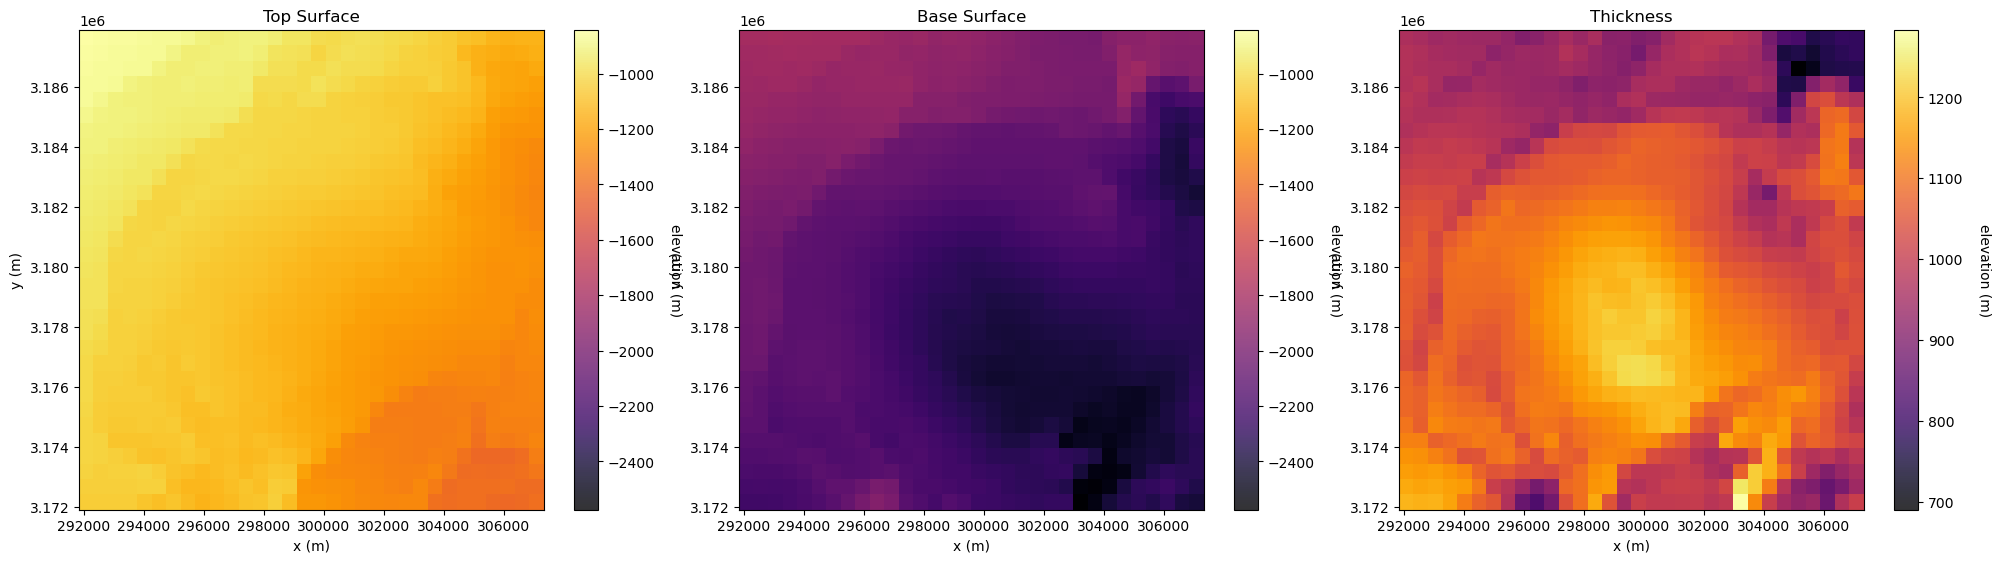

In [9]:
plt.subplot(131)
surf_top = np.array([df_surf_top['z']]).reshape((31,32))
GSLIB.pixelplt_st(surf_top,xmin,xmax,ymin,ymax,csiz,azmin,azmax,'Top Surface','x (m)','y (m)','elevation (m)',cmap)

plt.subplot(132)
surf_base = np.array([df_surf_base['z']]).reshape((31,32))
GSLIB.pixelplt_st(surf_base,xmin,xmax,ymin,ymax,csiz,azmin,azmax,'Base Surface','x (m)','y (m)','elevation (m)',cmap)

plt.subplot(133)
surf_thick = surf_top - surf_base

thmin = np.min(surf_thick.flatten()); thmax = np.max(surf_thick.flatten()); thavg = np.average(surf_thick.flatten())

GSLIB.pixelplt_st(surf_thick,xmin,xmax,ymin,ymax,csiz,thmin,thmax,'Thickness','x (m)','y (m)','elevation (m)',cmap)

nz = 20
zsiz = 100*np.round(thavg/100,0)/nz # round to simplify grid specs, avoid lots of digits
zmn = zsiz*0.5

zmin = zmn-zsiz*0.5
zmax = zmin + nz*zsiz

print('\nGSLIB Grid Specification, Z proportional: ')
print('nx, xmn, xsiz: ' + str(nx) + ', ' + str(xmn) + ', ' + str(xsiz))
print('ny, ymn, ysiz: ' + str(ny) + ', ' + str(ymn) + ', ' + str(ysiz)) 
print('nz, zmn, zsiz: ' + str(nz) + ', ' + str(zmn) + ', ' + str(zsiz))

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0, wspace=0.1, hspace=0.6); plt.show()

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object. We will also extract a limited sample to reduce data density. This way we can observe more of the heterogeneity from the simulation with the spatial continuity model, rather than mostly data driven heterogeneity.

#### Currently Generate Synthetic Data for Demonstration

Let's check the summary statistics to set the plotting minimum and maximum values.

In [10]:
# df.describe().transpose()                                 # summary statistics 

Now we can set these values for plotting:

In [11]:
#xmin = 0.0; xmax = 2000.0; zmin = 0.0; zmax = 200.0
Vshmin = 0.0; Vshmax = 0.5; Envmin = 0.0; Envmax = 1.0; RAImin = 0.0; RAImax = 1.0
nRAImin = -3.0; nRAImax = 3.0; nEnvmin = -3.0; nEnvmax = 3.0;
nVshmin = -3.0; nVshmax = 3.0; FVshmin = 0.0; FVshmax = 1.0
nPormin = -3.0; nPormax = 3.0; Pormin = 10.0; Pormax = 30.0
nPermmin = -3.0; nPermmax = 3.0; Permmin = 1.0; Permmax = 100.0

Let's look at the data before we simulate. Note, we visualize permeability with a natural log transform to improve interpretation, but all of our workflow steps are conducted in the regular feature space.

In [12]:
# os.chdir(r"C:\Local")  

# from numpy import genfromtxt
# #sgsim1 = genfromtxt('sgsim.out',skip_header=1,)

# sgsim1 =  GSLIB.GSLIB2ndarray_3D('sgsim1.out',0,1,31,32,20)[0][0,:,:,:]
# sgsim2 =  GSLIB.GSLIB2ndarray_3D('sgsim2.out',0,1,31,32,20)[0][0,:,:,:]

In [13]:
# sgsim1.shape
# plt.subplot(131)
# GSLIB.pixelplt_st(sgsim1[:,:,5],xmin,xmax,ymin,ymax,csiz,-3,3,'SGSIM1 iz = 5','x (m)','y (m)','elevation (m)',cmap)

# plt.subplot(132)
# GSLIB.pixelplt_st(sgsim1[:,:,10],xmin,xmax,ymin,ymax,csiz,-3,3,'SGSIM1 iz = 10','x (m)','y (m)','elevation (m)',cmap)

# plt.subplot(133)
# GSLIB.pixelplt_st(sgsim1[:,:,15],xmin,xmax,ymin,ymax,csiz,-3,3,'SGSIM1 iz = 15','x (m)','y (m)','elevation (m)',cmap)

# plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0, wspace=0.1, hspace=0.6); plt.show()

In [14]:
# plt.subplot(131)
# GSLIB.pixelplt_st(sgsim1[:,5,:].T,xmin,xmax,zmin,zmax,csiz,-3,3,'SGSIM1 ix = 5','y (m)','z (m)','elevation (m)',cmap)

# plt.subplot(132)
# GSLIB.pixelplt_st(sgsim1[:,15,:].T,xmin,xmax,zmin,zmax,csiz,-3,3,'SGSIM1 ix = 15','y (m)','z (m)','elevation (m)',cmap)

# plt.subplot(133)
# GSLIB.pixelplt_st(sgsim1[:,25,:].T,xmin,xmax,zmin,zmax,csiz,-3,3,'SGSIM1 ix = 25','y (m)','z (m)','elevation (m)',cmap)

# plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=0.3, wspace=0.1, hspace=0.6); plt.show()

In [15]:
# plt.scatter(sgsim1.flatten(),sgsim2.flatten(),color='darkorange',edgecolor = 'black',alpha=0.3)
# plt.xlabel('SGSIM #1'); plt.xlabel('SGSIM #2'); plt.title('Check Cosimulation Correlation') 
# add_grid2(); plt.xlim([-4,4]); plt.ylim([-4,4])

#### Synthetic Seismic by Sequential Gaussian Simulation - Collocated Cokriging and Vsh from f(Sesmic) + Random Residual

Now let's demonstrate collocated cokriging.  We first calculate a realization of porosity and then collocated cokriging realization of permeability constrained to the porosity realizations.

Load the Gaussian realizations:

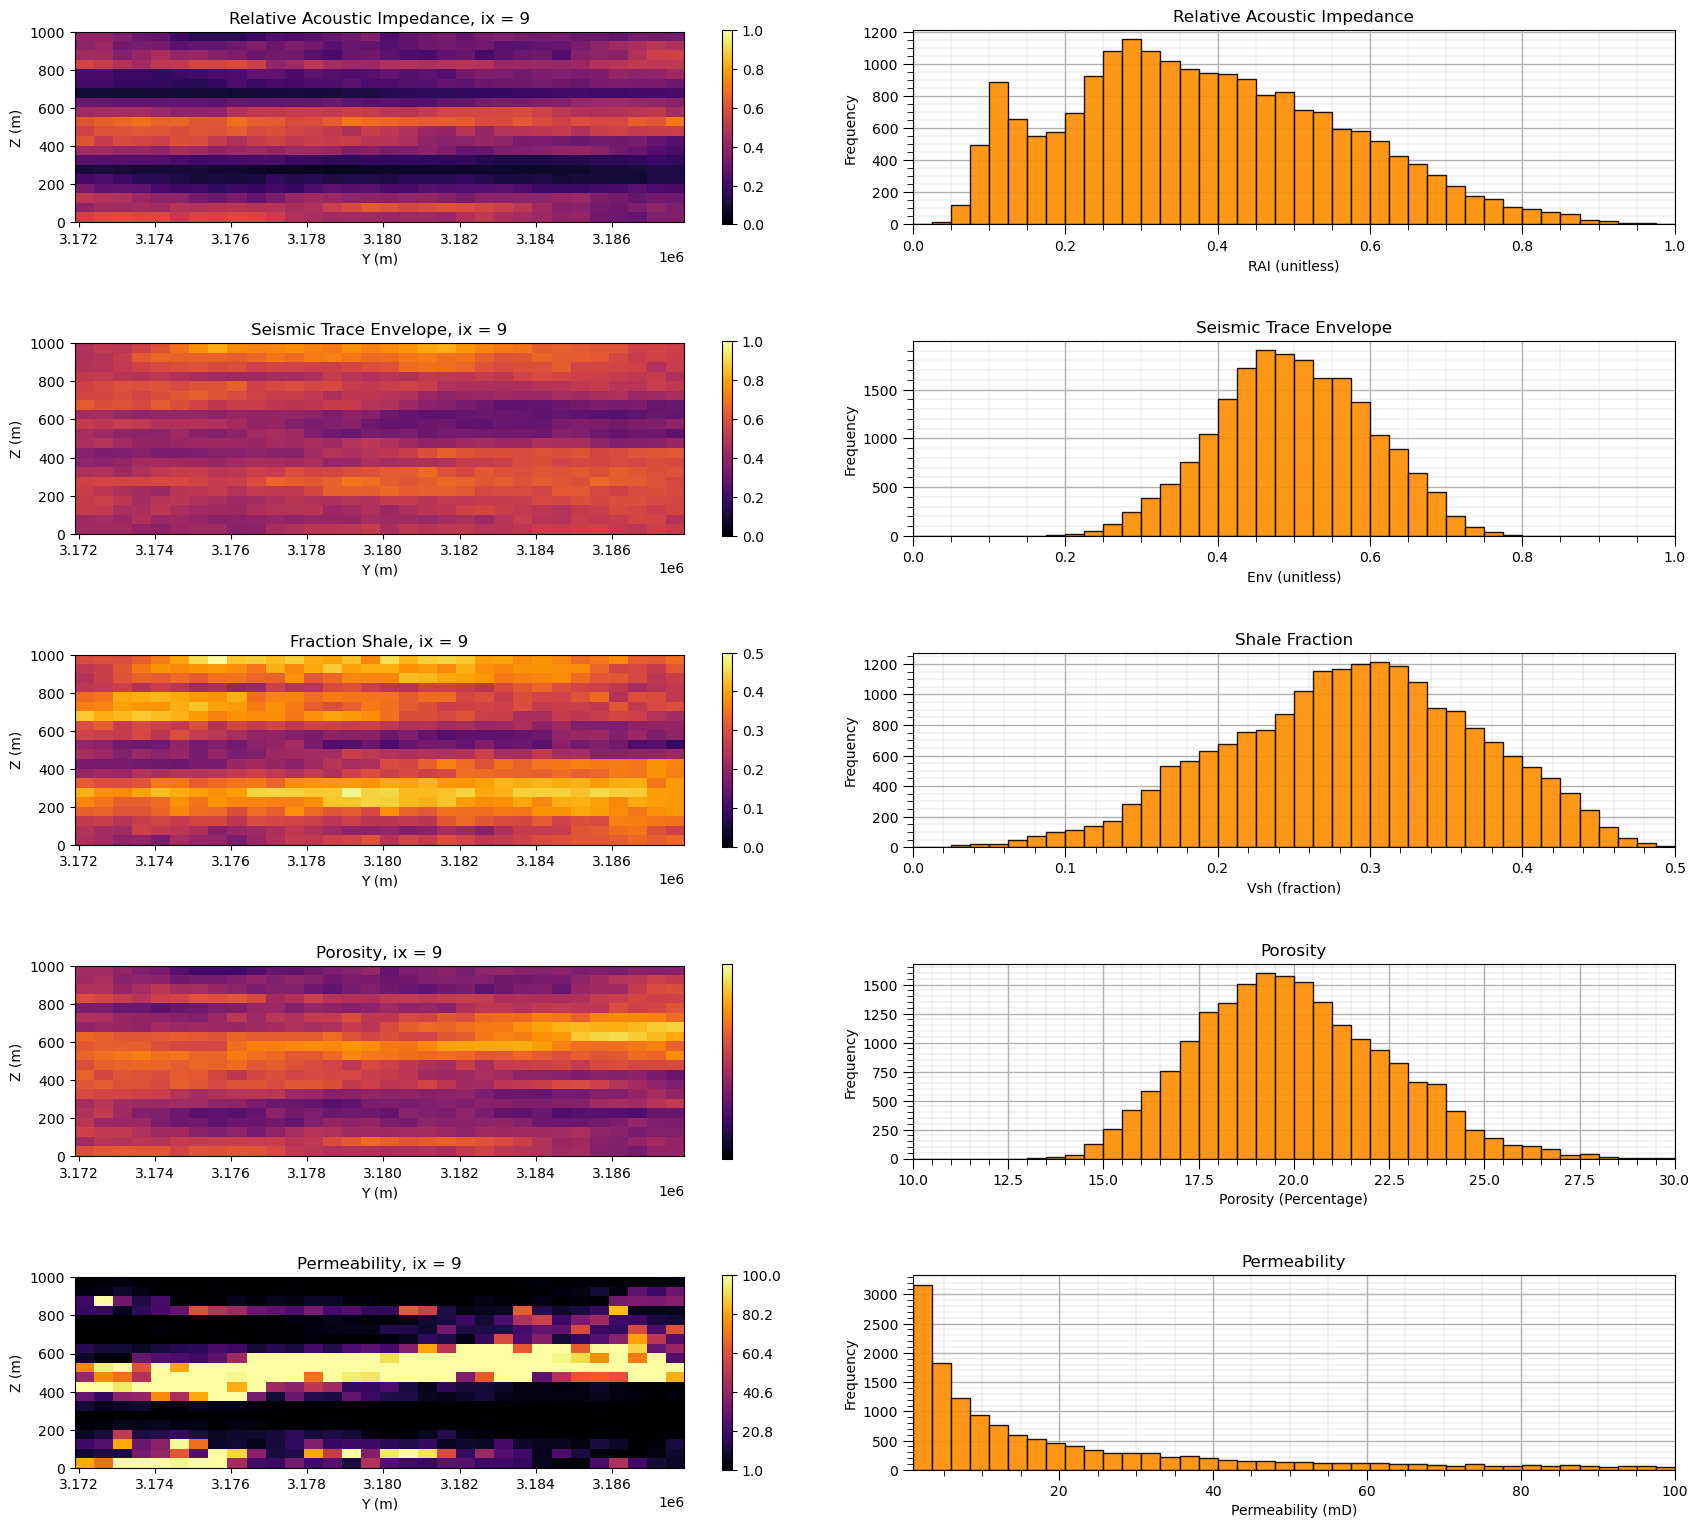

In [16]:
run_sim = False                                   # if false, just load, if true run and then load, requires sgsim.exs in current directory
os.chdir(r"C:\Local") 
run_sim = True
nxdis = 1; nydis = 1
ndmin = 0; ndmax = 20; radius = 100; ktype = 0; skmean = 0
vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=90.0,hmaj1=1000.0,hmin1=10.0)
vario_Perm = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=90.0,hmaj1=300.0,hmin1=4.0)
tmin = -99999; tmax = 99999

fmin = [-3.0,-3.0,-3.0] 
fmax = [3.0,3.0,3.0]
funit = ['Gaussian','Gaussian','Gaussian']
fname = ['Vsh','RAI','Env']
   
RAI_norm_truth = np.zeros((nz,ny,nx))
Env_norm_truth = np.zeros((nz,ny,nx))
Vsh_norm_truth = np.zeros((nz,ny,nx))
 
np.random.seed(seed=seed)
    
n = 100                                         # Reference distribution
df_ref = pd.DataFrame(np.vstack([np.random.rand(n)*(xmax-xmin)+xmin-10**7,
                             np.random.rand(n)*(ymax-ymin)+ymin,
                             np.random.normal(loc = 0.5,scale=0.1,size=n),
                             np.random.normal(loc = 0.5,scale=0.1,size=n),
                             np.random.normal(loc = 20.0,scale=2.5,size=n),
                             np.random.lognormal(mean = 2.0,sigma=1.0,size=n),
                                ]).T, columns= ['X','Y','RAI','Env','Por','Perm'])
 
if run_sim == True:  
    os.system("sgsim.exe sgsim1.par")

sim_RAI_truth = GSLIB.GSLIB2ndarray_3D('sgsim1.out',0,1,31,32,20)[0][0,:,:,:]
sim_RAI_truth = GSLIB.affine(sim_RAI_truth,tmean = 0.5, tstdev = 0.1)
            
vsh_vert_trend = np.zeros(nz); vsh_areal_trend = np.zeros((ny,nx))
shale_layers = np.array([int(nz*0.7),int(nz*0.3)])
for iz in range(0,nz):
    vsh_vert_trend[iz] = abs(iz - shale_layers.flat[np.abs(shale_layers - iz).argmin()])
    
vsh_vert_trend = vsh_vert_trend.clip(min = 0.1,max = 3.0)
vsh_vert_trend = vsh_vert_trend/3.0
vsh_vert_trend = vsh_vert_trend + (np.full((nz),(1.0-np.average(vsh_vert_trend))))

# must be normalized [0.01,0.40] for below. Confirm here.
RAI_truth = 0.7*(sim_RAI_truth - np.min(sim_RAI_truth.flatten()))/(np.max(sim_RAI_truth.flatten())-np.min(sim_RAI_truth.flatten()))+0.1
    
for iy in range(0,ny):
    for ix in range(0,nx):
        vsh_areal_trend[iy,ix] = ((ix-nx/2.0)/(nx-1))*0.4+1.0
    
for iz in range(0,nz):
    for iy in range(0,ny):
        for ix in range(0,nx):
            RAI_truth[iz,iy,ix] = RAI_truth[iz,iy,ix] * vsh_vert_trend[iz]*vsh_areal_trend[iy,ix]

if run_sim == True:
    os.system("sgsim.exe sgsim2.par")
    
cosim_Env_truth = GSLIB.GSLIB2ndarray_3D('sgsim2.out',0,1,31,32,20)[0][0,:,:,:]
cosim_Env_truth = GSLIB.affine(cosim_Env_truth,tmean = 0.5, tstdev = 0.1)

Env_truth = cosim_Env_truth 

Vsh_truth = -0.4*RAI_truth + 0.6*Env_truth + np.random.normal(loc = 0.0,scale=0.02,size = (nz,ny,nx))
Vsh_truth = (Vsh_truth - np.min(Vsh_truth.flatten()))/((np.max(Vsh_truth.flatten()) - np.min(Vsh_truth.flatten())))*np.full((nz,ny,nx),0.5) 
  
GSLIB.ndarray2GSLIB_3D(Vsh_truth,'Vsh_truth.out','Vsh_Truth')        
        
if run_sim == True:    
    os.system("sgsim.exe sgsim3.par")
    
Por_truth = GSLIB.GSLIB2ndarray_3D('Porosity.out',0,1,31,32,20)[0][0,:,:,:]
Por_truth = GSLIB.affine(sim_RAI_truth,tmean = 20.0, tstdev = 2.5)
    
if run_sim == True: 
    os.system("sgsim.exe sgsim4.par")
    
Perm_truth = GSLIB.GSLIB2ndarray_3D('Perm.out',0,1,31,32,20)[0][0,:,:,:]
Perm_truth = np.exp(Perm_truth*2.0+2.5)

plt.subplot(5,2,1)
im = plt.imshow(RAI_truth[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = RAImin, vmax = RAImax,
                 cmap = cmap,aspect=5)
plt.title('Relative Acoustic Impedance, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(RAImin, RAImax, 6))


plt.subplot(5,2,2)
GSLIB.hist_st(RAI_truth.flatten(),RAImin,RAImax,0,0,40,None,'RAI (unitless)','Relative Acoustic Impedance')
add_grid2()

plt.subplot(5,2,3)
im = plt.imshow(Env_truth[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Envmin, vmax = Envmax,
                 cmap = cmap,aspect=5)
plt.title('Seismic Trace Envelope, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Envmin, Envmax, 6))

plt.subplot(5,2,4)
GSLIB.hist_st(Env_truth.flatten(),Envmin,Envmax,0,0,40,None,'Env (unitless)','Seismic Trace Envelope')
add_grid2()

plt.subplot(5,2,5)
im = plt.imshow(Vsh_truth[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Vshmin, vmax =Vshmax,
                 cmap = cmap,aspect=5)
plt.title('Fraction Shale, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Vshmin, Vshmax, 6))

plt.subplot(5,2,6)
GSLIB.hist_st(Vsh_truth.flatten(),Vshmin,Vshmax,0,0,40,None,'Vsh (fraction)','Shale Fraction')
add_grid2()

plt.subplot(5,2,7)
im = plt.imshow(Por_truth[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Pormin, vmax = Pormax,
                 cmap = cmap,aspect=5)
plt.title('Porosity, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Envmin, Envmax, 6))

plt.subplot(5,2,8)
GSLIB.hist_st(Por_truth.flatten(),Pormin,Pormax,0,0,40,None,'Porosity (Percentage)','Porosity')
add_grid2()

plt.subplot(5,2,9)
im = plt.imshow(Perm_truth[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Permmin, vmax = Permmax,
                 cmap = cmap,aspect=5)
plt.title('Permeability, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Permmin, Permmax, 6))

plt.subplot(5,2,10)
GSLIB.hist_st(Perm_truth.flatten(),Permmin,Permmax,0,0,40,None,'Permeability (mD)','Permeability')
add_grid2()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=3.0, wspace=0.1, hspace=0.6); plt.show()

#### Build Well Dataset from Well

Wells X:[296600. 296600. 296600. 296600. 296600. 296600.]
Wells Y:[3174650. 3177150. 3180150. 3182650. 3184650. 3186150.]


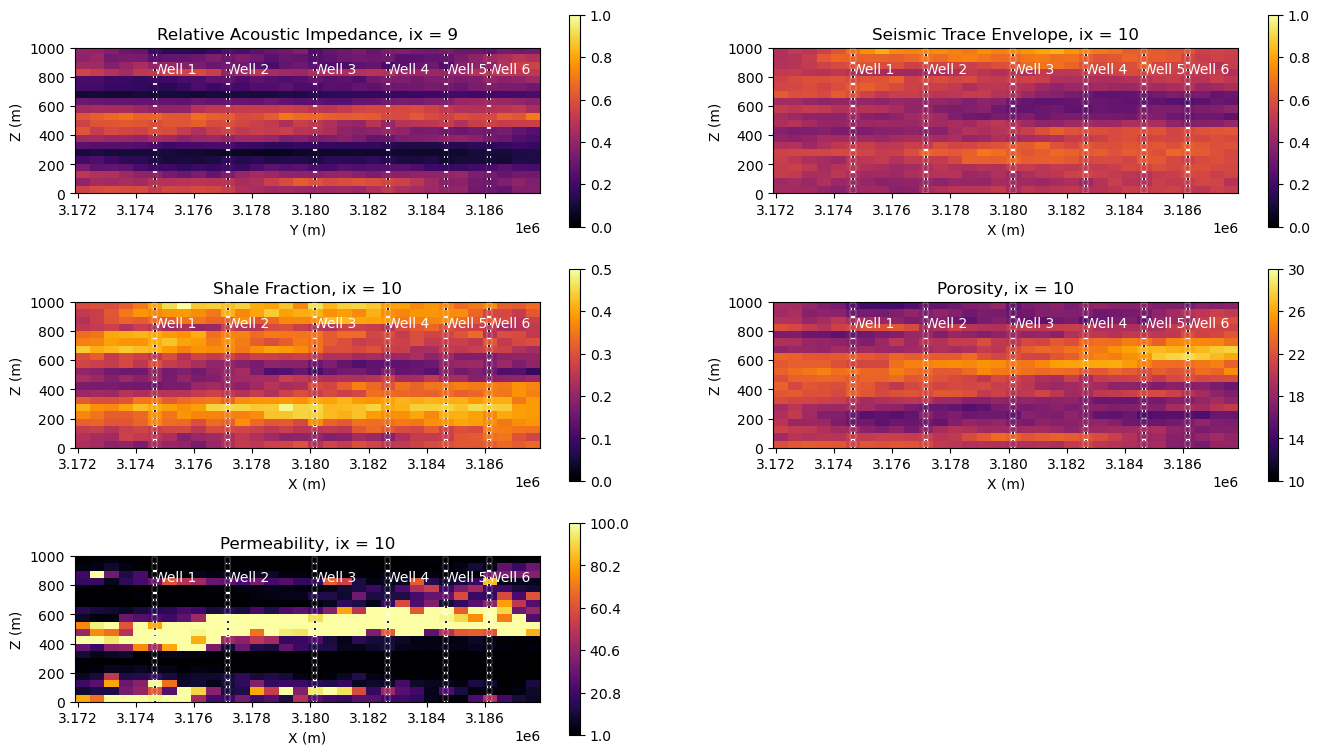

In [17]:
ix = 9
iy = [5,10,16,21,25,28]
#iy = [9] # for testing
      
wellsx = np.full((len(iy)),xmn + (ix)*xsiz); wellsy = np.zeros(len(iy))
for i in range(0,len(iy)):
    wellsy[i] = ymn + (iy[i])*ysiz

print('Wells X:' + str(wellsx))
print('Wells Y:' + str(wellsy))

x = np.zeros(len(wellsy)*nz)
y = np.zeros(len(wellsy)*nz)
z = np.zeros(len(wellsy)*nz)
well_Vsh = np.zeros(len(wellsy)*nz) 
well_RAI = np.zeros(len(wellsy)*nz) 
well_Env = np.zeros(len(wellsy)*nz)
well_Por = np.zeros(len(wellsy)*nz)
well_Perm = np.zeros(len(wellsy)*nz)

plt.subplot(321)
im = plt.imshow(RAI_truth[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = RAImin, vmax = RAImax,
                 cmap = cmap,aspect=5)
plt.title('Relative Acoustic Impedance, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(RAImin, RAImax, 6))

for iwell in range(0,len(wellsy)):
    ix = geostats.getindex(nx,xmn,xsiz,wellsx[iwell])
    iy = geostats.getindex(ny,ymn,ysiz,wellsy[iwell])
    plt.vlines(wellsy[iwell],zmin,zmax,color='white',lw=3,zorder=1)
    plt.vlines(wellsy[iwell],zmin,zmax,color='black',ls='--',zorder=2)
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-30,nz*zsiz*0.8+zmn],size=10,color='white',rotation=0.0)
    plt.scatter(np.full(nz,wellsy[iwell]),np.linspace(zmn+(nz-1)*zsiz,zmn,nz),c=RAI_truth[:,ny-iy-1,ix],s=15,lw=0.2,
       marker='s',zorder=20,vmin=RAImin,vmax=RAImax,cmap=plt.cm.inferno)
    #     plt.scatter(np.full(nz,wellsy[iwell]),np.linspace(zmn,zmn+(nz-1)*zsiz,nz),c=RAI_truth[:,iy,ix],s=15,lw=0.2,
#         marker='s',zorder=20,vmin=RAImin,vmax=RAImax,cmap=plt.cm.inferno)
    well_RAI[nz*iwell:nz*(iwell+1)] = RAI_truth[:,iy,ix]
    z[nz*iwell:nz*(iwell+1)] = np.linspace(zmn+(nz-1)*zsiz,zmn,nz); 
    y[nz*iwell:nz*(iwell+1)] = np.full(nz,wellsy[iwell])
    x[nz*iwell:nz*(iwell+1)] = np.full(nz,wellsx[iwell])
    
plt.subplot(322)
im = plt.imshow(Env_truth[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Envmin, vmax = Envmax,
                cmap = cmap,aspect=5)
plt.title('Seismic Trace Envelope, ix = 10'); plt.xlabel('X (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Envmin, Envmax, 6))

for iwell in range(0,len(wellsy)):
    ix = geostats.getindex(nx,xmn,xsiz,wellsx[iwell])
    iy = geostats.getindex(ny,ymn,ysiz,wellsy[iwell])
    plt.vlines(wellsy[iwell],zmin,zmax,color='white',lw=3,zorder=1)
    plt.vlines(wellsy[iwell],zmin,zmax,color='black',ls='--',zorder=2)
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-30,nz*zsiz*0.8+zmn],size=10,color='white',rotation=0.0)
    plt.scatter(np.full(nz,wellsy[iwell]),np.linspace(zmn+(nz-1)*zsiz,zmn,nz),c=Env_truth[:,ny-iy-1,ix],s=15,lw=0.2,marker='s',edgecolor='white',zorder=20,vmin=Envmin,vmax=Envmax,cmap=plt.cm.inferno)
    well_Env[nz*iwell:nz*(iwell+1)] = Env_truth[:,iy,ix]

plt.subplot(323)
im = plt.imshow(Vsh_truth[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Vshmin, vmax = Vshmax,
                cmap = cmap,aspect=5)
plt.title('Shale Fraction, ix = 10'); plt.xlabel('X (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Vshmin, Vshmax, 6))

for iwell in range(0,len(wellsy)):
    ix = geostats.getindex(nx,xmn,xsiz,wellsx[iwell])
    iy = geostats.getindex(ny,ymn,ysiz,wellsy[iwell])
    plt.vlines(wellsy[iwell],zmin,zmax,color='white',lw=3,zorder=1)
    plt.vlines(wellsy[iwell],zmin,zmax,color='black',ls='--',zorder=2)
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-30,nz*zsiz*0.8+zmn],size=10,color='white',rotation=0.0)
    plt.scatter(np.full(nz,wellsy[iwell]),np.linspace(zmn+(nz-1)*zsiz,zmn,nz),c=Vsh_truth[:,ny-iy-1,ix],s=15,lw=0.2,marker='s',edgecolor='white',zorder=20,vmin=Vshmin,vmax=Vshmax,cmap=plt.cm.inferno)
    #plt.scatter(np.full(nz,wellsy[iwell]),np.linspace(zmn,zmn+(nz-1)*zsiz,nz),c=Vsh_truth[:,iy,ix],s=10,lw=0.5,marker='s',edgecolor='white',zorder=20,vmin=Vshmin,vmax=Vshmax,cmap=plt.cm.inferno)

    well_Vsh[nz*iwell:nz*(iwell+1)] = Vsh_truth[:,iy,ix]

plt.subplot(324)
im = plt.imshow(Por_truth[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Pormin, vmax = Pormax,
                cmap = cmap,aspect=5)
plt.title('Porosity, ix = 10'); plt.xlabel('X (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Pormin, Pormax, 6))

for iwell in range(0,len(wellsy)):
    ix = geostats.getindex(nx,xmn,xsiz,wellsx[iwell])
    iy = geostats.getindex(ny,ymn,ysiz,wellsy[iwell])
    plt.vlines(wellsy[iwell],zmin,zmax,color='white',lw=3,zorder=1)
    plt.vlines(wellsy[iwell],zmin,zmax,color='black',ls='--',zorder=2)
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-30,nz*zsiz*0.8+zmn],size=10,color='white',rotation=0.0)
    plt.scatter(np.full(nz,wellsy[iwell]),np.linspace(zmn+(nz-1)*zsiz,zmn,nz),c=Por_truth[:,ny-iy-1,ix],s=15,lw=0.2,marker='s',edgecolor='white',zorder=20,vmin=Pormin,vmax=Pormax,cmap=plt.cm.inferno)
    well_Por[nz*iwell:nz*(iwell+1)] = Por_truth[:,iy,ix]

plt.subplot(325)
im = plt.imshow(Perm_truth[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Permmin, vmax = Permmax,
                cmap = cmap,aspect=5)
plt.title('Permeability, ix = 10'); plt.xlabel('X (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Permmin, Permmax, 6))

for iwell in range(0,len(wellsy)):
    ix = geostats.getindex(nx,xmn,xsiz,wellsx[iwell])
    iy = geostats.getindex(ny,ymn,ysiz,wellsy[iwell])
    plt.vlines(wellsy[iwell],zmin,zmax,color='white',lw=3,zorder=1)
    plt.vlines(wellsy[iwell],zmin,zmax,color='black',ls='--',zorder=2)
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-30,nz*zsiz*0.8+zmn],size=10,color='white',rotation=0.0)
    plt.scatter(np.full(nz,wellsy[iwell]),np.linspace(zmn+(nz-1)*zsiz,zmn,nz),c=Perm_truth[:,ny-iy-1,ix],s=15,lw=0.2,marker='s',edgecolor='white',zorder=20,vmin=Permmin,vmax=Permmax,cmap=plt.cm.inferno)
    well_Perm[nz*iwell:nz*(iwell+1)] = Perm_truth[:,iy,ix]

df_well = pd.DataFrame(np.vstack([x,y,z,well_Vsh,well_RAI,well_Env,well_Por,well_Perm]).T,columns= ['x','y','z','Vsh','RAI','Env','Por','Perm'])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.5, wspace=0.2, hspace=0.2); plt.show()

In [18]:
# plt.subplot(121)
# im = plt.imshow(RAI_truth[9,:,:],interpolation = None,extent = [xmin,xmax,ymin,ymax], vmin = RAImin, vmax = RAImax,
#                 cmap = cmap,aspect=1)

# plt.title('RAI Truth, iz = 9'); plt.xlabel('X (m)');plt.ylabel('Y (m)')
# cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(RAImin, RAImax, 6))

# ix = geostats.getindex(nx,xmn,xsiz,wellsx[0])
# iy = geostats.getindex(ny,ymn,ysiz,wellsy[0])

# plt.scatter(df_well['x'],wellsy,c = RAI_truth[9,ny-iy-1,ix],vmin=RAImin,vmax=RAImax,cmap=cmap)
# plt.scatter(wellsx,wellsy,c = RAI_truth[9,iy,ix],vmin=RAImin,vmax=RAImax,cmap=cmap)

# plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Check Well Matrix Scatter Plot

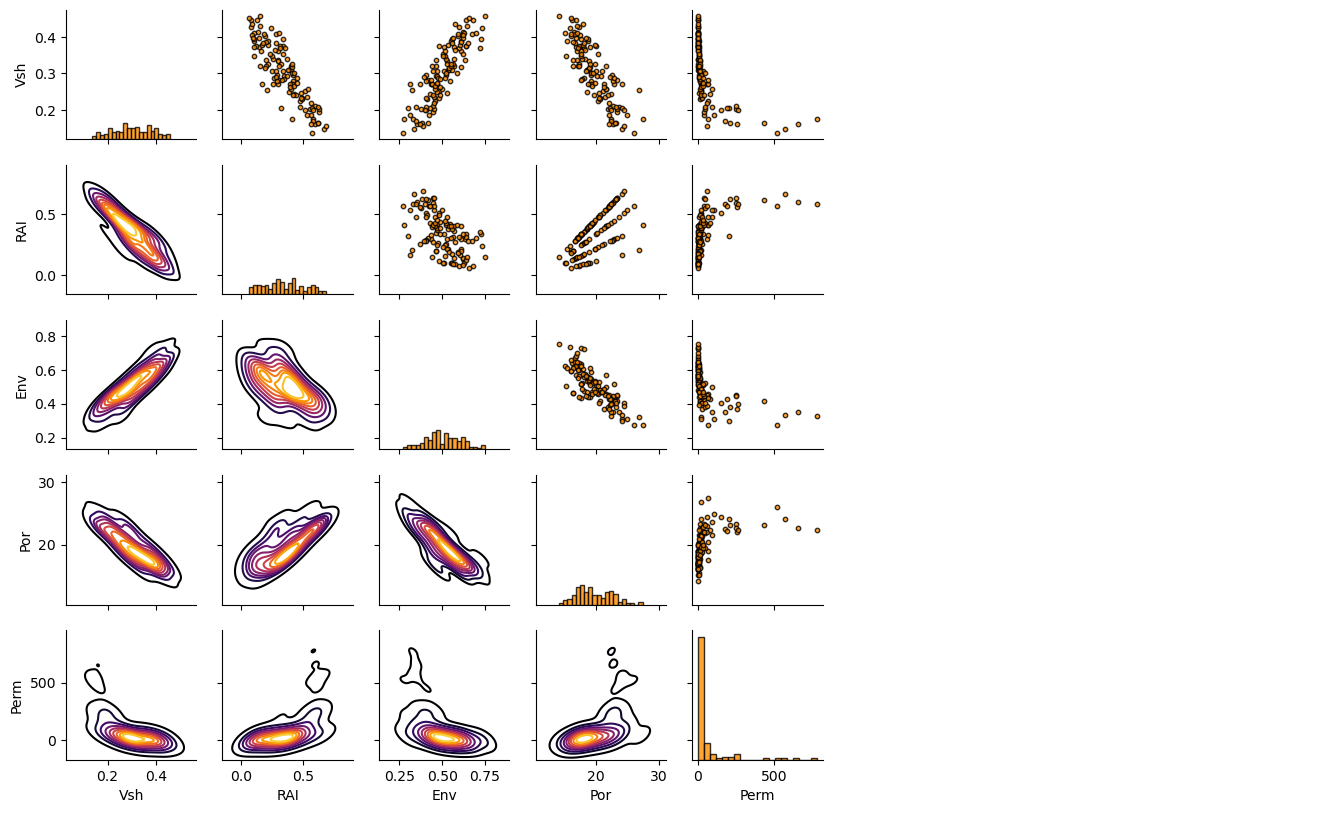

In [19]:
pairgrid = sns.PairGrid(df_well,vars=['Vsh','RAI','Env','Por','Perm'])
pairgrid = pairgrid.map_upper(plt.scatter, color = 'darkorange', edgecolor = 'black', alpha = 0.8, s = 10)
pairgrid = pairgrid.map_diag(plt.hist, bins = 20, color = 'darkorange',alpha = 0.8, edgecolor = 'k')# Map a density plot to the lower triangle
pairgrid = pairgrid.map_lower(sns.kdeplot, cmap = plt.cm.inferno, 
                              shade = False, shade_lowest = False, alpha = 1.0, n_levels = 10)
pairgrid.add_legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.6, top=0.6, wspace=0.2, hspace=0.2)

#### Representative Block Vsh Distribution By Soft Data Debiasing

We impute the missing part of the distribution

* calculate representative mean and variance over the block using location (trend) or secondary data

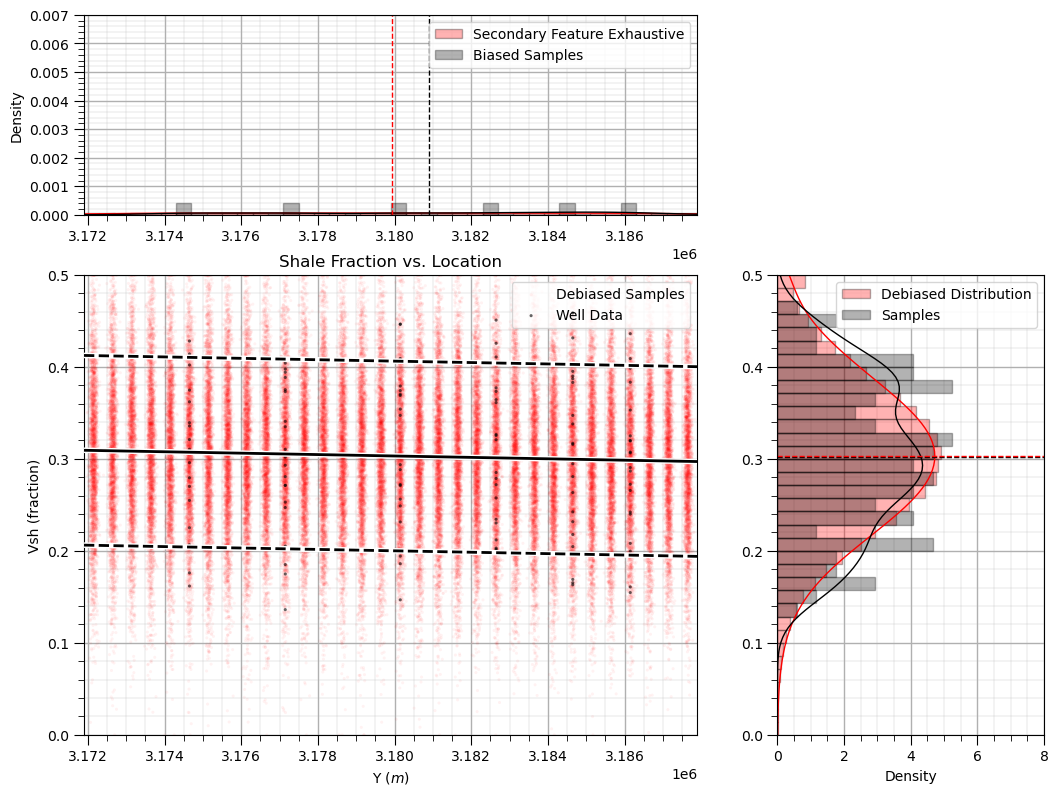

In [20]:
np.random.seed(seed=23)
nbin = 300
y_new = np.linspace(ymin,ymax,nbin) 

plt_scatter = plt.subplot2grid((3, 3), (1, 0), rowspan=2, colspan=2)
plt_x1 = plt.subplot2grid((3, 3), (0, 0), colspan=2,sharex=plt_scatter)
plt_x2 = plt.subplot2grid((3, 3), (1, 2), rowspan=2,sharey=plt_scatter)    

linear = LinearRegression().fit(df_well['y'].values.reshape(-1, 1),df_well['Vsh'].values)
linear_Vsh_trend = linear.predict(y_new.reshape(-1, 1))
res_Vsh_trend = df_well['Vsh'].values - linear.predict(df_well['y'].values.reshape(-1, 1))
res_Vsh_trend_std = np.std(res_Vsh_trend)
res_Vsh_trend_P10 = norm.ppf(0.1,loc=0.0,scale=res_Vsh_trend_std); res_Vsh_trend_P90 = norm.ppf(0.9,loc=0.0,scale=res_Vsh_trend_std )

# plt_scatter.scatter(cosim_AI.flatten(),sim_por.flatten(),color='red',edgecolors="none",s=10,alpha=0.2,zorder=1,
#                     label='Truth')

nVsh = 100
Vshsiz = (Vshmax - Vshmin)/nVsh; Vshmn = Vshmin + 0.5*Vshsiz; 
cond_pdf = np.zeros([ny,nVsh])

for iVsh, lVsh in enumerate(np.arange(Vshmn,Vshmn+nVsh*Vshsiz,Vshsiz)):
    for iy, ly in enumerate(np.arange(ymn,ymn+ny*ysiz,ysiz)): 
#         por_exp = spl_exp(AI); por_P10 = spl_P10(AI); por_P90 = spl_P90(AI) 
#         por_stdev = (por_P90 - por_P10)/2.56310
        
        Vsh_trend_exp = linear.predict(ly.reshape(1, -1))
        Vsh_trend_stdev = res_Vsh_trend_std
        #print(nVsh - iVsh - 1)
        cond_pdf[iy,nVsh - iVsh - 1] = st.norm.pdf(lVsh, loc=Vsh_trend_exp, scale=Vsh_trend_stdev)

# plt_scatter.imshow(cond_pdf,alpha=0.3,extent=(xmin,xmax,Vshmin,Vshmax),aspect='auto',zorder=1,cmap = plt.cm.inferno) 

plt_scatter.plot(y_new,linear_Vsh_trend,color='white',lw=4,zorder=500)
plt_scatter.plot(y_new,linear_Vsh_trend,color='black',lw=2,zorder=1000)
plt_scatter.plot(y_new,linear_Vsh_trend + res_Vsh_trend_P10,color='white',lw=4,zorder=500)
plt_scatter.plot(y_new,linear_Vsh_trend + res_Vsh_trend_P10,color='black',ls='--',lw=2,zorder=1000)
plt_scatter.plot(y_new,linear_Vsh_trend + res_Vsh_trend_P90,color='white',lw=4,zorder=500)
plt_scatter.plot(y_new,linear_Vsh_trend + res_Vsh_trend_P90,color='black',ls='--',lw=2,zorder=1000)
    
L = 100000
#dip_sample = np.random.normal(loc = dip_model_mean,scale=dip_model_stdev,size = L)
y_locations = np.zeros((ny,nx,nz))
for iz in range(0,nz):
    for iy in range(0,ny):
        for ix in range(0,nx):
            y_locations[iy,ix,iz] = ymn + iy * ysiz

y_sample = np.random.choice(y_locations.flatten(),size=L,replace = True) + np.random.normal(loc=0.0,scale = ((ymax-ymin)/(nbin)),size =L)
Vsh_sample = np.zeros(len(y_sample))

# por_exp = spl_exp(AI_sample); por_P10 = spl_P10(AI_sample); por_P90 = spl_P90(AI_sample) 
# por_stdev = (por_P90 - por_P10)/2.56310

lVsh_exp = linear.predict(y_sample.reshape(-1, 1))
lVsh_stdev = np.full(len(y_sample),res_Vsh_trend_std)

#Vsh_sample = np.random.choice(Vsh_truth.flatten(),size = L) # stationary over location
Vsh_sample = np.clip(np.random.normal(loc = lVsh_exp,scale = lVsh_stdev,size=L),a_min=Vshmin,a_max=Vshmax)

plt_scatter.scatter(y_sample,Vsh_sample,color='red',s=5,edgecolors="none",alpha=0.05,label='Debiased Samples')

plt_scatter.scatter(df_well['y'].values,df_well['Vsh'].values,color='black',edgecolors="none",
                    s=5,alpha=0.6,zorder=100,label='Well Data')
plt_scatter.legend(loc='upper right') 
plt_scatter.set_ylim([Vshmin,Vshmax]); plt_scatter.set_xlim([ymin,ymax]); add_grid(plt_scatter)

plt_scatter.set_ylabel('Vsh (fraction)'); plt_scatter.set_xlabel(r'Y $(m)$');
plt_scatter.set_title('Shale Fraction vs. Location')    

#dip_model_pdf = st.norm.pdf(np.arange(dipmin,dipmax,10.0),loc=dip_model_mean, scale=dip_model_stdev)

kde = st.gaussian_kde(y_sample,bw_method=0.3)
plt_x1.plot(np.linspace(ymin,ymax,100),kde(np.linspace(ymin,ymax,100)),c='red',lw=1)

plt_x1.hist(y_sample,density = True,color='red',alpha=0.3,edgecolor='black',
            bins=np.linspace(ymin,ymax,41),label='Secondary Feature Exhaustive')
plt_x1.hist(df_well['y'].values,density = True,color='black',alpha=0.3,edgecolor='black',
             bins=np.linspace(ymin,ymax,41),label='Biased Samples')

kde = st.gaussian_kde(df_well['y'].values,bw_method=0.3)
plt_x1.plot(np.linspace(ymin,ymax,100),kde(np.linspace(ymin,ymax,100)),c='black',lw=1)

plt_x1.plot([np.average(df_well['y'].values),np.average(df_well['y'].values)],[0,1],c='black',lw=1,ls='--')
plt_x1.plot([np.average(y_sample),np.average(y_sample)],[0,1],c='red',lw=1,ls='--')

plt_x1.set_xlim([ymin,ymax]); plt_x1.legend(loc='upper right'); plt_x1.set_ylim([0.0,0.007])
add_grid(plt_x1); plt_x1.set_ylabel('Density'); plt_x1.legend(loc='upper right');

plt_x2.hist(Vsh_sample,orientation='horizontal',density = True,color='red',alpha=0.3,edgecolor='black',
             bins=np.linspace(Vshmin,Vshmax,36),label='Debiased Distribution')
plt_x2.hist(df_well['Vsh'].values,orientation='horizontal',density = True,color='black',alpha=0.3,
            edgecolor='black',bins=np.linspace(Vshmin,Vshmax,36),label='Samples')

kde = st.gaussian_kde(Vsh_sample,bw_method=0.3)
plt_x2.plot(kde(np.linspace(Vshmin,Vshmax,100)),np.linspace(Vshmin,Vshmax,100),c='red',lw=1)

kde = st.gaussian_kde(df_well['Vsh'].values,bw_method=0.3)
plt_x2.plot(kde(np.linspace(Vshmin,Vshmax,100)),np.linspace(Vshmin,Vshmax,100),c='black',lw=1)

plt_x2.plot([0,25],[np.average(df_well['Vsh'].values),np.average(df_well['Vsh'].values)],c='black',lw=1,ls='--')
plt_x2.plot([0,25],[np.average(Vsh_sample),np.average(Vsh_sample)],c='red',lw=1,ls='--')

plt_x2.set_ylim([Vshmin,Vshmax]); plt_x2.set_xlim([0,8]); plt_x2.legend(loc='upper right'); add_grid(plt_x2)
plt_x2.set_xlabel('Density')

debias_Vsh_exp = np.average(Vsh_sample) 
debias_Vsh_var = np.var(Vsh_sample).clip(min = 0.0001)
debias_Vsh_stdev = np.sqrt(debias_Vsh_var) 

debias_correction = (np.average(Vsh_sample) - np.average(df_well['Vsh'].values))/np.average(Vsh_sample)*100
plt_x2.annotate(r'$\overline{x}_{naive}$ = ' + str(np.round(np.average(df_well['Vsh'].values),2)),(1,0.9))
plt_x2.annotate(r'$\overline{x}_{debiased}$ = ' + str(np.round(np.average(Vsh_sample),2)),(1,0.87))
plt_x2.annotate(r'$Correction$ = ' + str(np.round(debias_correction,2)),(1,0.84))

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.5, wspace=0.3, hspace=0.3); plt.show()

#### Calculate Vsh Trend Model

2D areal and 1D vertical trend approach.

* calculate 2D (1D here for a 2D section) areal trend and 1D vertical trend 

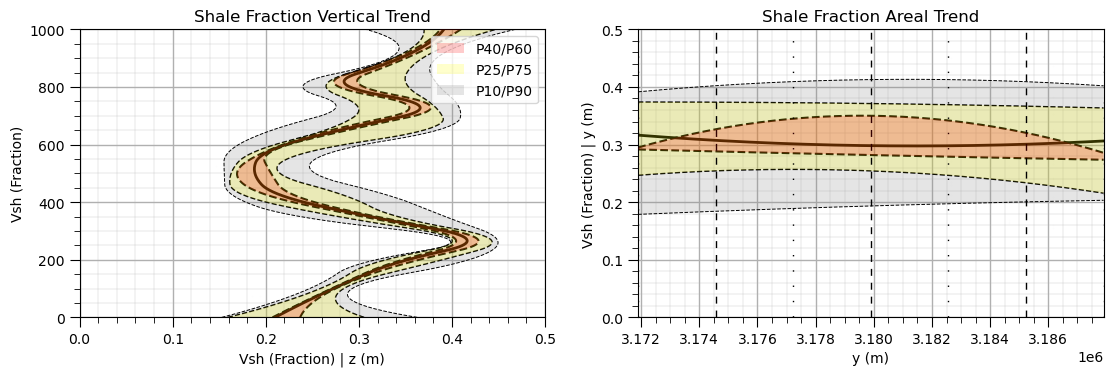

In [21]:
i=0
plt.subplot(121)
Vsh_z_exp,Vsh_z_P10,Vsh_z_P90 = cond_prob_plot_rot(df_well['z'].values,zmin,zmax,'z','m',13,df_well['Vsh'],Vshmin,Vshmax,'Vsh','Fraction')
plt.title('Shale Fraction Vertical Trend')

plt.subplot(122)
Vsh_y_exp,Vsh_y_P10,Vsh_y_P90 = cond_prob_plot(df_well['y'].values,ymin,ymax,'y','m',3,df_well['Vsh'],Vshmin,Vshmax,'Vsh','Fraction',k=2)
plt.title('Shale Fraction Areal Trend')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=0.6, wspace=0.2, hspace=0.2); plt.show()

#### Combine 2D Areal and 1D Vertical Trends

Apply the representative global mean to the 2D and 1D trends to calculate a 3D trend model

* calculate the representative 3D trend model from well data only

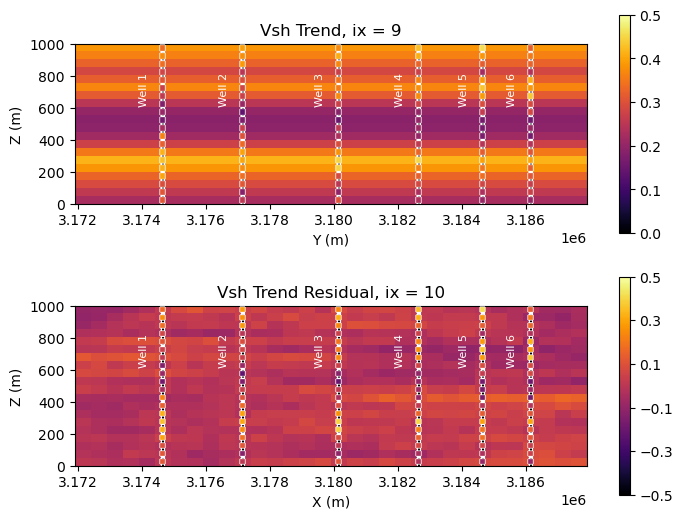

In [22]:
Vsh_combined_trend = np.zeros((nz,ny,nx))

for ix in range(0,nx):
    for iy in range(0,ny):
        ly = ymn + (ny-iy-1) * ysiz
        for iz in range(0,nz):
            lz = zmn + (nz-iz-1) * zsiz 
            Vsh_combined_trend[iz,iy,ix] = Vsh_z_exp(lz)
            #Vsh_combined_trend[iy,ix,iz] = Vsh_z_exp(lz)*Vsh_y_exp(ly) / debias_Vsh_exp 
        
Vsh_trend_well = sample_3D(Vsh_combined_trend, xmin, ymin, zmin, xsiz, ysiz, zsiz, 'Vsh_Trend', df_well,'x','y','z')
Vsh_trend_well['Vsh_Residual'] = Vsh_trend_well['Vsh'] - Vsh_trend_well['Vsh_Trend'] 
  
plt.subplot(211)
im = plt.imshow(Vsh_combined_trend[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Vshmin, vmax = Vshmax,
                 cmap = cmap,aspect=5)
plt.title('Vsh Trend, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Vshmin, Vshmax, 6))

for iwell in range(0,len(wellsy)):
    ix = geostats.getindex(nx,xmn,xsiz,wellsx[iwell])
    iy = geostats.getindex(ny,ymn,ysiz,wellsy[iwell])
    plt.vlines(wellsy[iwell],zmin,zmax,color='white',lw=3,zorder=1)
    plt.vlines(wellsy[iwell],zmin,zmax,color='black',ls='--',zorder=2)
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=Vsh_trend_well['Vsh'],s=15,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=Vshmin,vmax=Vshmax,cmap=plt.cm.inferno)

Vsh_truth_residual = Vsh_truth - Vsh_combined_trend 

plt.subplot(212)
im = plt.imshow(Vsh_truth_residual[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = -0.5, vmax = 0.5,
                cmap = cmap,aspect=5)
plt.title('Vsh Trend Residual, ix = 10'); plt.xlabel('X (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(-0.5,0.5, 6))

for iwell in range(0,len(wellsy)):
    ix = geostats.getindex(nx,xmn,xsiz,wellsx[iwell])
    iy = geostats.getindex(ny,ymn,ysiz,wellsy[iwell])
    plt.vlines(wellsy[iwell],zmin,zmax,color='white',lw=3,zorder=1)
    plt.vlines(wellsy[iwell],zmin,zmax,color='black',ls='--',zorder=2)
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=Vsh_trend_well['Vsh'],s=15,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=Vshmin,vmax=Vshmax,cmap=plt.cm.inferno)
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Vsh Trend Diagnostics

Check the Vsh trend model 

* representative Vsh distribution, vs. Vsh trend distribution, observe regression to the mean, calculate trend variance
* Vsh residual (Vsh well data - Vsh trend) distribution, check mean near 0.0
* calculate the trend and residual proportions of variance, could include covariance (optional)
* calculate the Vsh residual vs. trend to check for conditional bias and overall residual dispersion from 0.0 

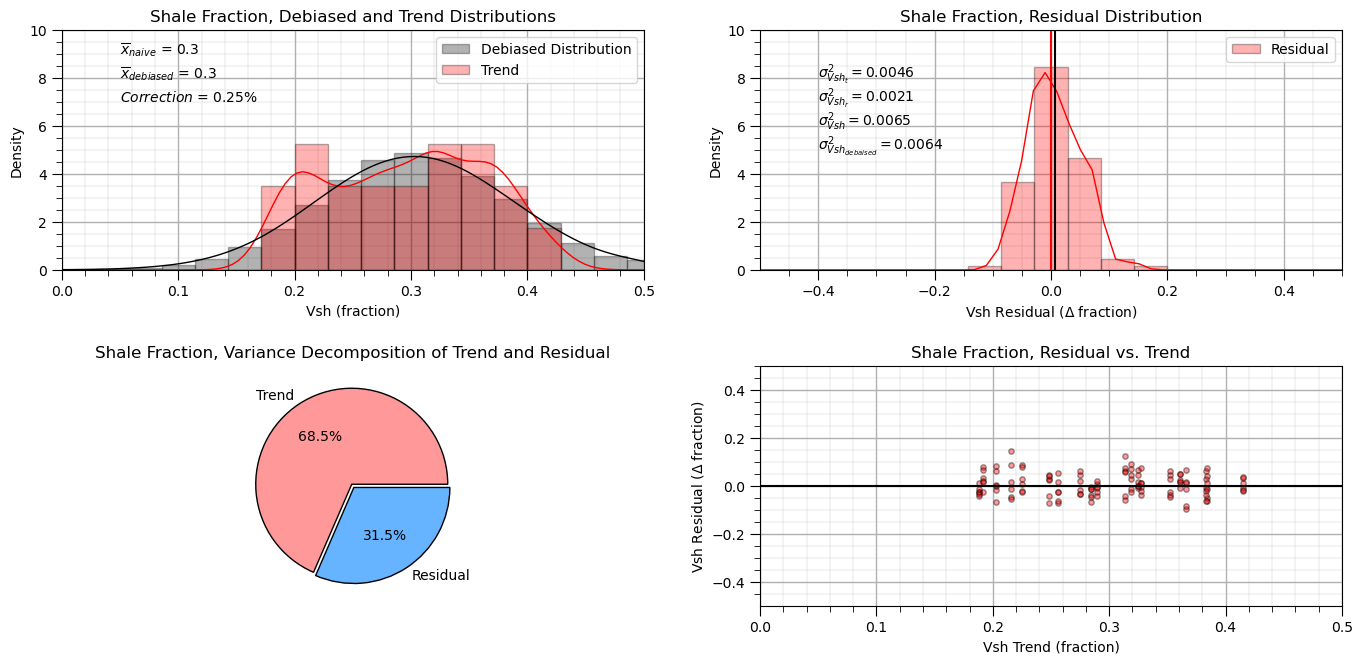

In [23]:
plt.subplot(221)
plt.hist(Vsh_sample,density = True,color='black',alpha=0.3,edgecolor='black',
             bins=np.linspace(0.0,1.0,36),label='Debiased Distribution')

plt.hist(Vsh_combined_trend.flatten(),density = True,color='red',alpha=0.3,edgecolor='black',
             bins=np.linspace(0.0,1.0,36),label='Trend')

kde = st.gaussian_kde(Vsh_combined_trend.flatten(),bw_method=0.3)
plt.plot(np.linspace(Vshmin,Vshmax,100),kde(np.linspace(Vshmin,Vshmax,100)),c='red',lw=1)

kde = st.gaussian_kde(Vsh_sample,bw_method=0.3)
plt.plot(np.linspace(Vshmin,Vshmax,100),kde(np.linspace(Vshmin,Vshmax,100)),c='black',lw=1)

plt.xlim([Vshmin,Vshmax]); plt.ylim([0,10]); plt.legend(loc='upper right'); add_grid2()
plt.ylabel('Density')

debias_Vsh_exp = np.average(Vsh_sample) 
debias_correction = (np.average(Vsh_sample) - np.average(df_well['Vsh'].values))/np.average(Vsh_sample)*100
plt.annotate(r'$\overline{x}_{naive}$ = ' + str(np.round(np.average(df_well['Vsh'].values),2)),(0.05,9))
plt.annotate(r'$\overline{x}_{debiased}$ = ' + str(np.round(np.average(Vsh_sample),2)),(0.05,8.0))
plt.annotate(r'$Correction$ = ' + str(np.round(debias_correction,2)) + str('%'),(0.05,7.0))

Vsh_total_var = np.var(df_well['Vsh'].values)
Vsh_trend_var = np.var(Vsh_trend_well['Vsh_Trend'].values)
Vsh_residual_var = np.var(Vsh_trend_well['Vsh_Residual'].values)

ptrend = Vsh_trend_var/(Vsh_trend_var+Vsh_residual_var)
presidual = Vsh_residual_var/(Vsh_trend_var+Vsh_residual_var)

plt.xlabel('Vsh (fraction)'); plt.title('Shale Fraction, Debiased and Trend Distributions')

plt.subplot(222)
plt.hist(Vsh_trend_well['Vsh_Residual'].values,density = True,color='red',alpha=0.3,edgecolor='black',
             bins=np.linspace(-1,1,36),label='Residual')

kde = st.gaussian_kde(Vsh_trend_well['Vsh_Residual'].values,bw_method=0.3)
plt.plot(np.linspace(-1,1,100),kde(np.linspace(-1,1,100)),c='red',lw=1)

plt.xlim([-0.5,0.5]); plt.ylim([0,10]); plt.legend(loc='upper right'); add_grid2()
plt.ylabel('Density')

plt.annotate(r'$\overline{x}_{naive}$ = ' + str(np.round(np.average(Vsh_trend_well['Vsh_Residual'].values),2)),(0.2,20.0))
plt.vlines(0,0,25,color='red')
plt.vlines(np.average(Vsh_trend_well['Vsh_Residual'].values),0,25,color='black')
plt.annotate(r'$\sigma_{Vsh_t}^2 = $' + str(np.round(np.var(Vsh_combined_trend.flatten()),4)),(-0.4,8))
plt.annotate(r'$\sigma_{Vsh_r}^2 = $' + str(np.round(np.var(Vsh_trend_well['Vsh_Residual'].values),4)),(-0.4,7))
plt.annotate(r'$\sigma_{Vsh}^2 = $' + str(np.round(np.var(Vsh_trend_well['Vsh'].values),4)),(-0.4,6))
plt.annotate(r'$\sigma_{Vsh_{debaised}}^2 = $' + str(np.round(np.var(Vsh_sample),4)),(-0.4,5))

plt.xlabel(r'Vsh Residual ($\Delta$ fraction)'); plt.title('Shale Fraction, Residual Distribution')

plt.subplot(223)                                      # results from the coin tosses 
plt.pie([ptrend, presidual],labels = ['Trend','Residual'],radius = 1, autopct='%1.1f%%', colors = ['#ff9999','#66b3ff'], explode = [.02,.02], wedgeprops = {"edgecolor":"k",'linewidth': 1}  )
plt.title('Shale Fraction, Variance Decomposition of Trend and Residual')

plt.subplot(224)
plt.scatter(Vsh_trend_well['Vsh_Trend'],Vsh_trend_well['Vsh_Residual'],color='red',edgecolor='black',s=15,alpha=0.4)
plt.plot([Vshmin,Vshmax],[0,0],color='black')
add_grid2()
plt.xlim([Vshmin,Vshmax]); plt.ylim([-0.5,0.5])
plt.xlabel('Vsh Trend (fraction)'); plt.ylabel(r'Vsh Residual ($\Delta$ fraction)'); plt.title('Shale Fraction, Residual vs. Trend')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.4); plt.show()

#### Check Trend Model at a Well

Visual Vsh trend model at well data locations to check for issues

* plots of Vsh at wells with trend painted from grid

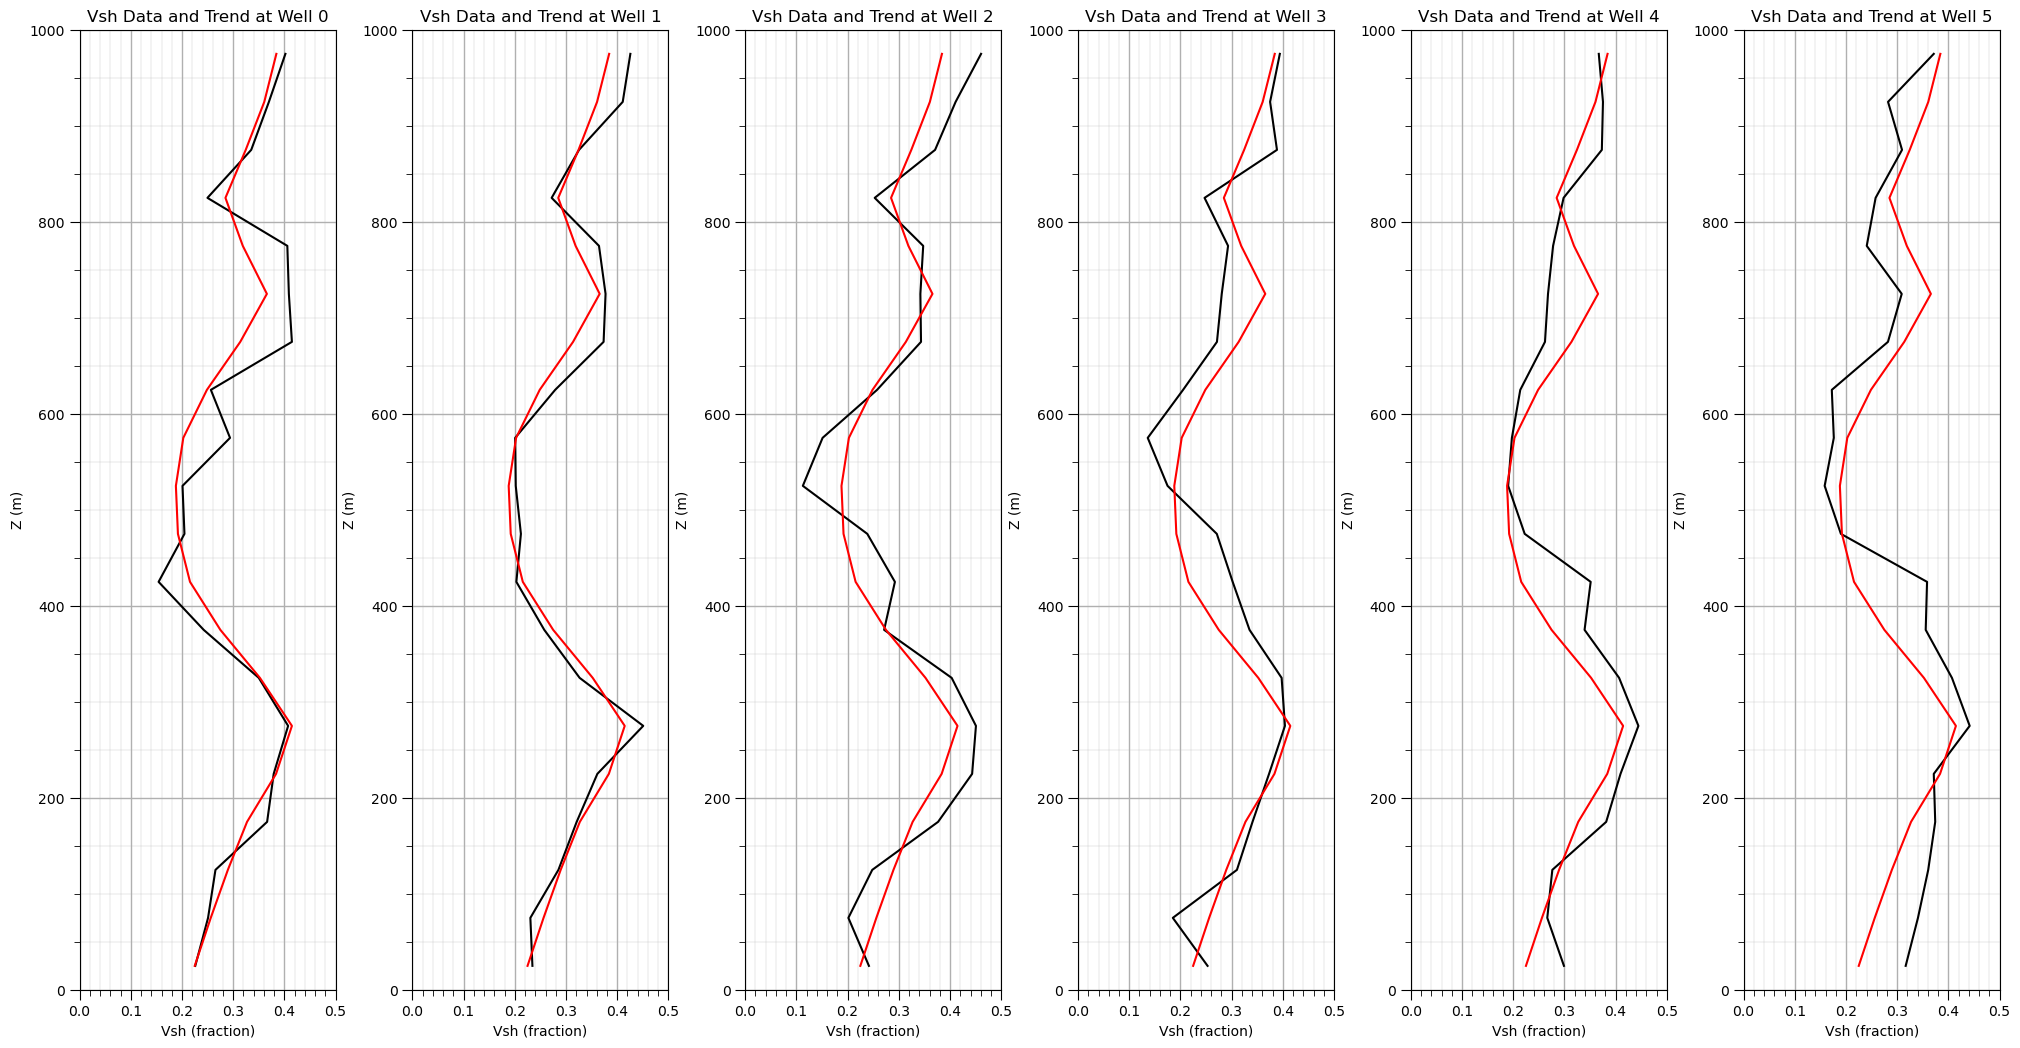

In [24]:
plt.subplot(324)
im = plt.imshow(Por_truth[:,10,:].T,interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Pormin, vmax = Pormax,
                cmap = cmap,aspect=3)
plt.title('Porosity, ix = 10'); plt.xlabel('X (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Pormin, Pormax, 6))

for iwell in range(0,len(wellsy)):
    plt.subplot(1,len(wellsy),iwell+1)
    ix = geostats.getindex(nx,xmn,xsiz,wellsx[iwell])
    iy = geostats.getindex(ny,ymn,ysiz,wellsy[iwell])
    
    plt.plot(Vsh_truth[:,ny-iy-1,ix],np.arange(nz*zsiz-0.5*zsiz,zmin,-zsiz),color='black',label = 'Well')
    plt.plot(Vsh_combined_trend[:,ny-iy-1,ix],np.arange(nz*zsiz-0.5*zsiz,zmin,-zsiz),color='red',label='Trend')
    plt.xlim([Vshmin,Vshmax]); plt.ylim([zmin,zmax]) 
    add_grid2(); plt.title('Vsh Data and Trend at Well ' + str(iwell)); plt.xlabel('Vsh (fraction)'); plt.ylabel('Z (m)')

plt.subplots_adjust(left=0.0, bottom=0.0, right=len(wellsy)*0.5, top=2.0, wspace=0.3, hspace=0.5); plt.show()

#### Prior Model the Vsh from Well Data Only

Prior model based on well data only with trend + residual kriging workflow.

* now model the residual

#### Variogram of Residual

 x,y,z offsets = 0.0,200.0,0.0
 x,y,z offsets = 0.0,1.794896514920806e-08,-10.0
 x,y,z offsets = 0.0,200.0,0.0
 x,y,z offsets = 0.0,1.794896514920806e-08,-10.0


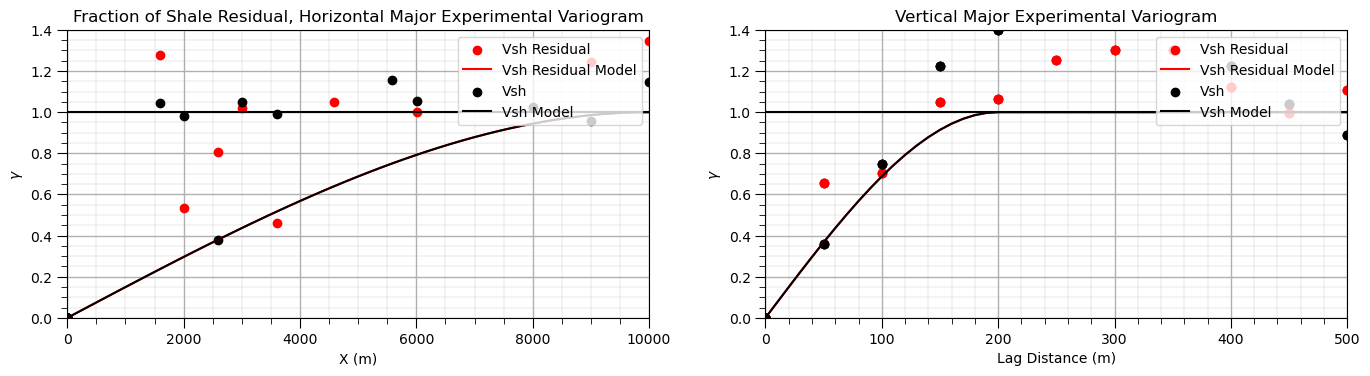

In [25]:
varmin = 0.0; varmax = 1.2
#vmap, npmap = geostats.varmapv(Vsh_trend_well,'X','Z','Vsh_Residual',tmin=-999,tmax=999,nxlag=22,nylag=22,dxlag=10,dylag=10,minnp=1,isill=1)

# Calculate Sample Data Isotropic Variograms
tmin = -9999.; tmax = 9999.; 
lag_dist_maj = 200.0; lag_tol_maj = 20.0; azi_maj = 90.0;
lag_dist_vert = 10.0; lag_tol_vert = 10.0; azi_vert = 0.0;
nlag = 100; bandh = 9999.9; azi_maj = 90.0; atol = 22.50; dtol = 22.50; isill = 1

# lag_vert, Vsh_residual_vert_gamma, Vsh_residual_vert_npair = geostats.gamv_3D(Vsh_trend_well,"x","y","z","Vsh_Residual",
#     tmin,tmax,lag_dist_vert,lag_tol_vert,nlag,0.0,-90.0,atol,dtol,bandh,isill)

lag_residual_vert, Vsh_residual_vert_gamma, Vsh_residual_vert_npair = GSLIB.gamv_3d(Vsh_trend_well,"x","y","z","Vsh_Residual", 
    nlag, lag_dist_vert,lag_tol_vert, azi=0.0, atol=22.5, bandh=bandh, dip=-90.0, dtol=dtol, bandv=99999.9, isill=isill)

lag_vert, Vsh_vert_gamma, Vsh_vert_npair = GSLIB.gamv_3d(Vsh_trend_well,"x","y","z","Vsh", 
    nlag, lag_dist_vert,lag_tol_vert, azi=0.0, atol=22.5, bandh=bandh, dip=-90.0, dtol=dtol, bandv=99999.9, isill=isill)

lag_residual_maj, Vsh_residual_maj_gamma, Vsh_residual_maj_npair = GSLIB.gamv_3d(Vsh_trend_well,"x","y","z","Vsh_Residual", 
    nlag, lag_dist_maj,lag_tol_maj, azi=0.0, atol=90.0, bandh=bandh, dip=0.0, dtol=dtol, bandv=99999.9, isill=isill)

lag_maj, Vsh_maj_gamma, Vsh_maj_npair = GSLIB.gamv_3d(Vsh_trend_well,"x","y","z","Vsh", 
    nlag, lag_dist_maj,lag_tol_maj, azi=0.0, atol=90.0, bandh=bandh, dip=0.0, dtol=dtol, bandv=99999.9, isill=isill)

# set the variogram models
nug_residual = 0.0; nst_residual = 1                                             # 2 nest structure variogram model parameters
it1_residual = 1; cc1_residual = 1.0; azi_maj_residual = 0.0; hmaj1_residual = 10000 
hmin1_residual = 10000; hvert1_residual = 200

nug = 0.0; nst = 1                                             # 2 nest structure variogram model parameters
it1 = 1; cc1 = 1.0; azi_maj = 0.0; hmaj1 = 10000.0; hmin1 = 10000.0; hvert1 = 200

vario_Vsh_residual = geostats.make_variogram3D(nug_residual,nst_residual,it1_residual,cc1_residual,azi_maj_residual,0.0,
        hmaj1_residual,hmin1_residual,hvert1_residual) # make model object

vario_Vsh = geostats.make_variogram3D(nug,nst,it1,cc1_residual,azi_maj,0.0,hmaj1,hmin1,hvert1) # make model object

# display the variogram models
nlag = 100; azm_maj_residual = 90.0;                    # project the model in the 045 azimuth
index_maj_residual,h_maj_residual,gam_maj_residual,cov_maj_residual,ro_maj_residual = geostats.vmodel_3D(
    nlag,lag_dist_maj,azi_maj_residual,0.0,vario_Vsh_residual)

nlag = 100; azm_maj_residual = 90.0;                    # project the model in the 045 azimuth
index_vert_residual,h_vert_residual,gam_vert_residual,cov_vert_residual,ro_vert_residual = geostats.vmodel_3D(
    nlag,lag_dist_vert,0.0,-90.0,vario_Vsh_residual)

# vmodel for display
nlag = 100; azm_maj = 90.0;                    # project the model in the 045 azimuth
index_maj,h_maj,gam_maj,cov_maj,ro_maj = geostats.vmodel_3D(nlag,lag_dist_maj,azi_maj,0.0,vario_Vsh)

nlag = 100; azm_maj = 90.0;                    # project the model in the 045 azimuth
index_vert,h_vert,gam_vert,cov_vert,ro_vert = geostats.vmodel_3D(nlag,lag_dist_vert,0.0,-90.0,vario_Vsh)

plt.subplot(121)
plt.scatter(lag_maj,Vsh_residual_maj_gamma,color='red',label='Vsh Residual')
plt.plot(h_maj_residual,gam_maj_residual,color = 'red',label = 'Vsh Residual Model')
plt.scatter(lag_maj,Vsh_maj_gamma,color='black',label='Vsh')
plt.plot(h_maj,gam_maj,color = 'black',label = 'Vsh Model')
plt.plot([0,10000],[1.0,1.0],color='black'); plt.title('Fraction of Shale Residual, Horizontal Major Experimental Variogram')
plt.xlim([0,10000]); plt.ylim([0.0,1.4]); plt.legend(loc='upper right'); plt.xlabel('X (m)'); plt.ylabel(r'$\gamma$')
add_grid2()

plt.subplot(122)
plt.scatter(lag_vert,Vsh_residual_vert_gamma,color='red',label='Vsh Residual')
plt.plot(h_vert_residual,gam_vert_residual,color = 'red',label = 'Vsh Residual Model')
plt.scatter(lag_vert,Vsh_vert_gamma,color='black',label='Vsh')
plt.plot(h_vert,gam_vert,color = 'black',label = 'Vsh Model')
plt.plot([0,500],[1.0,1.0],color='black'); plt.title('Vertical Major Experimental Variogram')
plt.xlim([0,500]); plt.ylim([0.0,1.4]); plt.legend(loc='upper right')
add_grid2(); plt.xlabel('Lag Distance (m)'); plt.ylabel(r'$\gamma$')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2., top=0.6, wspace=0.2, hspace=0.2); plt.show()

#### Spatial Bootstrap Uncertainty in the Mean

Apply the Journelian method, resampling from unconditional stochastic realizations with the data configuration.

In [26]:
# S = 10; L = 100                         # number of unconditional realizations, number of random samples from each
# run = True

# Vsh_ref = GSLIB.affine(df_well['Vsh'],debias_Vsh_exp,debias_Vsh_stdev)

# df_ref = pd.DataFrame(np.vstack([np.random.normal(-99999,100,len(Vsh_ref)),np.random.normal(-99999,100,len(Vsh_ref)),Vsh_ref]).T,columns=['X','Y','Vsh'])

# if run == True:
#     sim_Vsh_real = geostats.sgsim(df_ref,'X','Y','Vsh',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
#                 twtcol=0,zmin=Vshmin,zmax=Vshmax,ltail=1,ltpar=Vshmin,utail=1,utpar=Vshmax,nsim=S,
#                 nx=nx,xmn=xmn,xsiz=xsiz,ny=nz,ymn=zmn,ysiz=zsiz,seed=seed+1,
#                 ndmin=0,ndmax=20,nodmax=10,mults=0,nmult=2,noct=-1,ktype=0,colocorr=0.0,sec_map=None,vario=vario)

# np.random.seed(seed=seed)
# wells_ix = np.round(((wells - xmn) / xsiz),0)
# Vsh_spatial_boot_mean_sample = np.zeros(S*L)
# max_shift = nx - np.max(wells_ix)
# min_shift = -1*np.min(wells_ix)
# index = 0
# for l in range(0,L):
#     wells_ix_copy = np.copy(wells_ix)
#     shift_ix = np.random.randint(low = min_shift,high=max_shift,size = 1)
#     wells_ix_copy = wells_ix_copy + shift_ix
#     well_liz = np.tile(np.arange(nz).reshape(nz, 1), (1, len(wells))).flatten(order='F')
#     well_lix = np.array(np.repeat(wells_ix_copy,nz),dtype = np.int32) 
#     for s in range(0,S):
#         Vsh_spatial_boot_mean_sample[index] = np.average(sim_Vsh_real[s,well_liz,well_lix])
#         index = index + 1
# Vsh_spatial_boot_sample_exp = np.average(Vsh_spatial_boot_mean_sample)
# Vsh_spatial_boot_sample_P10 = np.percentile(Vsh_spatial_boot_mean_sample,10)
# Vsh_spatial_boot_sample_P90 = np.percentile(Vsh_spatial_boot_mean_sample,90)
# Vsh_spatial_boot_sample_var = np.var(Vsh_spatial_boot_mean_sample)
# Vsh_spatial_boot_sample_stdev = np.sqrt(Vsh_spatial_boot_sample_var)

# n_eff = int(debias_Vsh_var/Vsh_spatial_boot_sample_var)
# print('n effective: ' + str(n_eff) + ' of ' + str(len(df_well)) + ' well data.')

# plt.subplot(111)
# GSLIB.hist_st(Vsh_spatial_boot_mean_sample,Vshmin,Vshmax,0,0,40,None,'Mean Vsh (fraction)','Shale Fraction, Spatial Bootstrap Uncertainty in the Mean')
# plt.annotate(r'$E\{\overline{V_{sh}}\} = $' + str(np.round(Vsh_spatial_boot_sample_exp,2)),(0.38,400))
# plt.annotate(r'$P10_{V_{sh}} = $' + str(np.round(Vsh_spatial_boot_sample_P10,2)),(0.38,370))
# plt.annotate(r'$P90_{V_{sh}} = $' + str(np.round(Vsh_spatial_boot_sample_P90,2)),(0.38,340))
# add_grid2()

n_eff = len(df_well)

#### Vsh Prior Model

Kriging of Vsh residual

* calculate local kriging estimate and kriging variance to inform the local prior models

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:06<00:00,  2.95it/s]


  Estimated   19840 blocks 
      average   0.0034993403927028256  variance  0.0005381848536861897


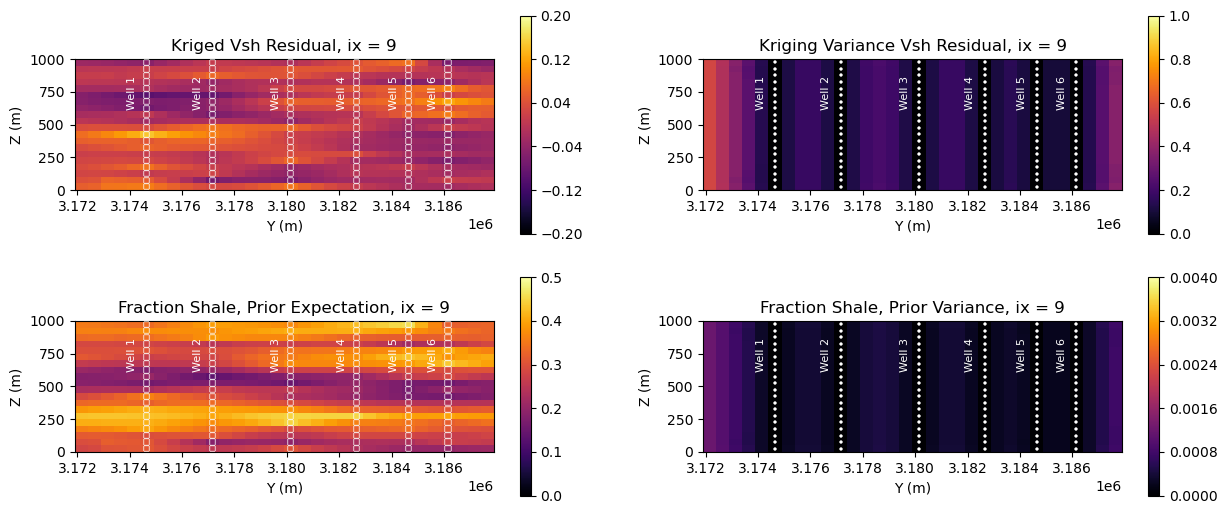

In [27]:
run = True

if run:
    kVsh_residual, vVsh_residual = geostats.kb3d(Vsh_trend_well,'x','y','z','Vsh_Residual',tmin=-9999,tmax=9999,
        nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,nz=nz,zmn=zmn,zsiz=zsiz,                                
        nxdis=1,nydis=1,nzdis=1,ndmin=0,ndmax=10,radius_hori=5000,radius_vert=500,ktype=0,skmean=0.0,vario3D=vario_Vsh_residual)

Vsh_prior_mean = Vsh_combined_trend + kVsh_residual
 
Vsh_prior_var = vVsh_residual * Vsh_residual_var # update with debiased residual variance
    
plt.subplot(221) 
im = plt.imshow(kVsh_residual[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = -0.2, vmax = 0.2,
                 cmap = cmap,aspect=5)
plt.title('Kriged Vsh Residual, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(-0.2, 0.2, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=Vsh_trend_well['Vsh_Residual'],s=15,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=-0.2,vmax=0.2,cmap=plt.cm.inferno)

plt.subplot(222) 
im = plt.imshow(vVsh_residual[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = 0.0, vmax = 1.0,
                 cmap = cmap,aspect=5)
plt.title('Kriging Variance Vsh Residual, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0, 1.0, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c='white',s=1,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=-0.2,vmax=0.2,cmap=plt.cm.inferno)

plt.subplot(223) 
im = plt.imshow(Vsh_prior_mean[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Vshmin, vmax = Vshmax,
                 cmap = cmap,aspect=5)
plt.title('Fraction Shale, Prior Expectation, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Vshmin, Vshmax, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=Vsh_trend_well['Vsh'],s=15,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=Vshmin,vmax=Vshmax,cmap=plt.cm.inferno)
        
plt.subplot(224) 
im = plt.imshow(Vsh_prior_var[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = 0.0, vmax = 0.004,
                 cmap = cmap,aspect=5)
plt.title('Fraction Shale, Prior Variance, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0, 0.004, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c='white',s=1,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=-0.2,vmax=0.2,cmap=plt.cm.inferno)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Check Residual Plan View

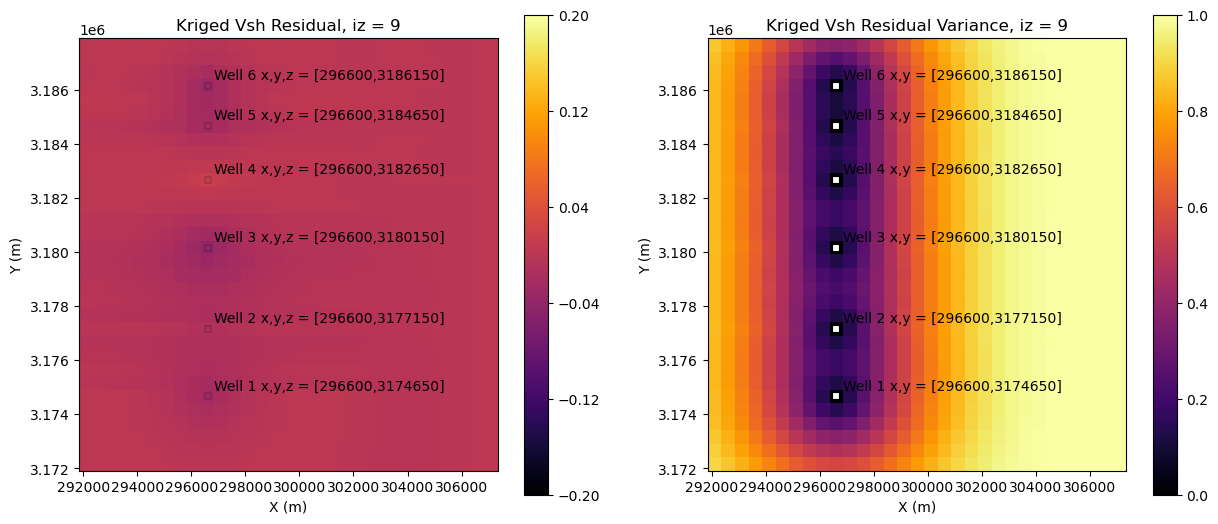

In [28]:
plt.subplot(121)
im = plt.imshow(kVsh_residual[9,:,:],interpolation = None,extent = [xmin,xmax,ymin,ymax], vmin = -0.2, vmax = 0.2,
                cmap = cmap,aspect=1)
plt.title('Kriged Vsh Residual, iz = 9'); plt.xlabel('X (m)');plt.ylabel('Y (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(-0.2, 0.2, 6))

for iwell in range(0,len(wellsy)):
    ix = geostats.getindex(nx,xmn,xsiz,wellsx[iwell])
    iy = geostats.getindex(ny,ymn,ysiz,wellsy[iwell])
    plt.annotate('Well ' + str(iwell+1) + ' x,y,z = [' + str(int(wellsx[iwell])) + ',' + str(int(wellsy[iwell])) + ']',[wellsx[iwell]+250,wellsy[iwell]+250],size=10,color='black',rotation=0.0)
    plt.scatter(wellsx[iwell],wellsy[iwell],c=Vsh_truth_residual[9,iy,ix],edgecolor='black',s=15,lw=0.2,
       marker='s',zorder=20,vmin=-0.2,vmax=0.2,cmap=plt.cm.inferno)  
    
plt.subplot(122)
im = plt.imshow(vVsh_residual[9,:,:],interpolation = None,extent = [xmin,xmax,ymin,ymax], vmin = 0.0, vmax = 1.0,
                cmap = cmap,aspect=1)
plt.title('Kriged Vsh Residual Variance, iz = 9'); plt.xlabel('X (m)');plt.ylabel('Y (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0.0, 1.0, 6))

for iwell in range(0,len(wellsy)):
    ix = geostats.getindex(nx,xmn,xsiz,wellsx[iwell])
    iy = geostats.getindex(ny,ymn,ysiz,wellsy[iwell])
    plt.annotate('Well ' + str(iwell+1) + ' x,y = [' + str(int(wellsx[iwell])) + ',' + str(int(wellsy[iwell])) + ']',[wellsx[iwell]+250,wellsy[iwell]+250],size=10,color='black',rotation=0.0)
    plt.scatter(wellsx[iwell],wellsy[iwell],c='white',edgecolor='black',s=15,lw=0.1,
       marker='s',zorder=20,vmin=-0.2,vmax=0.2,cmap=plt.cm.inferno) 

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Calculate the P25 and P75 Local Percentile Models

* transform prior to Gaussian Using the global transformation table
* this will preserve the declustering correction
* we use local IQR to transform the standard deviation 

\begin{equation}
\sigma = \frac{IQR}{1.35}
\end{equation}

#### Check the Uncertainty Model

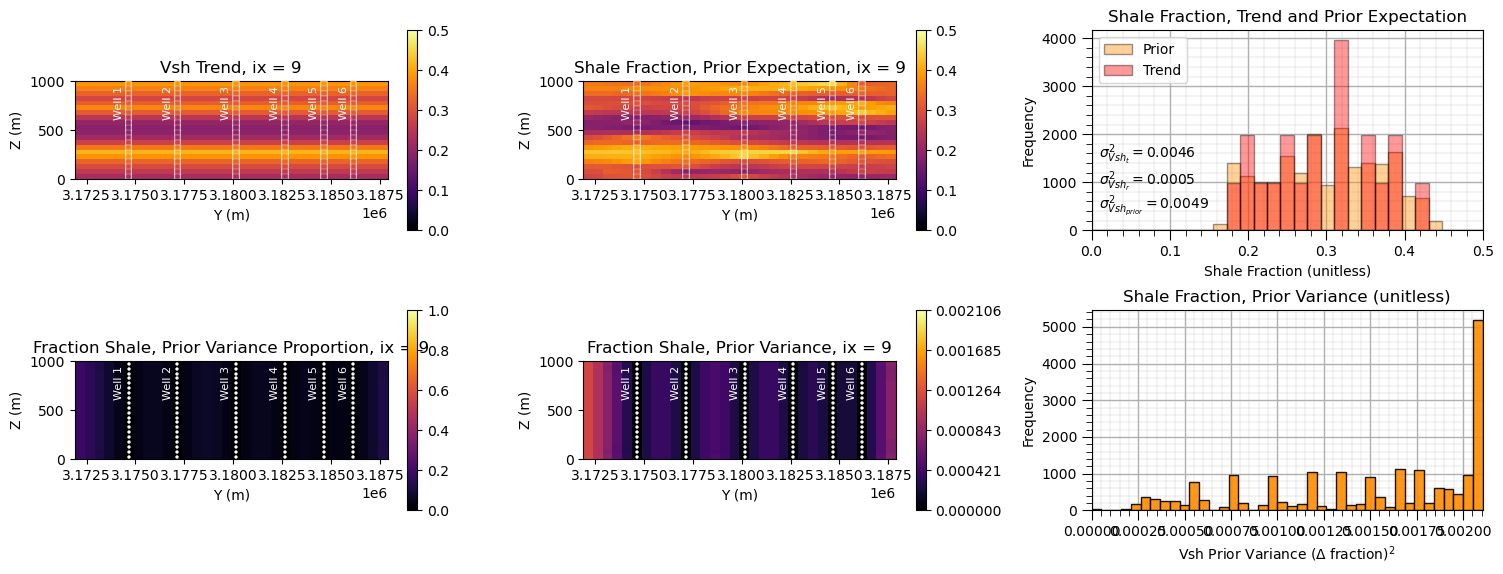

In [29]:
plt.subplot(231)
im = plt.imshow(Vsh_combined_trend[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Vshmin, vmax = Vshmax,
                 cmap = cmap,aspect=5)
plt.title('Vsh Trend, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Vshmin, Vshmax, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=Vsh_trend_well['Vsh_Trend'],s=15,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=Vshmin,vmax=Vshmax,cmap=plt.cm.inferno)

plt.subplot(232)   
im = plt.imshow(Vsh_prior_mean[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Vshmin, vmax = Vshmax,
                 cmap = cmap,aspect=5)
plt.title('Shale Fraction, Prior Expectation, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Vshmin, Vshmax, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=Vsh_trend_well['Vsh'],s=15,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=Vshmin,vmax=Vshmax,cmap=plt.cm.inferno)

plt.subplot(233)
plt.hist(Vsh_prior_mean.flatten(),color='darkorange',edgecolor='black',alpha=0.4,bins = np.linspace(Vshmin,Vshmax,30),label = 'Prior')
plt.hist(Vsh_combined_trend.flatten(),color='red',edgecolor='black',alpha=0.4,bins = np.linspace(Vshmin,Vshmax,30),label = 'Trend')
plt.xlabel('Shale Fraction (unitless)'); plt.ylabel('Frequency'); plt.title('Shale Fraction, Trend and Prior Expectation')
plt.legend(loc='upper left')
plt.annotate(r'$\sigma_{Vsh_t}^2 = $' + str(np.round(np.var(Vsh_combined_trend.flatten()),4)),(0.01,1500))
plt.annotate(r'$\sigma_{Vsh_r}^2 = $' + str(np.round(np.var(kVsh_residual.flatten()),4)),(0.01,930))
plt.annotate(r'$\sigma_{Vsh_{prior}}^2 = $' + str(np.round(np.var(Vsh_prior_mean.flatten()),4)),(0.01,460))
plt.xlim([Vshmin,Vshmax])
add_grid2()

plt.subplot(234)
im = plt.imshow(np.divide(Vsh_prior_var,np.full((nz,ny,nx),debias_Vsh_var))[:,::-1,9],
    interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = 0.0, vmax = 1.0,cmap = cmap,aspect=5)
plt.title('Fraction Shale, Prior Variance Proportion, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0.0, 1.0, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c='white',s=1,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=Vshmin,vmax=Vshmax,cmap=plt.cm.inferno)

plt.subplot(235)
im = plt.imshow(Vsh_prior_var[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = 0.0, vmax = Vsh_residual_var,
    cmap = cmap,aspect=5)
plt.title('Fraction Shale, Prior Variance, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0.0, Vsh_residual_var, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c='white',s=1,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=Vshmin,vmax=Vshmax,cmap=plt.cm.inferno) 
    
plt.subplot(236)
GSLIB.hist_st(Vsh_prior_var.flatten(),0,Vsh_residual_var,0,0,40,None,'Vsh Prior Variance ($\Delta$ fraction)$^2$','Shale Fraction, Prior Variance (unitless)')
add_grid2()
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.0, wspace=0.3, hspace=0.4); plt.show()

#### Transform Model to Gaussian

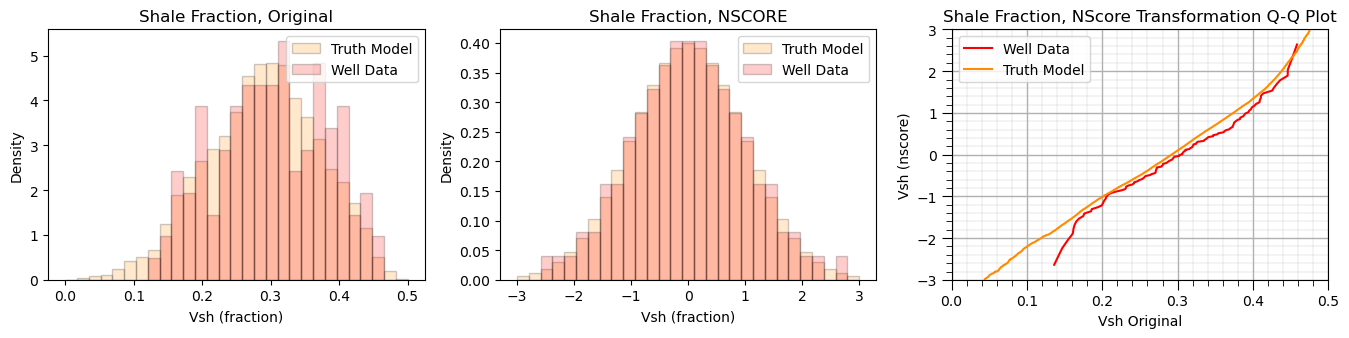

In [30]:
### NSCORE Transform all features
nRAI_truth = np.reshape(geostats.nscore(pd.DataFrame(RAI_truth.flatten().T,columns=['RAI']),'RAI')[0],(nz,ny,nx))
nEnv_truth = np.reshape(geostats.nscore(pd.DataFrame(Env_truth.flatten().T,columns=['Env']),'Env')[0],(nz,ny,nx))

df_well['nVsh'],nVsh_transform_table_orig_well,nVsh_transform_table_norm_well = geostats.nscore(df_well,'Vsh')

nVsh_truth,nVsh_transform_table_orig_truth,nVsh_transform_table_norm_truth = geostats.nscore(pd.DataFrame(Vsh_truth.flatten().T,columns=['Vsh']),'Vsh')
nVsh_truth = np.reshape(nVsh_truth,(nz,ny,nx)) 
_,nVsh_transform_table_orig_debias,nVsh_transform_table_norm_debias = geostats.nscore(
    pd.DataFrame(Vsh_sample,columns=['Vsh']),'Vsh') # used debiased reference distribuito

nRAI_truth = nRAI_truth.clip(min = -4.0,max = 4.0)
nEnv_truth = nEnv_truth.clip(min = -4.0,max = 4.0)
nVsh_truth = nVsh_truth.clip(min = -4.0,max = 4.0)

well_nRAI = np.zeros(len(wellsx)*nz)
well_nEnv = np.zeros(len(wellsx)*nz)

for iwell in range(0,len(wellsx)):
    ix = geostats.getindex(nx,xmn,xsiz,wellsx[iwell])
    iy = geostats.getindex(ny,ymn,ysiz,wellsy[iwell])
    well_nRAI[nz*iwell:nz*(iwell+1)] = nRAI_truth[:,iy,ix]
    well_nEnv[nz*iwell:nz*(iwell+1)] = nEnv_truth[:,iy,ix]

df_well['nRAI'] = well_nRAI; df_well['nEnv'] = well_nEnv; 
    
plt.subplot(231)
plt.hist(Vsh_truth.flatten(),color='darkorange',edgecolor='black',density=True,alpha=0.2,bins=np.linspace(Vshmin,Vshmax,30),label='Truth Model')
plt.hist(df_well['Vsh'],color='red',edgecolor='black',alpha=0.2,density=True,bins=np.linspace(Vshmin,Vshmax,30),label='Well Data')
plt.xlabel('Vsh (fraction)'); plt.ylabel('Density'); plt.title('Shale Fraction, Original'); plt.legend(loc='upper right')

plt.subplot(232)
plt.hist(nVsh_truth.flatten(),color='darkorange',edgecolor='black',density=True,alpha=0.2,bins=np.linspace(nVshmin,nVshmax,30),label='Truth Model')
plt.hist(df_well['nVsh'],color='red',edgecolor='black',alpha=0.2,density=True,bins=np.linspace(nVshmin,nVshmax,30),label='Well Data')
plt.xlabel('Vsh (fraction)'); plt.ylabel('Density'); plt.title('Shale Fraction, NSCORE'); plt.legend(loc='upper right')

plt.subplot(233)
plt.plot(nVsh_transform_table_orig_well,nVsh_transform_table_norm_well,c='red',label='Well Data')
plt.plot(nVsh_transform_table_orig_truth,nVsh_transform_table_norm_truth,c='darkorange',label='Truth Model')
plt.ylabel('Vsh (nscore)'); plt.xlabel('Vsh Original'); plt.title('Shale Fraction, NScore Transformation Q-Q Plot')
plt.xlim([Vshmin,Vshmax]); plt.ylim([nVshmin,nVshmax]); add_grid2()
plt.legend(loc='upper left')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3); plt.show()

#### Transform Model Quartiles to Gaussian

We do this to calculate the associated standard deviation and variance in Gaussian space.

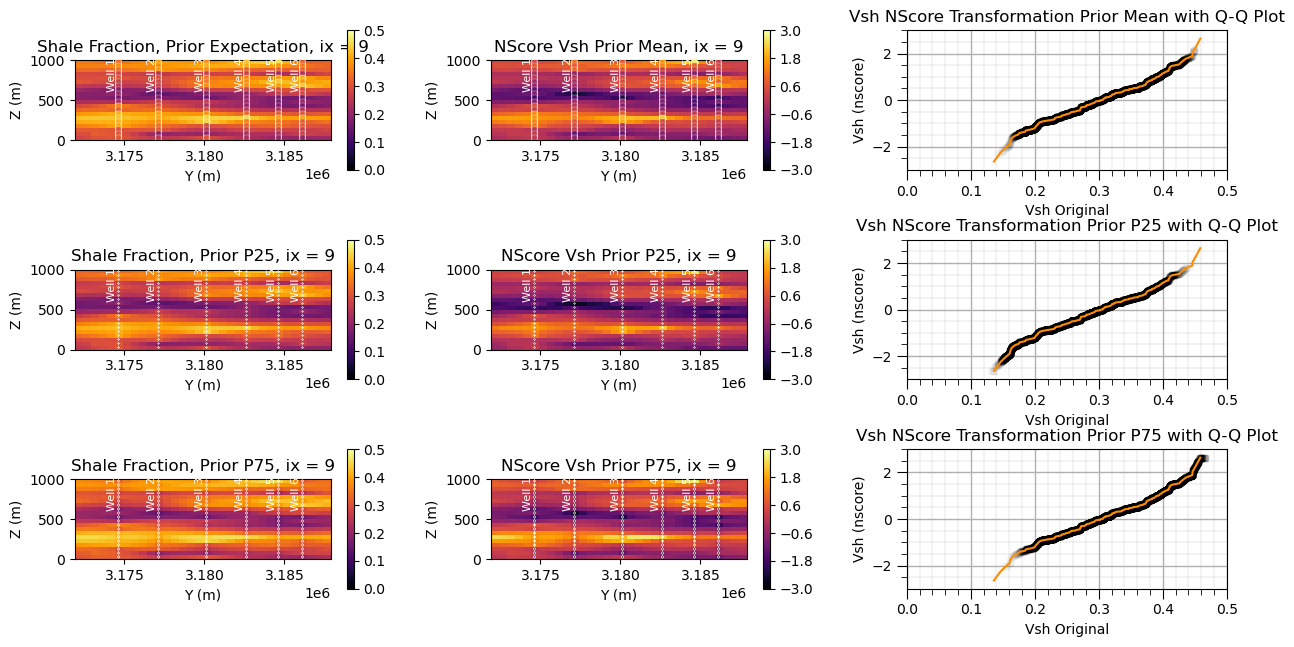

In [31]:
# Transform 
Vsh_prior_stdev = np.sqrt(Vsh_prior_var.clip(min = 0.00000000000001)) # truncate unreasonable values

Vsh_prior_P25 = norm.ppf(np.full((nz,ny,nx),0.25),Vsh_prior_mean,Vsh_prior_stdev)
Vsh_prior_P75 = norm.ppf(np.full((nz,ny,nx),0.75),Vsh_prior_mean,Vsh_prior_stdev)

nVsh_prior_mean = np.reshape(geostats.backtr(pd.DataFrame(Vsh_prior_mean.flatten().T,columns=['Vsh_mean']),'Vsh_mean',
    nVsh_transform_table_norm_well,nVsh_transform_table_orig_well,Vshmin,Vshmax,1,Vshmin,1,Vshmax),(nz,ny,nx)) # NSCORE with global Q-Q

nVsh_prior_P25 = np.reshape(geostats.backtr(pd.DataFrame(Vsh_prior_P25.flatten().T,columns=['Vsh_P25']),'Vsh_P25',
    nVsh_transform_table_norm_well,nVsh_transform_table_orig_well,Vshmin,Vshmax,1,Vshmin,1,Vshmax),(nz,ny,nx)) 

nVsh_prior_P75 = np.reshape(geostats.backtr(pd.DataFrame(Vsh_prior_P75.flatten().T,columns=['Vsh_P75']),'Vsh_P75',
    nVsh_transform_table_norm_well,nVsh_transform_table_orig_well,Vshmin,Vshmax,1,Vshmin,1,Vshmax),(nz,ny,nx)) 

plt.subplot(431)  
im = plt.imshow(Vsh_prior_mean[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Vshmin, vmax = Vshmax,
                 cmap = cmap,aspect=5)
plt.title('Shale Fraction, Prior Expectation, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Vshmin, Vshmax, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=Vsh_trend_well['Vsh'],s=15,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=Vshmin,vmax=Vshmax,cmap=plt.cm.inferno)

plt.subplot(432)
im = plt.imshow(nVsh_prior_mean[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = -3, vmax = 3,
                 cmap = cmap,aspect=5)
plt.title('NScore Vsh Prior Mean, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(-3, 3, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=Vsh_trend_well['nVsh'],s=15,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=-3,vmax=3,cmap=plt.cm.inferno)

plt.subplot(433)
plt.plot(nVsh_transform_table_orig_well,nVsh_transform_table_norm_well,c='darkorange')
plt.scatter(Vsh_prior_mean,nVsh_prior_mean,marker='s',s=20,alpha=0.01,color='black')
plt.ylabel('Vsh (nscore)'); plt.xlabel('Vsh Original'); plt.title('Vsh NScore Transformation Prior Mean with Q-Q Plot')
plt.xlim([Vshmin,Vshmax]); plt.ylim([nVshmin,nVshmax]); add_grid2()

plt.subplot(434)  
im = plt.imshow(Vsh_prior_P25[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Vshmin, vmax = Vshmax,
                 cmap = cmap,aspect=5)
plt.title('Shale Fraction, Prior P25, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Vshmin, Vshmax, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=Vsh_trend_well['Vsh'],s=1,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=Vshmin,vmax=Vshmax,cmap=plt.cm.inferno)

plt.subplot(435)
im = plt.imshow(nVsh_prior_P25[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = -3, vmax = 3,
                 cmap = cmap,aspect=5)
plt.title('NScore Vsh Prior P25, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(-3, 3, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=Vsh_trend_well['nVsh'],s=1,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=Vshmin,vmax=Vshmax,cmap=plt.cm.inferno)
    
plt.subplot(436)
plt.plot(nVsh_transform_table_orig_well,nVsh_transform_table_norm_well,c='darkorange')
plt.scatter(Vsh_prior_P25,nVsh_prior_P25,marker='s',s=20,alpha=0.01,color='black')
plt.ylabel('Vsh (nscore)'); plt.xlabel('Vsh Original'); plt.title('Vsh NScore Transformation Prior P25 with Q-Q Plot')
plt.xlim([Vshmin,Vshmax]); plt.ylim([nVshmin,nVshmax]); add_grid2()

plt.subplot(437)  
im = plt.imshow(Vsh_prior_P75[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Vshmin, vmax = Vshmax,
                 cmap = cmap,aspect=5)
plt.title('Shale Fraction, Prior P75, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Vshmin, Vshmax, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=Vsh_trend_well['Vsh'],s=1,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=Vshmin,vmax=Vshmax,cmap=plt.cm.inferno)

plt.subplot(438)
im = plt.imshow(nVsh_prior_P75[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = -3, vmax = 3,
                 cmap = cmap,aspect=5)
plt.title('NScore Vsh Prior P75, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(-3, 3, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=Vsh_trend_well['nVsh'],s=1,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=Vshmin,vmax=Vshmax,cmap=plt.cm.inferno)

plt.subplot(439)
plt.plot(nVsh_transform_table_orig_well,nVsh_transform_table_norm_well,c='darkorange')
plt.scatter(Vsh_prior_P75,nVsh_prior_P75,marker='s',s=20,alpha=0.01,color='black')
plt.ylabel('Vsh (nscore)'); plt.xlabel('Vsh Original'); plt.title('Vsh NScore Transformation Prior P75 with Q-Q Plot')
plt.xlim([Vshmin,Vshmax]); plt.ylim([nVshmin,nVshmax]); add_grid2()
  
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=1.6, wspace=0.3, hspace=0.5); plt.show()

#### Check Model at a Specified Location

In [32]:
ix = 20; iy = 10; iz = 10
print('Vsh prior P25: ' + str(Vsh_prior_P25[iz,iy,ix]))
print('Vsh prior P75: ' + str(Vsh_prior_P75[iz,iy,ix]))
print('Vsh prior IQR: ' + str(Vsh_prior_P75[iz,iy,ix]-Vsh_prior_P25[iz,iy,ix]))
print('Vsh prior StDev: ' + str((Vsh_prior_P75[iz,iy,ix]-Vsh_prior_P25[iz,iy,ix])/1.35))

print('NSCORE Vsh prior P25: ' + str(nVsh_prior_P25[iz,iy,ix]))
print('NSCORE Vsh prior P75: ' + str(nVsh_prior_P75[iz,iy,ix]))
print('NSCORE Vsh prior IQR: ' + str(nVsh_prior_P75[iz,iy,ix]-nVsh_prior_P25[iz,iy,ix]))
print('NSCORE Vsh prior StDev: ' + str((nVsh_prior_P75[iz,iy,ix]-nVsh_prior_P25[iz,iy,ix])/1.35))

Vsh prior P25: 0.16538479598182165
Vsh prior P75: 0.2248591457796142
Vsh prior IQR: 0.059474349797792536
Vsh prior StDev: 0.04405507392429076
NSCORE Vsh prior P25: -1.6040305867129807
NSCORE Vsh prior P75: -0.8577449567850849
NSCORE Vsh prior IQR: 0.7462856299278958
NSCORE Vsh prior StDev: 0.5528041703169598


#### Calculate the Standard Deviation in Gaussian Space

We use this relationship for a Gaussian distribution

\begin{equation}
\sigma = \frac{F^{-1}_{N[Vsh]}(0.75) - F^{-1}_{N[Vsh]}(0.25)}{1.35}
\end{equation}

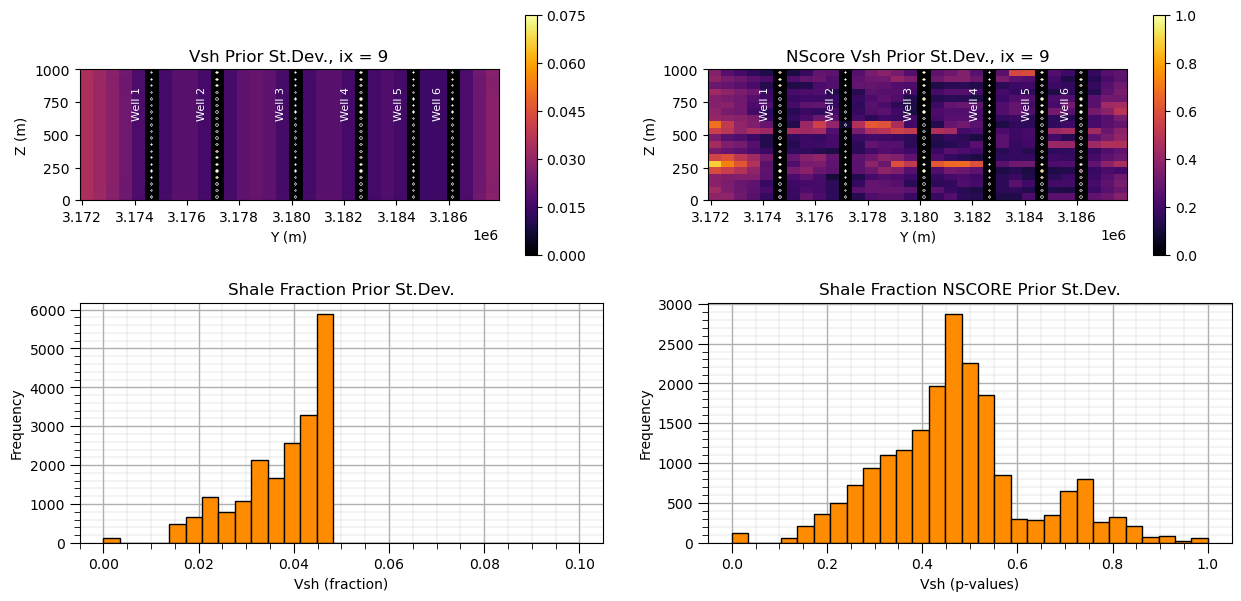

In [33]:
nVsh_prior_stdev = ((nVsh_prior_P75 - nVsh_prior_P25)/np.full((nz,ny,nx),1.35)).clip(max = 1.0)
nVsh_prior_var = np.power(nVsh_prior_stdev,2.0)

plt.subplot(221)
im = plt.imshow(Vsh_prior_stdev[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = 0, vmax = 0.075,
                 cmap = cmap,aspect=5)
plt.title('Vsh Prior St.Dev., ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0, 0.075, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=Vsh_trend_well['nVsh'],s=1,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=Vshmin,vmax=Vshmax,cmap=plt.cm.inferno)

plt.subplot(222)
im = plt.imshow(nVsh_prior_stdev[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = 0.0, vmax = 1.0,
                 cmap = cmap,aspect=5)
plt.title('NScore Vsh Prior St.Dev., ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0.0, 1.0, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=Vsh_trend_well['nVsh'],s=1,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=Vshmin,vmax=Vshmax,cmap=plt.cm.inferno)

plt.subplot(223)
plt.hist(Vsh_prior_stdev.flatten(),color='darkorange',edgecolor='black',bins=np.linspace(0,0.1,30))
plt.xlabel('Vsh (fraction)'); plt.ylabel('Frequency'); plt.title('Shale Fraction Prior St.Dev.')
add_grid2()

plt.subplot(224)
plt.hist(nVsh_prior_stdev.flatten(),color='darkorange',edgecolor='black',bins=np.linspace(0,1.0,30))
plt.xlabel('Vsh (p-values)'); plt.ylabel('Frequency'); plt.title('Shale Fraction NSCORE Prior St.Dev.')
add_grid2()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=1.1, wspace=0.2, hspace=0.2); plt.show()

#### Vsh Prior Mean and Standard Deviation, Original and Gaussian Space

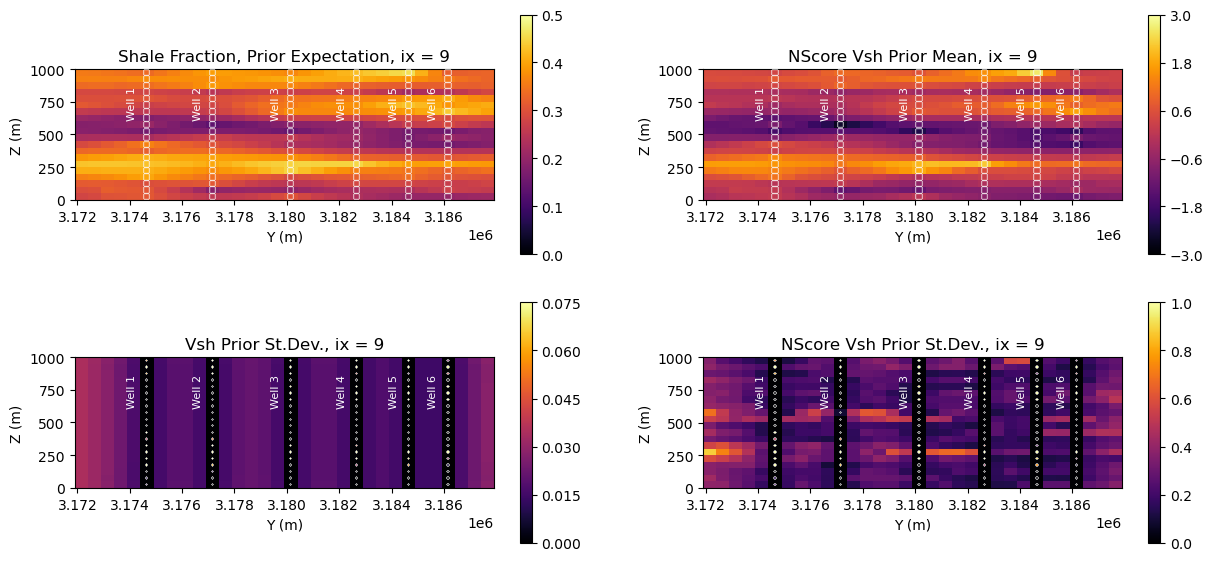

In [34]:
plt.subplot(221)  
im = plt.imshow(Vsh_prior_mean[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Vshmin, vmax = Vshmax,
                 cmap = cmap,aspect=5)
plt.title('Shale Fraction, Prior Expectation, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Vshmin, Vshmax, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=Vsh_trend_well['Vsh'],s=15,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=Vshmin,vmax=Vshmax,cmap=plt.cm.inferno)

plt.subplot(222)
im = plt.imshow(nVsh_prior_mean[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = -3, vmax = 3,
                 cmap = cmap,aspect=5)
plt.title('NScore Vsh Prior Mean, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(-3, 3, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=Vsh_trend_well['nVsh'],s=15,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=-3,vmax=3,cmap=plt.cm.inferno)

plt.subplot(223)
im = plt.imshow(Vsh_prior_stdev[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = 0, vmax = 0.075,
                 cmap = cmap,aspect=5)
plt.title('Vsh Prior St.Dev., ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0, 0.075, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=Vsh_trend_well['nVsh'],s=1,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=Vshmin,vmax=Vshmax,cmap=plt.cm.inferno)

plt.subplot(224)
im = plt.imshow(nVsh_prior_stdev[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = 0.0, vmax = 1.0,
                 cmap = cmap,aspect=5)
plt.title('NScore Vsh Prior St.Dev., ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0.0, 1.0, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=Vsh_trend_well['nVsh'],s=1,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=Vshmin,vmax=Vshmax,cmap=plt.cm.inferno)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=1.1, wspace=0.2, hspace=0.2); plt.show()

#### Check the Prior Vsh Model 

* in Gaussian space for Bayesian updating

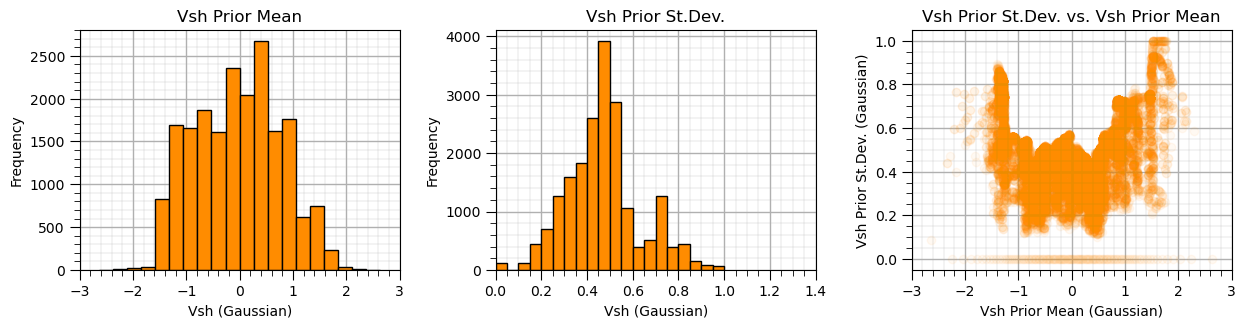

In [35]:
plt.subplot(131)
plt.hist(nVsh_prior_mean.flatten(),color='darkorange',edgecolor='black',bins=20)
plt.xlabel('Vsh (Gaussian)'); plt.ylabel('Frequency'); plt.title('Vsh Prior Mean')
plt.xlim([nVshmin,nVshmax]); add_grid2()

plt.subplot(132)
plt.hist(nVsh_prior_stdev.flatten(),color='darkorange',edgecolor='black',bins=20)
plt.xlabel('Vsh (Gaussian)'); plt.ylabel('Frequency'); plt.title('Vsh Prior St.Dev.')
plt.xlim([0,1.4]); add_grid2()

plt.subplot(133)
plt.scatter(nVsh_prior_mean.flatten(),nVsh_prior_stdev.flatten(),color='darkorange',edgecolor=None,alpha=0.05)
plt.xlabel('Vsh Prior Mean (Gaussian)'); plt.ylabel('Vsh Prior St.Dev. (Gaussian)'); plt.title('Vsh Prior St.Dev. vs. Vsh Prior Mean')
plt.xlim([nVshmin,nVshmax]); add_grid2()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=0.5, wspace=0.3, hspace=0.2); plt.show()

#### Calculate Vsh Likelihood from the Seismic Data Only

#### Dimensionality Reduction of Multiple Secondary Features

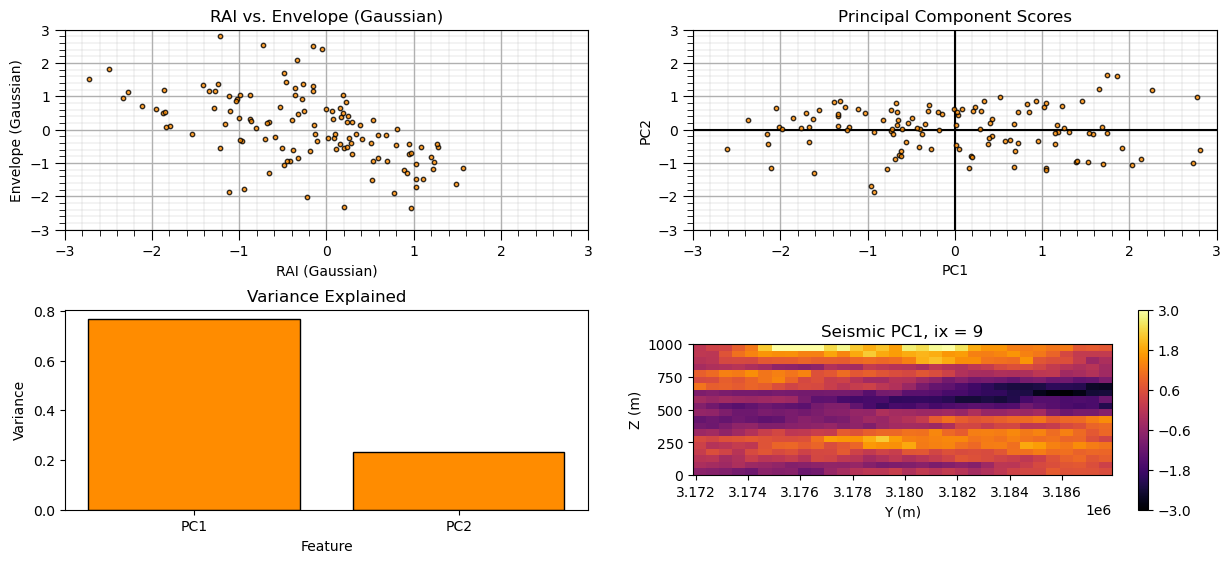

In [36]:
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(df_well[['nRAI','nEnv']].values)
seismic_PCs = pca.transform(df_well[['nRAI','nEnv']])  
df_well['Seismic_First_PC'] = seismic_PCs[:,0]
df_well['nSeismic_First_PC'],_,_ = geostats.nscore(df_well,'Seismic_First_PC')
# print(np.round(pca.components_,3))
# print('First Principal Component = ' + str(np.round(pca.components_[0,:],3)))
# print('Second Principal Component = ' + str(np.round(pca.components_[1,:],3)))
# print('Variance explained by PC1 and PC2 =', np.round(pca.explained_variance_ratio_,3))
# print('First Principal Component explains ' + str(np.round(pca.explained_variance_ratio_[0],3)) + ' of the total variance.')
# print('Second Principal Component explains ' + str(np.round(pca.explained_variance_ratio_[1],3)) + ' of the total variance.')

plt.subplot(221)
plt.scatter(df_well['nRAI'],df_well['nEnv'], s=10, c="darkorange", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=1.0, edgecolors="black")
plt.title('RAI vs. Envelope (Gaussian)'); plt.xlabel('RAI (Gaussian)'); plt.ylabel('Envelope (Gaussian)')
plt.xlim([nRAImin,nRAImax]); plt.ylim([nEnvmin,nEnvmax]);
add_grid2()

plt.subplot(222)                              # calculate the principal component scores
plt.scatter(seismic_PCs[:,0],-1*seismic_PCs[:,1],s=10, c="darkorange", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=1.0, edgecolors="black",zorder=2)
plt.title('Principal Component Scores'); plt.xlabel('PC1'); plt.ylabel('PC2')
plt.xlim([nVshmin,nVshmax]); plt.ylim([nVshmin,nVshmax]); plt.plot([nVshmin,nVshmax],[0.0,0.0],color='black',zorder=1); plt.plot([0.0,0.0],[nVshmin,nVshmax],color='black',zorder=1)
add_grid2()

plt.subplot(223)
plt.bar(['PC1','PC2'],[pca.explained_variance_ratio_[0],pca.explained_variance_ratio_[1]],color='darkorange',edgecolor='black')
plt.xlabel('Feature'); plt.ylabel('Variance'); plt.title('Variance Explained')

seismic_ndarray = np.vstack([sim_RAI_truth.flatten().T,cosim_Env_truth.flatten().T]).T
Vsh_PC1 = np.reshape(pca.transform(seismic_ndarray)[:,0],(nz,ny,nx))
nVsh_PC1 = np.reshape(geostats.nscore(pd.DataFrame(Vsh_PC1.flatten().T,columns=['Vsh_PC1']),'Vsh_PC1')[0],(nz,ny,nx))

plt.subplot(224)
im = plt.imshow(nVsh_PC1[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = nVshmin, vmax = nVshmax,
                 cmap = cmap,aspect=5)
plt.title('Seismic PC1, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(nVshmin,nVshmax, 6))

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=1.0, wspace=0.2, hspace=0.4); plt.show()

#### Calculate the Local Vsh Likelihood Distributions from Secondary, Seismic Data Only

We demonstrate with a single exhaustively sampled secondary variable, our first PC. We need to formulate the following simple kriging system.

\begin{equation}
C \lambda = D
\end{equation}

and then invert the left side, $C^{-1}$ and multiply by the right side, $D$, to solve for the weights, $\lambda$.

The method in this example is for 1 secondary variable, acoustic impedance, predicting the primary variable, porosity, to formulate $C$ and $D$. It is not difficult to expand this method for multiple secondary variables. Here's an example for 2 secondary variables, assuming nscore acoustic impedance - column 9 and nscore permeability - column 8 and the primary is nscore porosity - column 7: 

Left = [[1.]]
Right = [0.7759620684860019]
Left Inv [[1.]]
Weights [0.77596207]


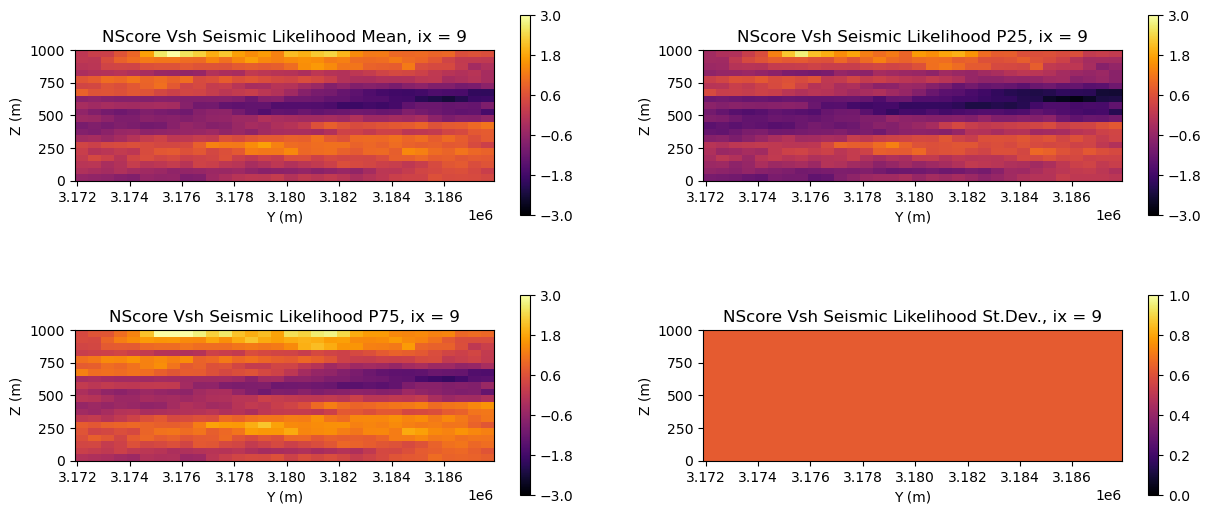

In [37]:
left = df_well.loc[:,['Seismic_First_PC']].corr().values                # calculate the left-hand side
print('Left = ' + str(left))
right = [np.corrcoef(np.hstack([df_well.loc[:,['nVsh']].values,df_well.loc[:,['Seismic_First_PC']].values]).T)[0,1]]

### WARNING ADHOC reduction in correlation to avoid artifacts. This demonstration has unrealistically correlated seismic to well data
right = [right[0] *0.8]

print('Right = ' + str(right))
left_inv = np.linalg.inv(left)
print('Left Inv ' + str(left_inv))
wts = np.matmul(left_inv,right)
print('Weights ' + str(wts))

#Vsh_likelihood_mean = Vsh_PC1 * wts[0] + (1-np.sum(wts[0]))*debias_Vsh_exp
nVsh_likelihood_mean = nVsh_PC1 * wts[0]
#nVsh_likelihood_mean = nVsh_likelihood_mean - np.average(nVsh_likelihood_mean.flatten())

nVsh_likelihood_var = np.full((nz,ny,nx),(1.0 - wts[0] * right[0]))
nVsh_likelihood_stdev = np.sqrt(nVsh_likelihood_var.clip(min = 0.0000000000001))

nVsh_likelihood_P25 = norm.ppf(np.full((nz,ny,nx),0.25),nVsh_likelihood_mean,nVsh_likelihood_stdev)
nVsh_likelihood_P75 = norm.ppf(np.full((nz,ny,nx),0.75),nVsh_likelihood_mean,nVsh_likelihood_stdev)

plt.subplot(221)
im = plt.imshow(nVsh_likelihood_mean[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = -3, vmax = 3,
                 cmap = cmap,aspect=5)
plt.title('NScore Vsh Seismic Likelihood Mean, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(-3, 3, 6))
                              
plt.subplot(222)
im = plt.imshow(nVsh_likelihood_P25[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = -3, vmax = 3,
                 cmap = cmap,aspect=5)
plt.title('NScore Vsh Seismic Likelihood P25, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(-3, 3, 6))
                              
plt.subplot(223)
im = plt.imshow(nVsh_likelihood_P75[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = -3, vmax = 3,
                 cmap = cmap,aspect=5)
plt.title('NScore Vsh Seismic Likelihood P75, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(-3, 3, 6))

plt.subplot(224)
im = plt.imshow(nVsh_likelihood_stdev[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = 0.0, vmax = 1.0,
                 cmap = cmap,aspect=5)
plt.title('NScore Vsh Seismic Likelihood St.Dev., ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0.0, 1.0, 6))
  
# plt.subplot(224)
# GSLIB.pixelplt_st(nVsh_likelihood_stdev,xmin,xmax,zmin,zmax,xsiz,0.0,1.0,'NScore Vsh Seismic Likelihood St.Dev.','X (m)','Z (m)','Vsh Shale St.Dev. (Gaussian)',cmap)
# plt.scatter(Vsh_trend_well['X'],Vsh_trend_well['Z'],c='white',s=20,marker='s',edgecolor='black',zorder=20,vmin=0.0,vmax=0.06,cmap=plt.cm.inferno)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=1.0, wspace=0.2, hspace=0.4); plt.show()

Since the prior and likelihood distributions are Gaussian, the resulting updated distribution will also be Gaussian. The updated distribution is defined by the updated mean and variance, $\overline{y}_{updated}(\bf{u})$ and $\sigma^{2}_{updated}(\bf{u})$ respectively.  

\begin{equation}
\hspace{-0.1cm}\overline{x}_{updated} =
\frac{\overline{x}_{likelihood}(\bf{u}) \cdot \sigma^2_{prior} (\bf{u}) + \overline{x}_{prior}(\bf{u})
\cdot \sigma^2_{likelihood} (\bf{u})}{[1 - \sigma^2_{likelihood}(\bf{u})][\sigma^2_{prior}(\bf{u}) - 1] + 1}
\end{equation}

and the variance for the updated distribution is:

\begin{equation}
\sigma^2_{updated}(\bf{u}) =
\frac{{\sigma^2}_{prior}(\bf{u})~{\sigma^2}_{likelihood}(\bf{u})}{[1 - {\sigma^2}_{likelihood}(\bf{u})][{\sigma^2}_{prior}(\bf{u}) -1] + 1}
\end{equation}

where $\overline{x}$ and $\sigma^2$ are the mean and variance for each distribution.

The updated distributions defined above must be back-transformed to return the primary variables to their original distributions. 

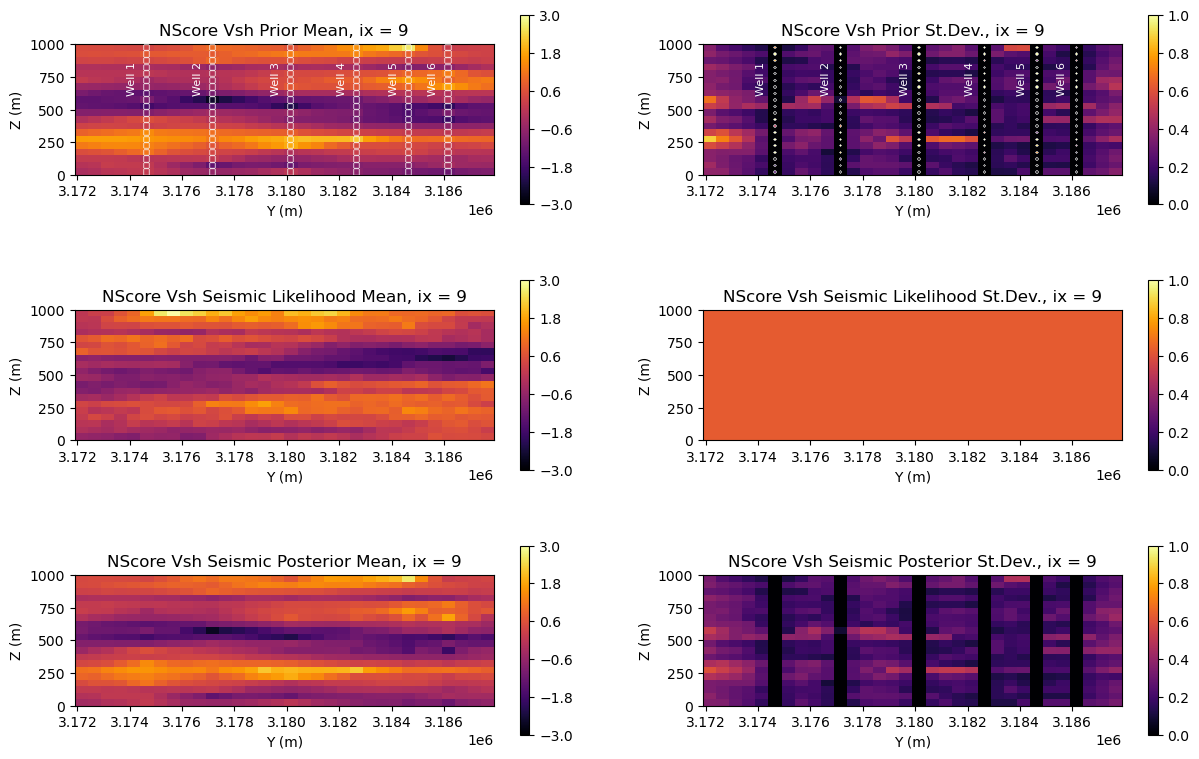

In [38]:
nVsh_posterior_mean = (nVsh_likelihood_mean * nVsh_prior_var + nVsh_prior_mean * nVsh_likelihood_var) / ((1-nVsh_likelihood_var)*(nVsh_prior_var - np.full((nz,ny,nx),1.0)) + np.full((nz,ny,nx),1.0))
    
nVsh_posterior_var = (nVsh_prior_var*nVsh_likelihood_var) / ((1-nVsh_likelihood_var)*(nVsh_prior_var - np.full((nz,ny,nx),1.0)) + np.full((nz,ny,nx),1.0))
nVsh_posterior_stdev = np.sqrt(nVsh_posterior_var.clip(min = 0.000000000000001))

plt.subplot(321)
im = plt.imshow(nVsh_prior_mean[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = -3, vmax = 3,
                 cmap = cmap,aspect=5)
plt.title('NScore Vsh Prior Mean, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(-3, 3, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=Vsh_trend_well['nVsh'],s=15,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=-3,vmax=3,cmap=plt.cm.inferno)

plt.subplot(322)
im = plt.imshow(nVsh_prior_stdev[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = 0.0, vmax = 1.0,
                 cmap = cmap,aspect=5)
plt.title('NScore Vsh Prior St.Dev., ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0.0, 1.0, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=Vsh_trend_well['nVsh'],s=1,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=Vshmin,vmax=Vshmax,cmap=plt.cm.inferno)

plt.subplot(323)
im = plt.imshow(nVsh_likelihood_mean[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = -3, vmax = 3,
                 cmap = cmap,aspect=5)
plt.title('NScore Vsh Seismic Likelihood Mean, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(-3, 3, 6))                         

plt.subplot(324)
im = plt.imshow(nVsh_likelihood_stdev[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = 0.0, vmax = 1.0,
                 cmap = cmap,aspect=5)
plt.title('NScore Vsh Seismic Likelihood St.Dev., ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0.0, 1.0, 6))
  
plt.subplot(325)
im = plt.imshow(nVsh_posterior_mean[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = -3, vmax = 3,
                 cmap = cmap,aspect=5)
plt.title('NScore Vsh Seismic Posterior Mean, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(-3, 3, 6))                         

plt.subplot(326)
im = plt.imshow(nVsh_posterior_stdev[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = 0.0, vmax = 1.0,
                 cmap = cmap,aspect=5)
plt.title('NScore Vsh Seismic Posterior St.Dev., ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0.0, 1.0, 6))
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=1.5, wspace=0.2, hspace=0.4); plt.show()    


#### Check the Posterior Difference Models

The posterior - likelihood and posterior - prior models.

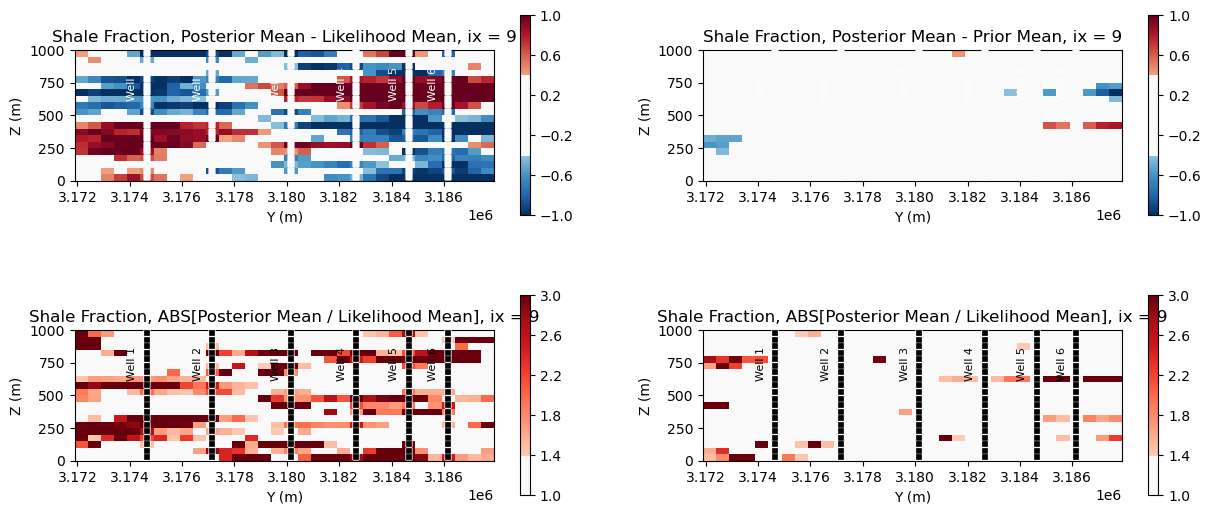

In [39]:
plt.subplot(221)
im = plt.imshow(nVsh_posterior_mean[:,::-1,9]-nVsh_likelihood_mean[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = -1, vmax = 1,
                 cmap = signif,aspect=5)
plt.title('Shale Fraction, Posterior Mean - Likelihood Mean, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(-1, 1, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=white,s=15,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=-3,vmax=3,cmap=plt.cm.inferno)

plt.subplot(222)
im = plt.imshow(nVsh_posterior_mean[:,::-1,9]-nVsh_prior_mean[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = -1, vmax = 1,
                 cmap = signif,aspect=5)
plt.title('Shale Fraction, Posterior Mean - Prior Mean, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(-1, 1, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=white,s=15,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=-3,vmax=3,cmap=plt.cm.inferno)

plt.subplot(223)
im = plt.imshow(np.abs(nVsh_posterior_mean[:,::-1,9]/nVsh_likelihood_mean[:,::-1,9]),interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = 1, vmax = 3,
                 cmap=signif_onetail,aspect=5)
plt.title('Shale Fraction, ABS[Posterior Mean / Likelihood Mean], ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(1, 3, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='black',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c='black',s=15,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=-3,vmax=3,cmap=plt.cm.inferno)
    
plt.subplot(224)
im = plt.imshow(np.abs(nVsh_posterior_mean[:,::-1,9]/nVsh_prior_mean[:,::-1,9]),interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = 1, vmax = 3,
                 cmap=signif_onetail,aspect=5)
plt.title('Shale Fraction, ABS[Posterior Mean / Likelihood Mean], ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(1, 3, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='black',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c='black',s=15,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=-3,vmax=3,cmap=plt.cm.inferno)
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=1.0, wspace=0.2, hspace=0.4); plt.show()    

#### Backtransformation

Move back to original feature space from Gaussian space

* we utilize the transformation table from the original, debiased well data

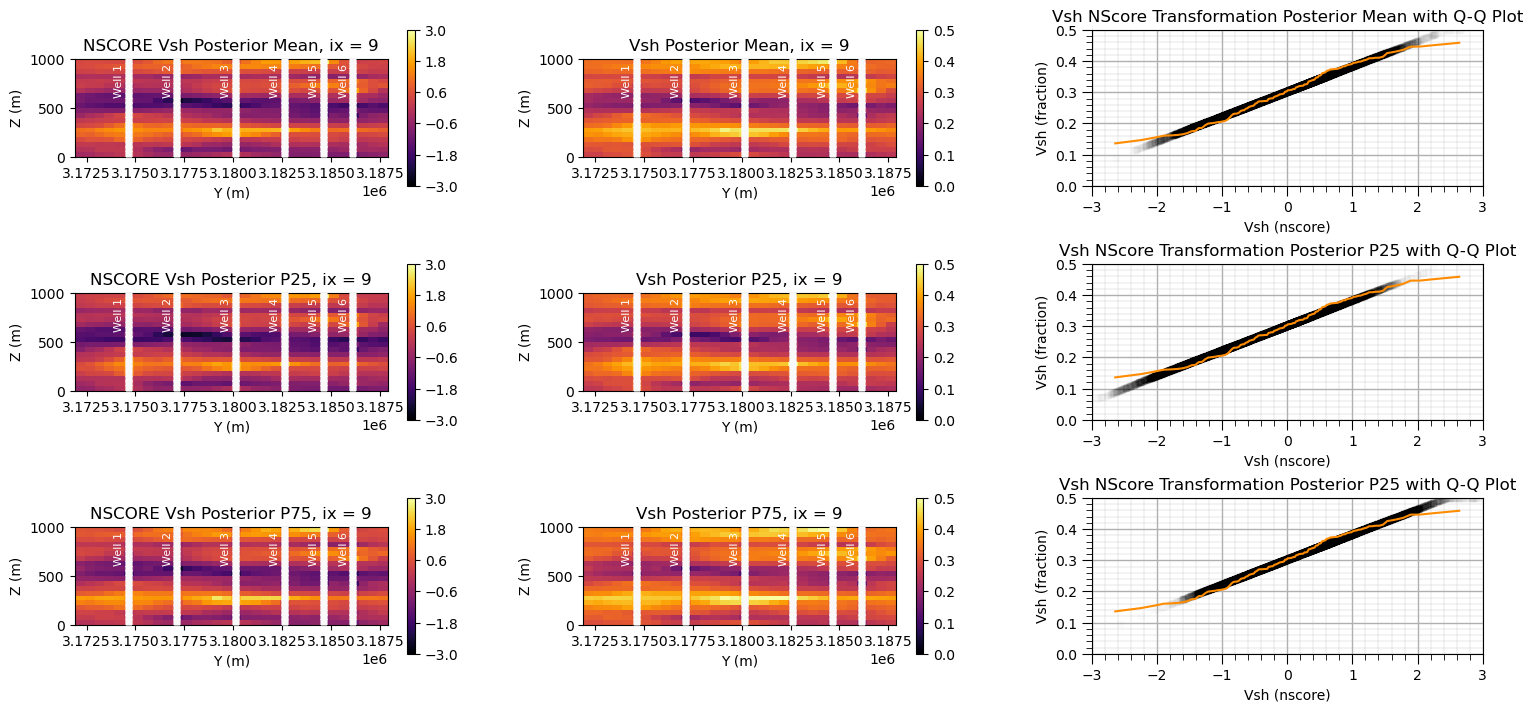

In [40]:
# nVsh_transform_table_orig_well,nVsh_transform_table_norm_well

# Transform 
nVsh_posterior_stdev = np.sqrt(nVsh_prior_var.clip(min = 0.00000000001))

nVsh_posterior_P25 = norm.ppf(np.full((nz,ny,nx),0.25),nVsh_posterior_mean,nVsh_posterior_stdev)
nVsh_posterior_P75 = norm.ppf(np.full((nz,ny,nx),0.75),nVsh_posterior_mean,nVsh_posterior_stdev)

Vsh_posterior_mean = np.reshape(geostats.backtr(pd.DataFrame(nVsh_posterior_mean.flatten().T,columns=['Vsh_mean']),'Vsh_mean',
    nVsh_transform_table_orig_debias,nVsh_transform_table_norm_debias,nVshmin,nVshmax,1,nVshmin,1,nVshmax),(nz,ny,nx)) # NSCORE with global Q-Q

Vsh_posterior_P25 = np.reshape(geostats.backtr(pd.DataFrame(nVsh_posterior_P25.flatten().T,columns=['Vsh_P25']),'Vsh_P25',
    nVsh_transform_table_orig_debias,nVsh_transform_table_norm_debias,nVshmin,nVshmax,1,nVshmin,1,nVshmax),(nz,ny,nx)) 

Vsh_posterior_P75 = np.reshape(geostats.backtr(pd.DataFrame(nVsh_posterior_P75.flatten().T,columns=['Vsh_P75']),'Vsh_P75',
    nVsh_transform_table_orig_debias,nVsh_transform_table_norm_debias,nVshmin,nVshmax,1,nVshmin,1,nVshmax),(nz,ny,nx)) 

# Vsh_posterior_mean = np.reshape(geostats.backtr(pd.DataFrame(nVsh_posterior_mean.flatten().T,columns=['Vsh_mean']),'Vsh_mean',
#     nVsh_transform_table_orig_well,nVsh_transform_table_norm_well,nVshmin,nVshmax,1,nVshmin,1,nVshmax),(nz,nx)) # NSCORE with global Q-Q

# Vsh_posterior_P25 = np.reshape(geostats.backtr(pd.DataFrame(nVsh_posterior_P25.flatten().T,columns=['Vsh_P25']),'Vsh_P25',
#     nVsh_transform_table_orig_well,nVsh_transform_table_norm_well,nVshmin,nVshmax,1,nVshmin,1,nVshmax),(nz,nx)) 

# Vsh_posterior_P75 = np.reshape(geostats.backtr(pd.DataFrame(nVsh_posterior_P75.flatten().T,columns=['Vsh_P75']),'Vsh_P75',
#     nVsh_transform_table_orig_well,nVsh_transform_table_norm_well,nVshmin,nVshmax,1,nVshmin,1,nVshmax),(nz,nx)) 

plt.subplot(331)
im = plt.imshow(nVsh_posterior_mean[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = nVshmin, vmax = nVshmax,
                 cmap = cmap,aspect=5)
plt.title('NSCORE Vsh Posterior Mean, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(nVshmin,nVshmax, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=white,s=15,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=nVshmin,vmax=nVshmax,cmap=plt.cm.inferno)

plt.subplot(332)
im = plt.imshow(Vsh_posterior_mean[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Vshmin, vmax = Vshmax,
                 cmap = cmap,aspect=5)
plt.title('Vsh Posterior Mean, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Vshmin,Vshmax, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=white,s=15,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=Vshmin,vmax=Vshmax,cmap=plt.cm.inferno)

plt.subplot(333)
plt.plot(nVsh_transform_table_norm_well,nVsh_transform_table_orig_well,c='darkorange')
plt.scatter(nVsh_posterior_mean,Vsh_posterior_mean,marker='s',s=20,alpha=0.01,color='black')
plt.xlabel('Vsh (nscore)'); plt.ylabel('Vsh (fraction)'); plt.title('Vsh NScore Transformation Posterior Mean with Q-Q Plot')
plt.ylim([Vshmin,Vshmax]); plt.xlim([nVshmin,nVshmax]); add_grid2()

plt.subplot(334)
im = plt.imshow(nVsh_posterior_P25[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = nVshmin, vmax = nVshmax,
                 cmap = cmap,aspect=5)
plt.title('NSCORE Vsh Posterior P25, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(nVshmin,nVshmax, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=white,s=15,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=nVshmin,vmax=nVshmax,cmap=plt.cm.inferno)

plt.subplot(335)
im = plt.imshow(Vsh_posterior_P25[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Vshmin, vmax = Vshmax,
                 cmap = cmap,aspect=5)
plt.title('Vsh Posterior P25, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Vshmin,Vshmax, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=white,s=15,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=Vshmin,vmax=Vshmax,cmap=plt.cm.inferno)

plt.subplot(336)
plt.plot(nVsh_transform_table_norm_well,nVsh_transform_table_orig_well,c='darkorange')
plt.scatter(nVsh_posterior_P25,Vsh_posterior_P25,marker='s',s=20,alpha=0.01,color='black')
plt.xlabel('Vsh (nscore)'); plt.ylabel('Vsh (fraction)'); plt.title('Vsh NScore Transformation Posterior P25 with Q-Q Plot')
plt.ylim([Vshmin,Vshmax]); plt.xlim([nVshmin,nVshmax]); add_grid2()

plt.subplot(337)
im = plt.imshow(nVsh_posterior_P75[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = nVshmin, vmax = nVshmax,
                 cmap = cmap,aspect=5)
plt.title('NSCORE Vsh Posterior P75, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(nVshmin,nVshmax, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=white,s=15,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=nVshmin,vmax=nVshmax,cmap=plt.cm.inferno)

plt.subplot(338)
im = plt.imshow(Vsh_posterior_P75[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Vshmin, vmax = Vshmax,
                 cmap = cmap,aspect=5)
plt.title('Vsh Posterior P75, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Vshmin,Vshmax, 6))
for iwell in range(0,len(wellsy)):
    plt.annotate('Well ' + str(iwell+1),[wellsy[iwell]-750,nz*zsiz*0.60+zmn],size=8,color='white',rotation=90.0)
    plt.scatter(Vsh_trend_well['y'],Vsh_trend_well['z'],c=white,s=15,lw=0.2,
        marker='s',edgecolor='white',zorder=20,vmin=Vshmin,vmax=Vshmax,cmap=plt.cm.inferno)

plt.subplot(339)
plt.plot(nVsh_transform_table_norm_well,nVsh_transform_table_orig_well,c='darkorange')
plt.scatter(nVsh_posterior_P75,Vsh_posterior_P75,marker='s',s=20,alpha=0.01,color='black')
plt.xlabel('Vsh (nscore)'); plt.ylabel('Vsh (fraction)'); plt.title('Vsh NScore Transformation Posterior P25 with Q-Q Plot')
plt.ylim([Vshmin,Vshmax]); plt.xlim([nVshmin,nVshmax]); add_grid2()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.3, wspace=0.3, hspace=0.5); plt.show()

#### Build a Backtransformed CDF Table for Each Location

Let's first demonstrate this for a small number of cumulative probability thresholds, then we will repeat with many thresholds to avoid discretization artifacts in our final Vsh realizations

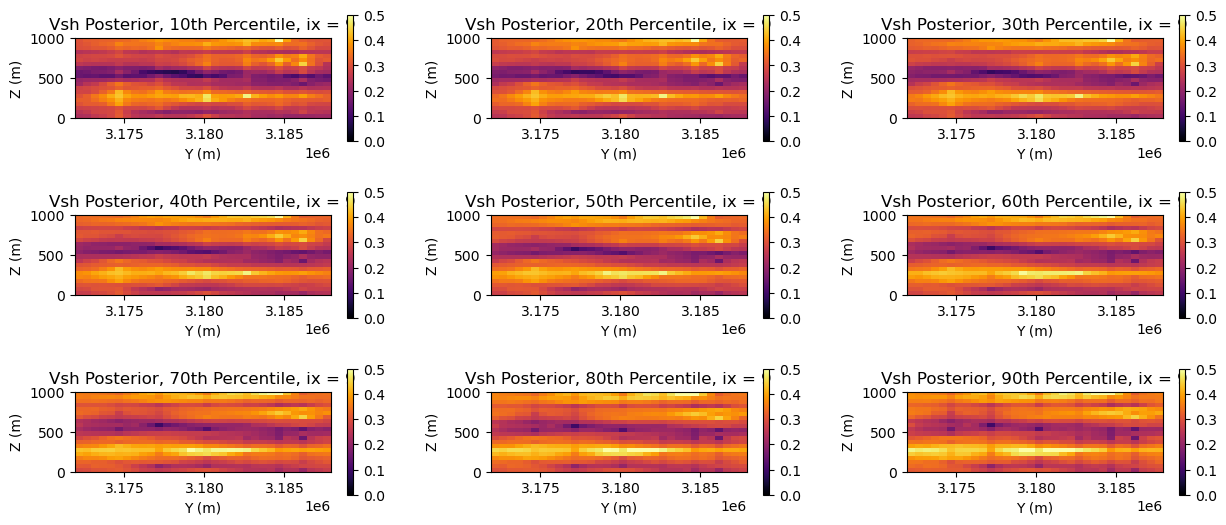

In [41]:
CDFmin_viz = 0.1; CDFmax_viz = 0.9; nCDF_viz = 9
bCDF_viz = np.linspace(CDFmin_viz,CDFmax_viz,nCDF_viz)

Vsh_posterior_CDF_viz = np.zeros((nCDF_viz,nz,ny,nx))

for iCDF, lCDF in enumerate(bCDF_viz):
    nVsh_posterior = norm.ppf(np.full((nz,ny,nx),lCDF),nVsh_posterior_mean,nVsh_posterior_stdev) 
    Vsh_posterior_CDF_viz[iCDF,:,:] = np.reshape(geostats.backtr(pd.DataFrame(nVsh_posterior.flatten().T,columns=['Vsh']),'Vsh',
    nVsh_transform_table_orig_debias,nVsh_transform_table_norm_debias,nVshmin,nVshmax,1,nVshmin,1,nVshmax),(nz,ny,nx)) # NSCORE with global Q-Q

for iCDF, lCDF in enumerate(bCDF_viz):
    plt.subplot(3,3,iCDF+1)
    lCDF = int(lCDF*100)
    im = plt.imshow(Vsh_posterior_CDF_viz[iCDF,:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Vshmin, vmax = Vshmax,
                 cmap = cmap,aspect=5)
    plt.title('Vsh Posterior, ' + str(lCDF) + 'th Percentile, ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Vshmin,Vshmax, 6))   
    
    #GSLIB.pixelplt_st(Vsh_posterior_CDF_viz[iCDF,:,:],xmin,xmax,zmin,zmax,xsiz,Vshmin,Vshmax,'Vsh Posterior, ' + str(lCDF) + 'th Percentile','X (m)','Z (m)','Vsh (fraction)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=1.0, wspace=0.3, hspace=0.4); plt.show()

#### Now Check the Loocal Percentile Distributions

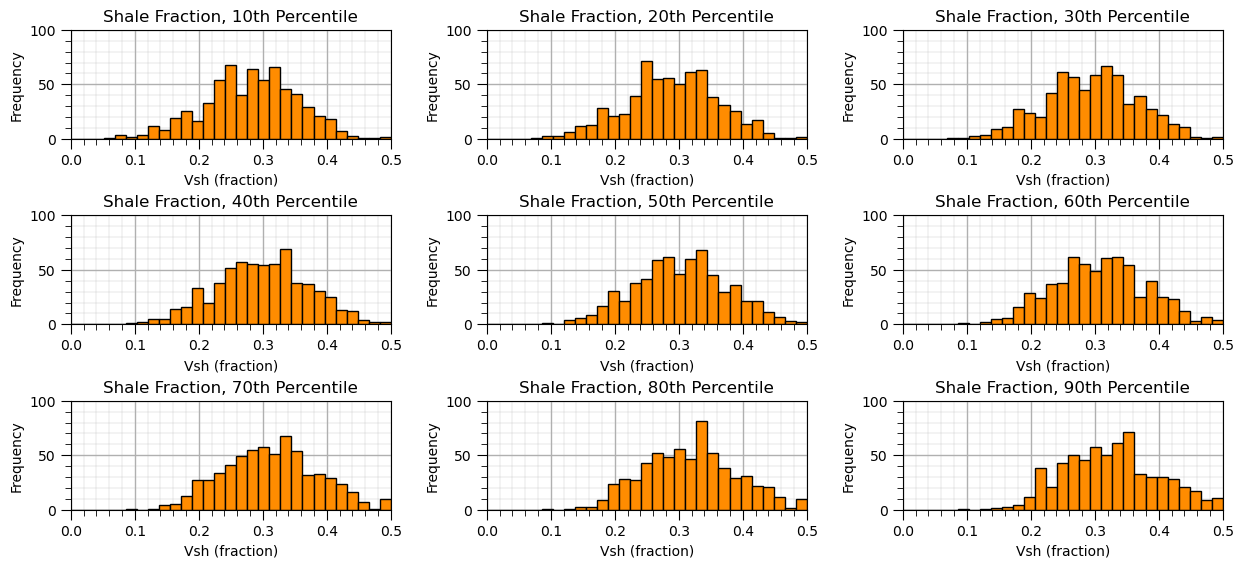

In [42]:
for iCDF, lCDF in enumerate(bCDF_viz):
    lCDF = int(lCDF*100)
    plt.subplot(3,3,iCDF+1)
    plt.hist(Vsh_posterior_CDF_viz[iCDF,:,::-1,9].flatten(),color='darkorange',edgecolor='black',bins=np.linspace(Vshmin,Vshmax,30))
    plt.ylim([0,100]); add_grid2()
    plt.xlim([Vshmin,Vshmax]);
    plt.xlabel('Vsh (fraction)'); plt.ylabel('Frequency'); plt.title('Shale Fraction, ' + str(lCDF) + 'th Percentile')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=1.0, wspace=0.3, hspace=0.7); plt.show()

#### Build a High Resolution CDF Table for p-field Simulation 

In [48]:
nCDF = 100
CDFmin = 1/nCDF; CDFmax = 1-1/nCDF
bCDF = np.linspace(CDFmin,CDFmax,nCDF)

Vsh_posterior_CDF = np.zeros((nz,ny,nx,nCDF))

for iCDF in tqdm(range(0,nCDF)):
    lCDF = bCDF[iCDF]
    nVsh_posterior = norm.ppf(np.full((nz,ny,nx),lCDF),nVsh_posterior_mean,nVsh_posterior_stdev) 
    Vsh_posterior_CDF[:,:,:,iCDF] = np.reshape(geostats.backtr(pd.DataFrame(nVsh_posterior.flatten().T,columns=['Vsh']),'Vsh',
    nVsh_transform_table_orig_debias,nVsh_transform_table_norm_debias,nVshmin,nVshmax,1,nVshmin,1,nVshmax),(nz,ny,nx)) # NSCORE with global Q-Q

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:53<00:00,  1.87it/s]


#### Sample L Realizations of Vsh

Apply the p-field simulation method to the local CDFs.

Convolution Padding to avoid edge artifacts: 20


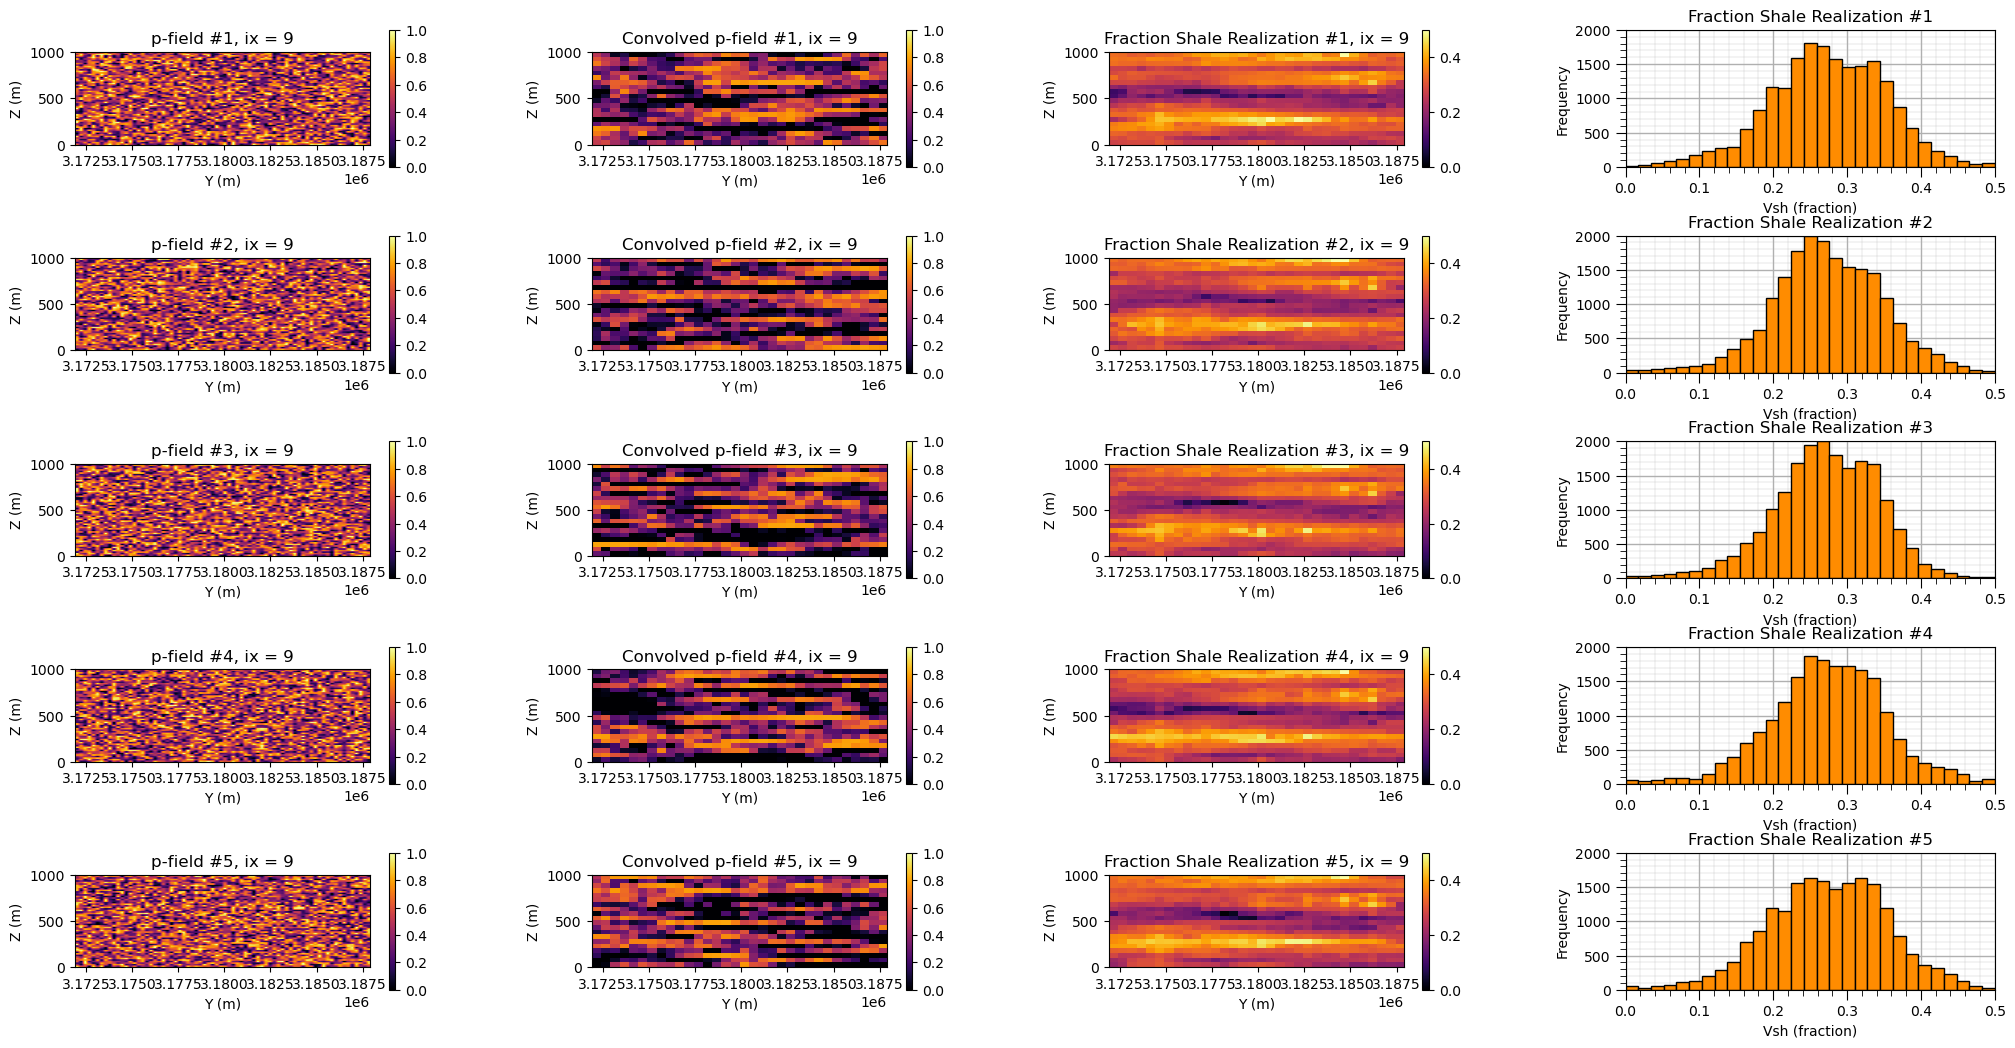

In [49]:
spatial_boot_uncertainty = False

npadding = max(int(vario_Vsh['hvert'][0]/zsiz),int(vario_Vsh['hmaj'][0]/ysiz),int(vario_Vsh['hmaj'][0]/xsiz))
print('Convolution Padding to avoid edge artifacts: ' + str(npadding))

from scipy import ndimage

np.random.seed(seed = seed)

ix = np.arange(nx); iy = np.arange(ny); iz = np.arange(nz) # make indices for fast p-field simulation
iz_3D, iy_3D, ix_3D = np.meshgrid(iz, iy, ix, indexing='ij')

nkx = int(vario_Vsh['hmaj'][0]*2/xsiz)+1
nky = int(vario_Vsh['hmaj'][0]*2/xsiz)+1
nkz = int(vario_Vsh['hvert'][0]*2/xsiz)+1
ckx = nkx/2; cky = nky/2; ckz = nkz/2
kernel = np.zeros((nkz,nky,nkx)); geo_dist = np.zeros((nkz,nky,nkx)) 

for iz in range(0,nkz):
    for iy in range(0,nky):
        for ix in range(0,nkx):
            geo_dist[iz,iy,ix] = ((ix-ckx)*xsiz/vario_Vsh['hmaj'][0])**2 + ((iy-cky)*xsiz/vario_Vsh['hmaj'][0])**2 + ((iz-ckz)*zsiz/vario_Vsh['hvert'][0])**2            

kernel[geo_dist > 1.0] = 1.0
kernel = kernel / np.sum(kernel.flatten()) # unbiasedness, sum to 1.0
      
L = 5

if spatial_boot_uncertainty == True:
    target_mean_Vsh = np.random.normal(loc = Vsh_spatial_boot_sample_exp, scale = Vsh_spatial_boot_sample_stdev,size = L) # global uncertainty
    target_mean_Vsh_pvalue = stats.percentileofscore(Vsh_sample, target_mean_Vsh, kind='rank')/100.0
else:
    target_mean_Vsh_pvalue = np.full((L),debias_Vsh_exp) # not using spatial bootstrap uncertainty in the mean now

Vsh_realization = np.zeros((L,nz,ny,nx))

for l in range(0,L):
    pfield = np.random.random(size=(nz+npadding*2,ny+npadding*2,nx+npadding*2))

    plt.subplot(L,4,l*4+1)
    im = plt.imshow(pfield[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = 0, vmax = 1,
                 cmap = cmap,aspect=5)
    plt.title('p-field #' + str(l+1) + ', ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0,1, 6)) 
    
    pfield = ndimage.convolve(pfield, kernel, mode='constant', cval=0.5) # convolve and then transform to U[0,1] 
    pfield = np.reshape(stats.rankdata(pfield[npadding:-npadding,npadding:-npadding,npadding:-npadding], "average") / (nz*ny*nx),(nz,ny,nx))
    
    pfield = pfield - np.average(pfield.flatten()) + target_mean_Vsh_pvalue[l] # global fluctuations in the mean from spatial bootstrap
    
    pvalue_indices = np.searchsorted(bCDF, pfield, side="left").clip(max = nCDF-1)
    
    plt.subplot(L,4,l*4+2)
    im = plt.imshow(pfield[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = 0, vmax = 1,
                 cmap = cmap,aspect=5)
    plt.title('Convolved p-field #' + str(l+1) + ', ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0,1, 6))   
 
    Vsh_realization[l] = Vsh_posterior_CDF[iz_3D,iy_3D,ix_3D,pvalue_indices]
    
    plt.subplot(L,4,l*4+3)
    im = plt.imshow(Vsh_realization[l,:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Vshmin, vmax = Vshmax,
                 cmap = cmap,aspect=5)
    plt.title('Fraction Shale Realization #' + str(l+1) + ', ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0,1, 6))

    plt.subplot(L,4,l*4+4)
    plt.hist(Vsh_realization[l].flatten(),color='darkorange',edgecolor='black',bins=np.linspace(Vshmin,Vshmax,30))
    plt.ylim([0,2000]); add_grid2()
    plt.xlim([Vshmin,Vshmax]);
    plt.xlabel('Vsh (fraction)'); plt.ylabel('Frequency'); plt.title('Fraction Shale Realization #' + str(l+1))
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=0.4*L, wspace=0.4, hspace=0.5); plt.show()

#### Cloud Transform to Simulate Porosity from Vsh

This assumes a strong porosity and Vsh relationship that will be honored.

* Will not precisely honor the data at the data locations

* Debiasing from the debiased Vsh mapped through the Por-Vsh relationship

* Assumes a Gaussian conditional residual

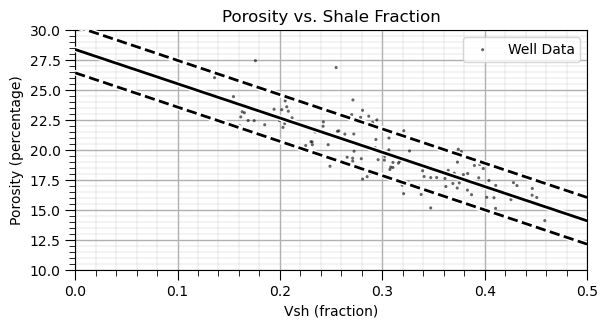

In [50]:
np.random.seed(seed=23)
nbin = 300
Vsh_new = np.linspace(Vshmin,Vshmax,nbin) 

linear = LinearRegression().fit(df_well['Vsh'].values.reshape(-1, 1),df_well['Por'].values)
linear_Por_trend = linear.predict(Vsh_new.reshape(-1, 1))
res_Por_trend = df_well['Por'].values - linear.predict(df_well['Vsh'].values.reshape(-1, 1))
res_Por_trend_std = np.std(res_Por_trend)
res_Por_trend_P10 = norm.ppf(0.1,loc=0.0,scale=res_Por_trend_std); res_Por_trend_P90 = norm.ppf(0.9,loc=0.0,scale=res_Por_trend_std )

nVsh = 100; nPor = 100
Porsiz = (Pormax - Pormin)/nPor; Pormn = Pormin + 0.5*Porsiz; 
cond_pdf = np.zeros([nVsh,nPor])

for iPor, lPor in enumerate(np.arange(Pormn,Pormn+nPor*Porsiz,Porsiz)):
    for iVsh, lVsh in enumerate(np.arange(Vshmn,Vshmn+nVsh*Vshsiz,Vshsiz)):       
        Por_trend_exp = linear.predict(lVsh.reshape(1, -1))
        Por_trend_stdev = res_Por_trend_std
        cond_pdf[nPor - iPor - 1,iVsh] = st.norm.pdf(lPor, loc=Por_trend_exp, scale=Por_trend_stdev)

# plt_scatter.imshow(cond_pdf,alpha=0.3,extent=(Vshmin,Vshmax,Pormin,Pormax),aspect='auto',zorder=1,cmap = plt.cm.inferno) 

plt.plot(Vsh_new,linear_Por_trend,color='white',lw=4,zorder=500)
plt.plot(Vsh_new,linear_Por_trend,color='black',lw=2,zorder=1000)
plt.plot(Vsh_new,linear_Por_trend + res_Por_trend_P10,color='white',lw=4,zorder=500)
plt.plot(Vsh_new,linear_Por_trend + res_Por_trend_P10,color='black',ls='--',lw=2,zorder=1000)
plt.plot(Vsh_new,linear_Por_trend + res_Por_trend_P90,color='white',lw=4,zorder=500)
plt.plot(Vsh_new,linear_Por_trend + res_Por_trend_P90,color='black',ls='--',lw=2,zorder=1000)
  
plt.scatter(df_well['Vsh'].values,df_well['Por'].values,color='black',edgecolors="none",
             s=5,alpha=0.6,zorder=100,label='Well Data')
plt.legend(loc='upper right') 
plt.ylim([Pormin,Pormax]); plt.xlim([Vshmin,Vshmax]); add_grid(plt_scatter)

plt.ylabel('Porosity (percentage)'); plt.xlabel(r'Vsh (fraction)');
plt.title('Porosity vs. Shale Fraction')     
add_grid2()

plt.subplots_adjust(left=0.0, bottom=0.0, right=0.8, top=0.5, wspace=0.3, hspace=0.3); plt.show()

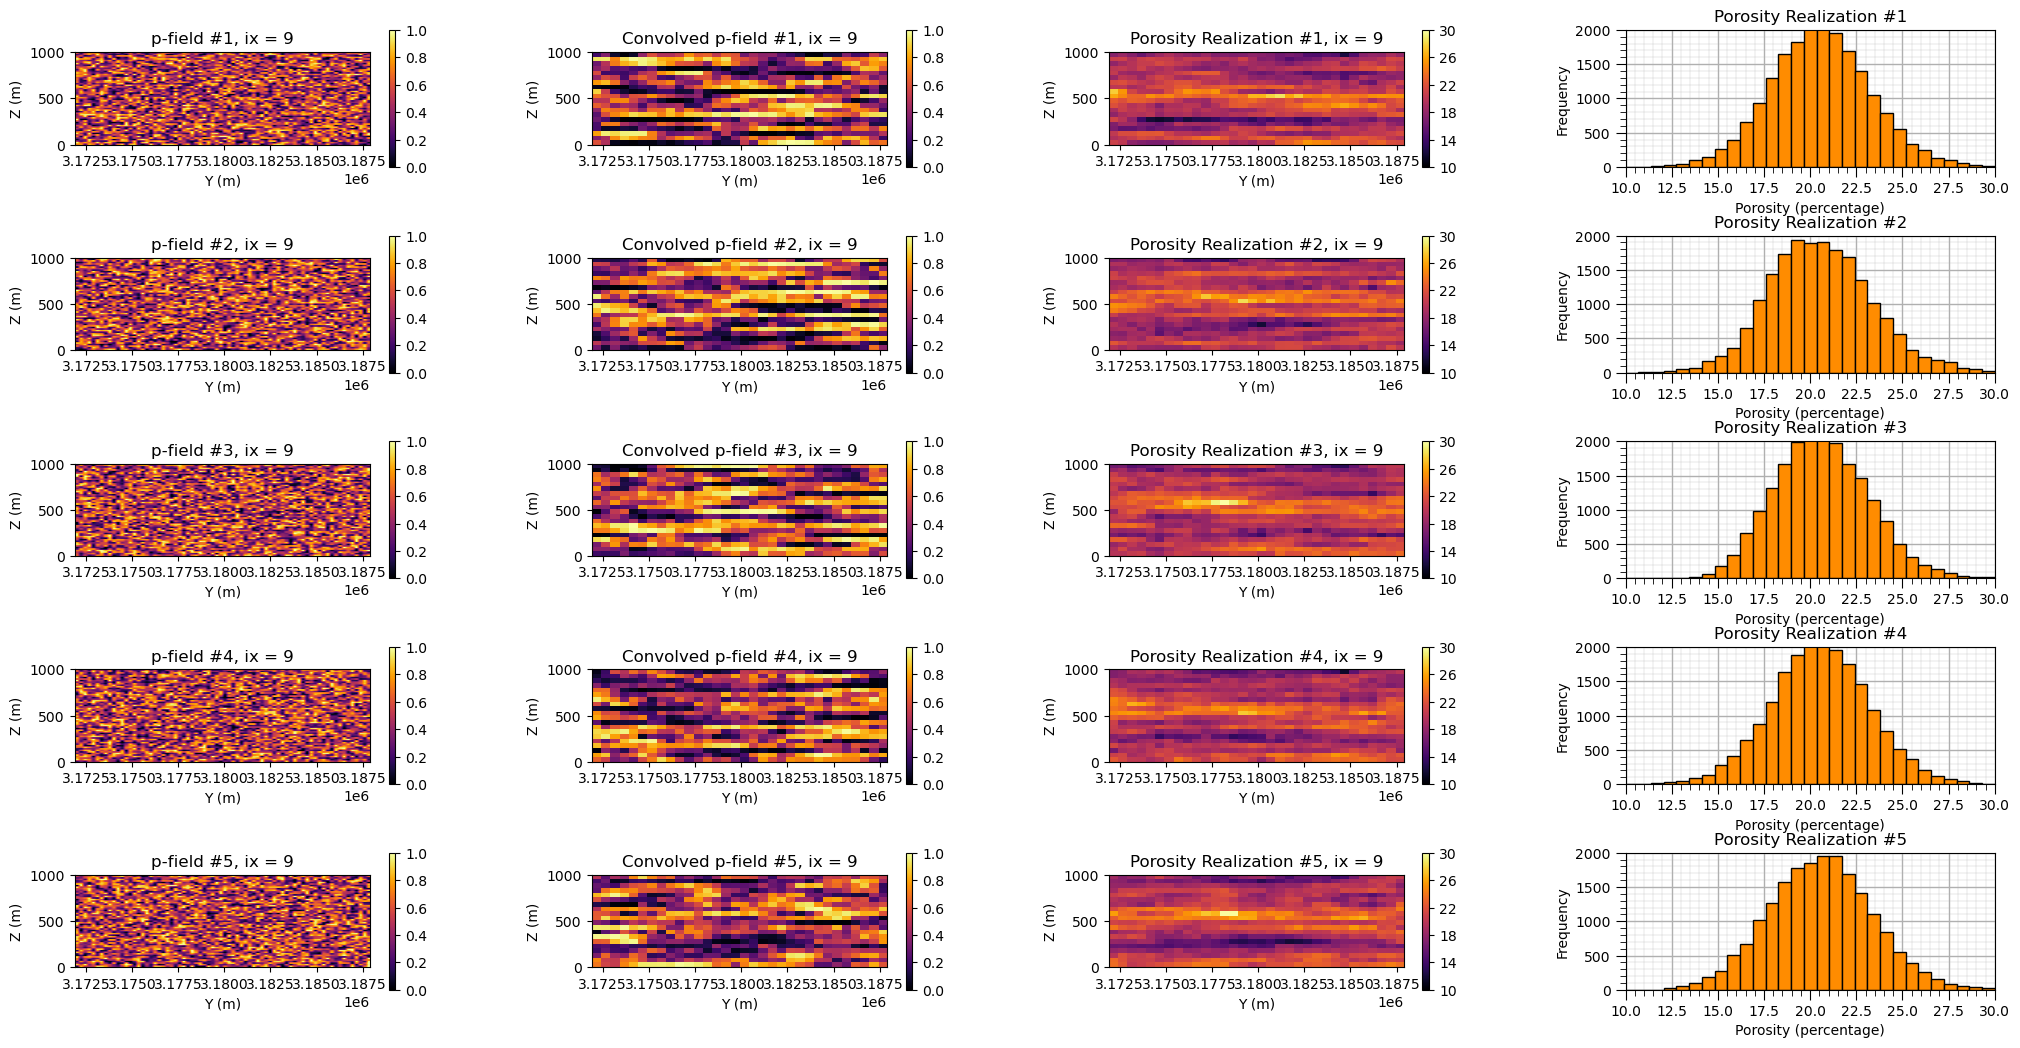

In [51]:
np.random.seed(seed = seed + 3)

nkx = int(vario_Vsh['hmaj'][0]*2/xsiz)+1
nky = int(vario_Vsh['hmaj'][0]*2/xsiz)+1
nkz = int(vario_Vsh['hvert'][0]*2/xsiz)+1
ckx = nkx/2; cky = nky/2; ckz = nkz/2
kernel = np.zeros((nkz,nky,nkx)); geo_dist = np.zeros((nkz,nky,nkx)) 

for iz in range(0,nkz):
    for iy in range(0,nky):
        for ix in range(0,nkx):
            geo_dist[iz,iy,ix] = ((ix-ckx)*xsiz/vario_Vsh['hmaj'][0])**2 + ((iy-cky)*xsiz/vario_Vsh['hmaj'][0])**2 + ((iz-ckz)*zsiz/vario_Vsh['hvert'][0])**2            

kernel[geo_dist > 1.0] = 1.0
kernel = kernel / np.sum(kernel.flatten()) # unbiasedness, sum to 1.0

Por_realization = np.zeros((L,nz,ny,nx))

for l in range(0,L):
    pfield = np.random.random(size=(nz+npadding*2,ny+npadding*2,nx+npadding*2))
    
    plt.subplot(L,4,l*4+1)   
    im = plt.imshow(pfield[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = 0, vmax = 1,
                 cmap = cmap,aspect=5)
    plt.title('p-field #' + str(l+1) + ', ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0,1, 6)) 

    pfield = ndimage.convolve(pfield, kernel, mode='constant', cval=0.5) # convolve and then transform to U[0,1] 
    pfield = np.reshape(stats.rankdata(pfield[npadding:-npadding,npadding:-npadding,npadding:-npadding], "average") / (nz*ny*nx),(nz,ny,nx))

    #pfield = pfield - np.average(pfield.flatten()) + target_mean_Vsh_pvalue[l] # global fluctuations in the mean from spatial bootstrap
      
    plt.subplot(L,4,l*4+2)
    im = plt.imshow(pfield[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = 0, vmax = 1,
                 cmap = cmap,aspect=5)
    plt.title('Convolved p-field #' + str(l+1) + ', ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0,1, 6))  
    
    Por_Exp = linear.predict(Vsh_realization[l].reshape(-1, 1))
    Por_realization[l] = norm.ppf(pfield.reshape(-1), loc=Por_Exp, scale=np.full((nz*ny*nx),res_Por_trend_std) ).reshape((nz,ny,nx))
    
    plt.subplot(L,4,l*4+3)
    im = plt.imshow(Por_realization[l,:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Pormin, vmax = Pormax,
                 cmap = cmap,aspect=5)
    plt.title('Porosity Realization #' + str(l+1) + ', ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Pormin,Pormax, 6))
 
    plt.subplot(L,4,l*4+4)
    plt.hist(Por_realization[l].flatten(),color='darkorange',edgecolor='black',bins=np.linspace(Pormin,Pormax,30))
    plt.ylim([0,2000]); add_grid2()
    plt.xlim([Pormin,Pormax]);
    plt.xlabel('Porosity (percentage)'); plt.ylabel('Frequency'); plt.title('Porosity Realization #' + str(l+1))
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=0.4*L, wspace=0.4, hspace=0.5); plt.show()

#### Cloud Transform to Simulate Permeability from Porosity

This assumes a strong permeability and porosity relationship that will be honored.

* Will not precisely honor the data at the data locations

* Debiasing from the debiased Vsh mapped through the Perm-Por relationship

* Assumes a Gaussian conditional residual

* Assumes valid cloud model fit, e.g., P10 > Expectation > P90, additional constraints may be added to impose this

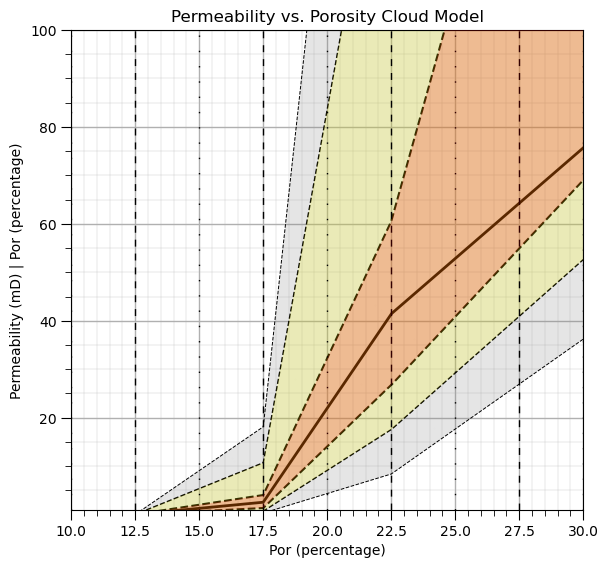

In [52]:
plt.subplot(111)
Perm_Por_exp,Perm_Por_P10,Perm_Por_P90 = cond_prob_plot(df_well['Por'].values,Pormin,Pormax,'Por','percentage',4,
                                                        df_well['Perm'],Permmin,Permmax,'Permeability','mD',k=1)
plt.title('Permeability vs. Porosity Cloud Model')

plt.subplots_adjust(left=0.0, bottom=0.0, right=0.8, top=1.0, wspace=0.3, hspace=0.3); plt.show()

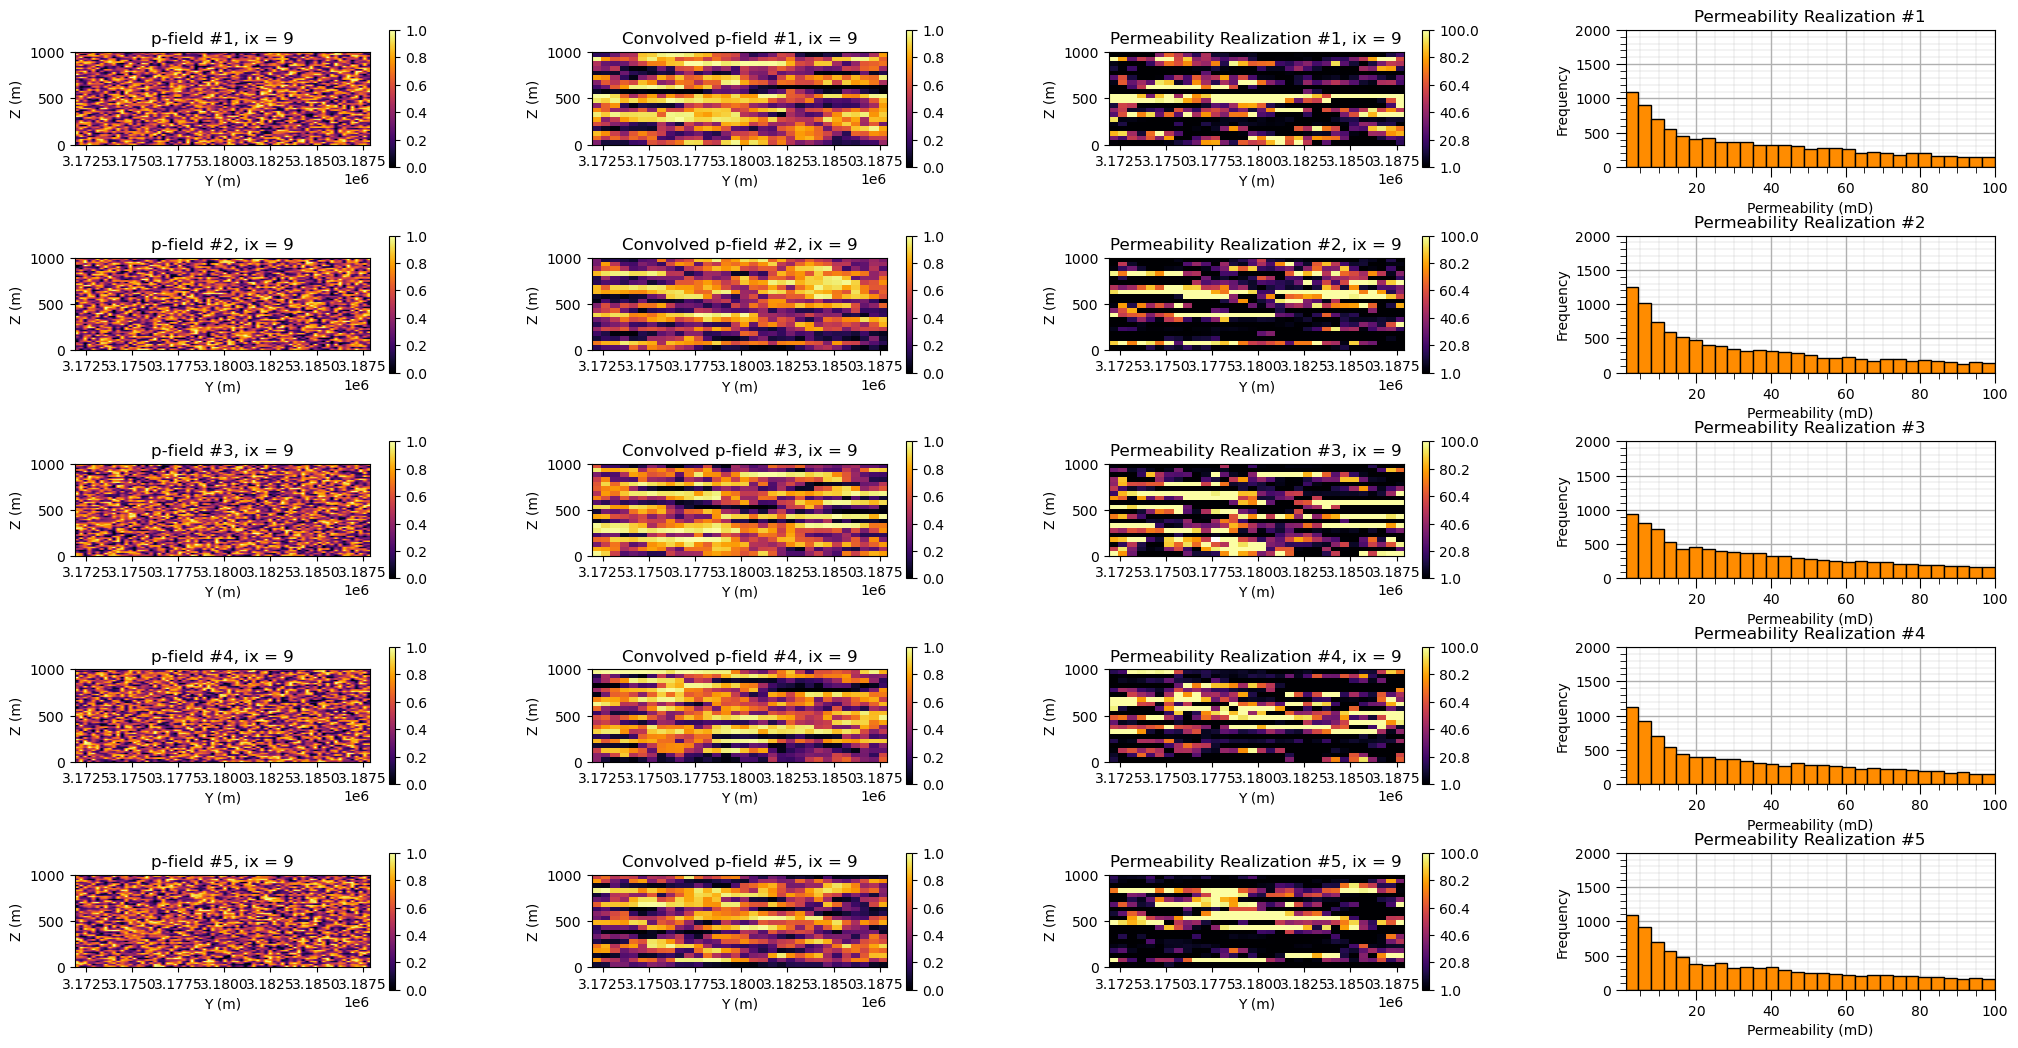

In [53]:
np.random.seed(seed = seed + 4) # repeatable but unique for each feature to avoid artificial correlation

nkx = int(vario_Vsh['hmaj'][0]*2/xsiz)+1
nky = int(vario_Vsh['hmaj'][0]*2/xsiz)+1
nkz = int(vario_Vsh['hvert'][0]*2/xsiz)+1
ckx = nkx/2; cky = nky/2; ckz = nkz/2
kernel = np.zeros((nkz,nky,nkx)); geo_dist = np.zeros((nkz,nky,nkx)) 

for iz in range(0,nkz):
    for iy in range(0,nky):
        for ix in range(0,nkx):
            geo_dist[iz,iy,ix] = ((ix-ckx)*xsiz/vario_Vsh['hmaj'][0])**2 + ((iy-cky)*xsiz/vario_Vsh['hmaj'][0])**2 + ((iz-ckz)*zsiz/vario_Vsh['hvert'][0])**2            

kernel[geo_dist > 1.0] = 1.0
kernel = kernel / np.sum(kernel.flatten()) # unbiasedness, sum to 1.0

Perm_realization = np.zeros((L,nz,ny,nx))

for l in range(0,L):
    pfield = np.random.random(size=(nz+npadding*2,ny+npadding*2,nx+npadding*2))
    
    plt.subplot(L,4,l*4+1)   
    im = plt.imshow(pfield[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = 0, vmax = 1,
                 cmap = cmap,aspect=5)
    plt.title('p-field #' + str(l+1) + ', ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0,1, 6)) 

    pfield = ndimage.convolve(pfield, kernel, mode='constant', cval=0.5) # convolve and then transform to U[0,1] 
    pfield = np.reshape(stats.rankdata(pfield[npadding:-npadding,npadding:-npadding,npadding:-npadding], "average") / (nz*ny*nx),(nz,ny,nx))

    #pfield = pfield - np.average(pfield.flatten()) + target_mean_Vsh_pvalue[l] # global fluctuations in the mean from spatial bootstrap
      
    plt.subplot(L,4,l*4+2)
    im = plt.imshow(pfield[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = 0, vmax = 1,
                 cmap = cmap,aspect=5)
    plt.title('Convolved p-field #' + str(l+1) + ', ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0,1, 6))  
    
    #pfield = pfield - np.average(pfield.flatten()) + target_mean_Vsh_pvalue[l] # global fluctuations in the mean from spatial bootstrap
      
    plt.subplot(L,4,l*4+2)
    im = plt.imshow(pfield[:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = 0, vmax = 1,
                 cmap = cmap,aspect=5)
    plt.title('Convolved p-field #' + str(l+1) + ', ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0,1, 6)) 
    
    Perm_Exp = Perm_Por_exp(Por_realization[l].reshape(-1))[:,0]
    Perm_P10 = Perm_Por_P10(Por_realization[l].reshape(-1))[:,0]
    Perm_P90 = Perm_Por_P90(Por_realization[l].reshape(-1))[:,0]
    Perm_StDev = np.clip((Perm_P90-Perm_P10)/2.56310,a_min = 0.00001,a_max = None)
    
    Perm_realization[l] = norm.ppf(pfield.reshape(-1),loc=Perm_Exp,scale=Perm_StDev).reshape((nz,ny,nx))
    
    plt.subplot(L,4,l*4+3)
    im = plt.imshow(Perm_realization[l,:,::-1,9],interpolation = None,extent = [ymin,ymax,zmin,zmax], vmin = Permmin, vmax = Permmax,
                 cmap = cmap,aspect=5)
    plt.title('Permeability Realization #' + str(l+1) + ', ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Permmin,Permmax, 6))

    plt.subplot(L,4,l*4+4)
    plt.hist(Perm_realization[l].flatten(),color='darkorange',edgecolor='black',bins=np.linspace(Permmin,Permmax,30))
    plt.ylim([0,2000]); add_grid2()
    plt.xlim([Permmin,Permmax]);
    plt.xlabel('Permeability (mD)'); plt.ylabel('Frequency'); plt.title('Permeability Realization #' + str(l+1))
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=0.4*L, wspace=0.4, hspace=0.5); plt.show()

#### Calculate the Stratigraphic Grid Parameters

Use a larger vertical extent and number of cells to fit the original foldered/deformed unit between the upper and lower surface.

In [54]:
szmax = np.max(surf_top.flatten())
szmin = np.min(surf_base.flatten())

print('Surface Extents [' + str(szmin) + ',' + str(szmax) + '], interval = ' + str(szmax - szmin))

nsz = 30
szsiz = np.round((szmax - szmin)/nsz,2)
szmn = np.round(szmin + szsiz*0.5,2)

print('\nGSLIB Surface Grid Specification, Z proportional: ')
print('nx, xmn, xsiz: ' + str(nx) + ', ' + str(xmn) + ', ' + str(xsiz))
print('ny, ymn, ysiz: ' + str(ny) + ', ' + str(ymn) + ', ' + str(ysiz)) 
print('nsz, szmn, szsiz: ' + str(nsz) + ', ' + str(szmn) + ', ' + str(szsiz))

Surface Extents [-2574.5071,-841.3514], interval = 1733.1556999999998

GSLIB Surface Grid Specification, Z proportional: 
nx, xmn, xsiz: 31, 292100.0, 500.0
ny, ymn, ysiz: 32, 3172150.0, 500.0
nsz, szmn, szsiz: 30, -2545.62, 57.77


#### Paint Models to Original Deformed Grid 

We assume a proportional coordinate system for this restoration to the original deformed grid.

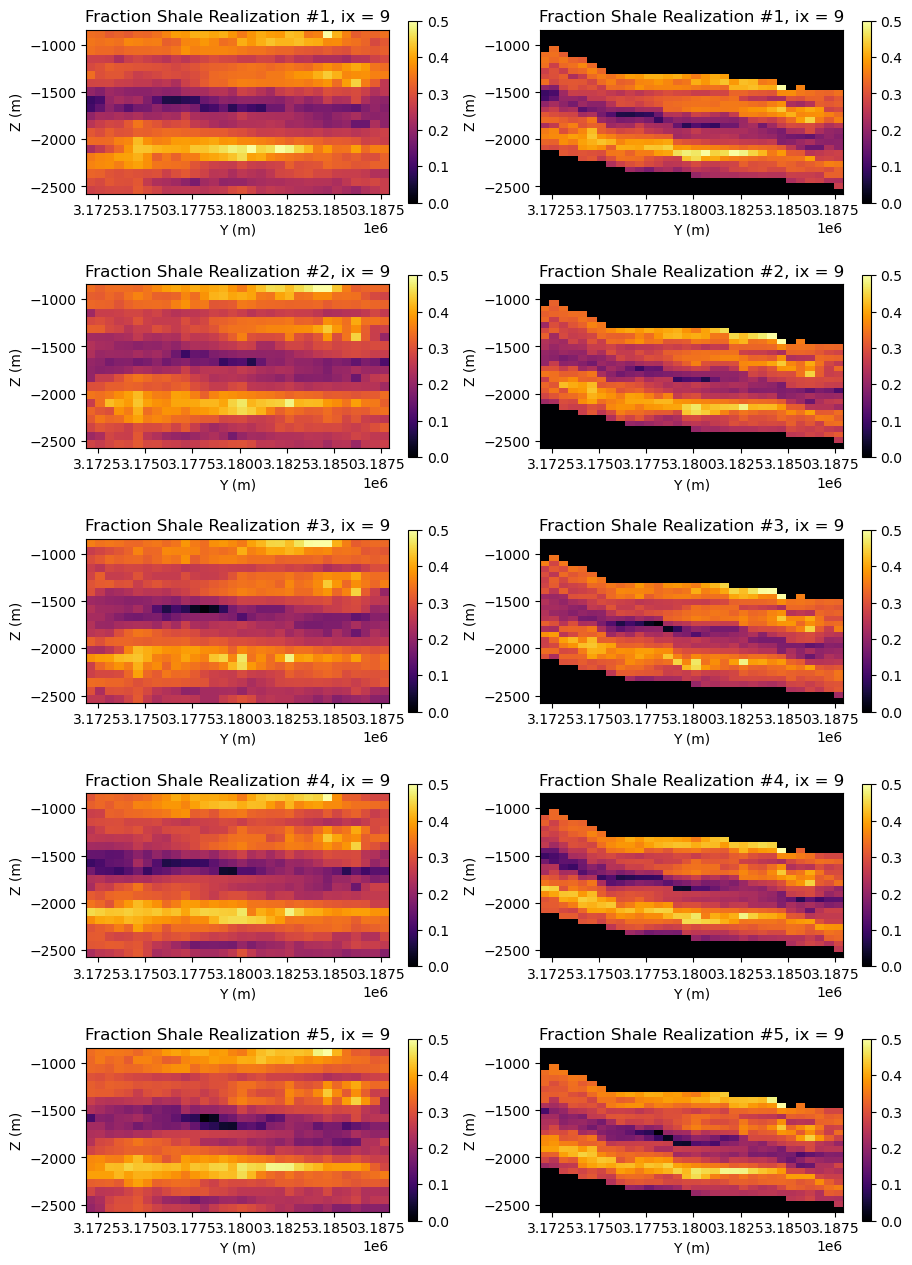

In [55]:
L = 5

Vsh_strat_grid = np.zeros((L,nsz,ny,nx))
Por_strat_grid = np.zeros((L,nsz,ny,nx))
Perm_strat_grid = np.zeros((L,nsz,ny,nx))

for iy in range(0, ny):
    for ix in range(0, nx):
        top = surf_top[ix,iy] # loaded surface have x,y ordering
        base = surf_base[ix,iy]           
        if base > top:
            print('Negative Thickness')
        for isz in range(0,nsz):
            szloc = szmn + isz * szsiz           
            if szloc >= base and szloc <= top:
                prop = (szloc - base)/(top - base)
                iz = int(prop*(nz-1))
                for l in range(0,L):
                    Vsh_strat_grid[l,isz,iy,ix] = Vsh_realization[l,iz,iy,ix] 
                    Por_strat_grid[l,isz,iy,ix] = Por_realization[l,iz,iy,ix]
                    Perm_strat_grid[l,isz,iy,ix] = Perm_realization[l,iz,iy,ix] 
                
for l in range(0,L):

    plt.subplot(L,2,l*2 + 1)
    lcmap = plt.cm.inferno
    lcmap.set_bad(color = 'white')
    
    im = plt.imshow(Vsh_realization[l,:,::-1,9],interpolation = None,extent = [ymin,ymax,szmin,szmax], vmin = Vshmin, vmax = Vshmax,
                 cmap = lcmap,aspect=5)
    plt.title('Fraction Shale Realization #' + str(l+1) + ', ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Vshmin,Vshmax,6))            
                
    plt.subplot(L,2,l*2 + 2)
    im = plt.imshow(Vsh_strat_grid[l,:,::-1,9],interpolation = None,extent = [ymin,ymax,szmin,szmax], vmin = Vshmin, vmax = Vshmax,
                 cmap = cmap,aspect=5)
    plt.title('Fraction Shale Realization #' + str(l+1) + ', ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Vshmin,Vshmax,6))
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.3, top=0.5*L, wspace=0.2, hspace=0.4); plt.show()    

#### Visualize All the Features in the Original Deformed Grid

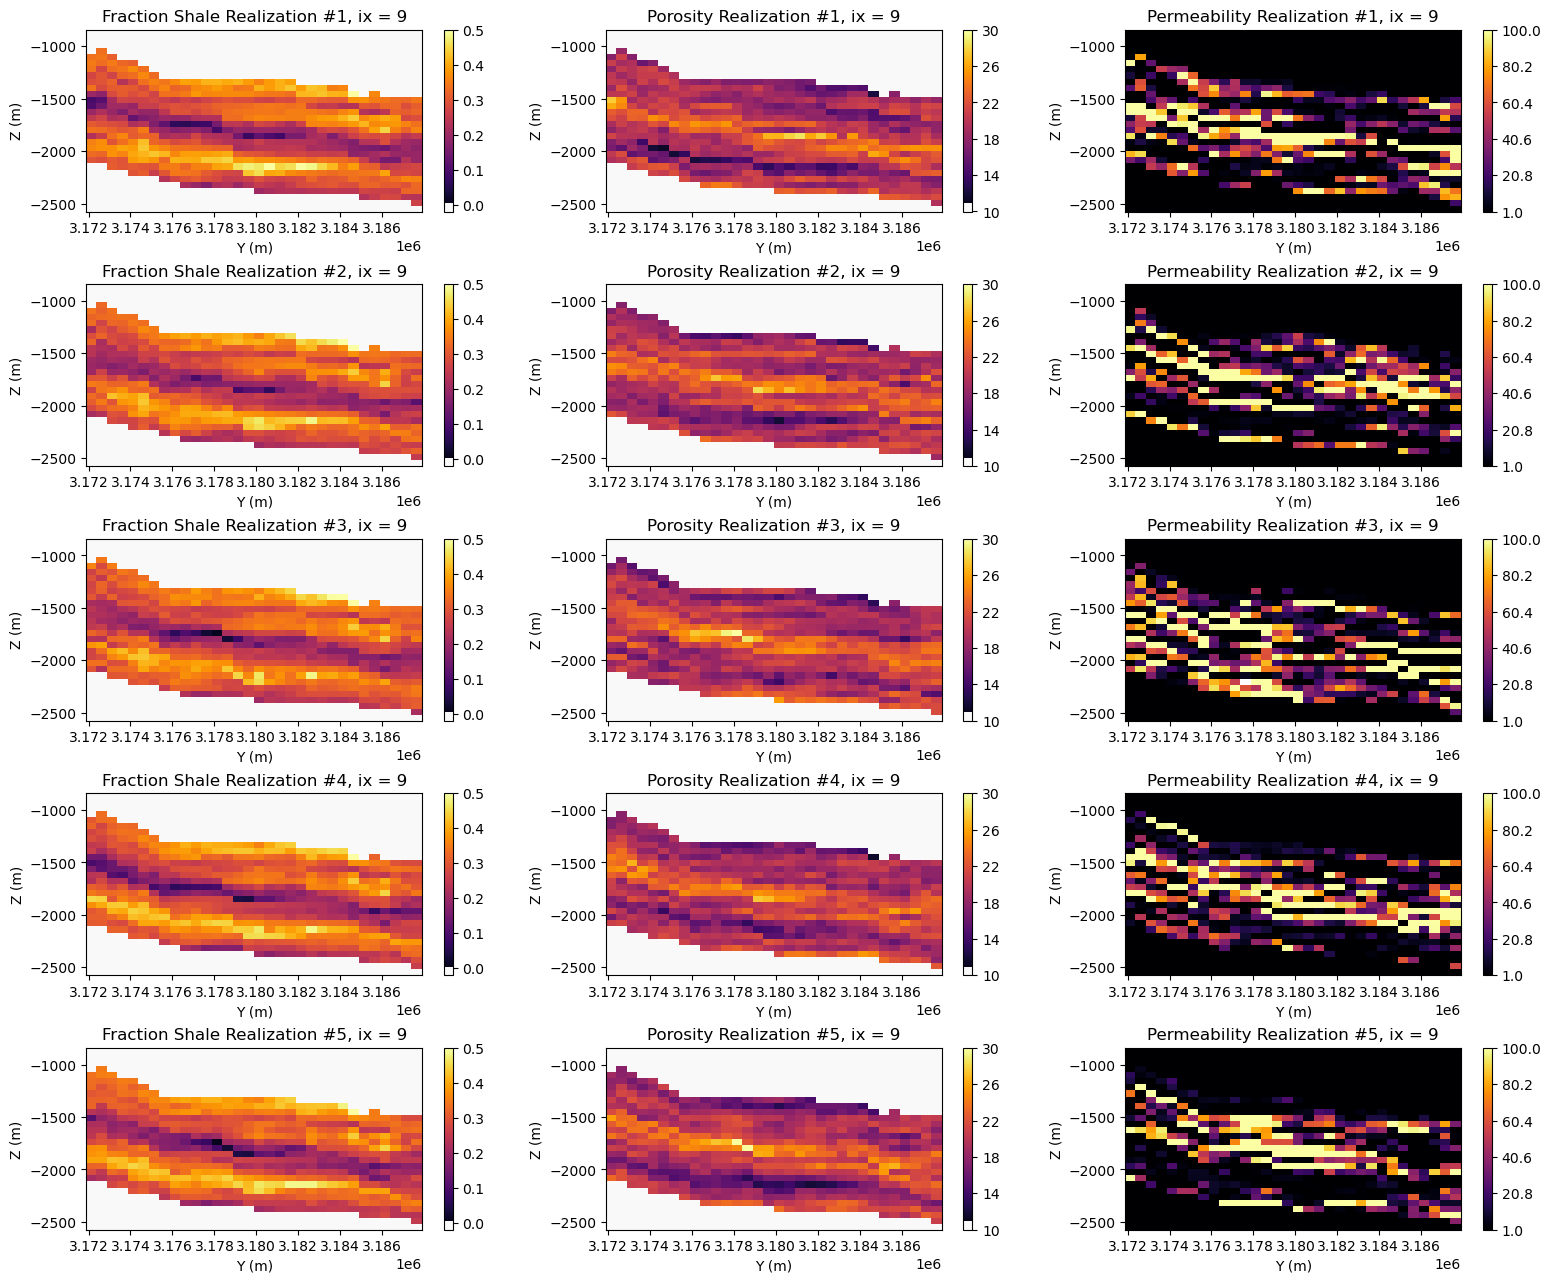

In [56]:
for l in range(0,L):                
    plt.subplot(L,3,l*3 + 1)
    im = plt.imshow(Vsh_strat_grid[l,:,::-1,9],interpolation = None,extent = [ymin,ymax,szmin,szmax], vmin = Vshmin-0.02, vmax = Vshmax,
                 cmap = sign1,aspect=5)
    plt.title('Fraction Shale Realization #' + str(l+1) + ', ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Vshmin,Vshmax,6))
    
    plt.subplot(L,3,l*3 + 2)
    im = plt.imshow(Por_strat_grid[l,:,::-1,9],interpolation = None,extent = [ymin,ymax,szmin,szmax], vmin = Pormin-0.01, vmax = Pormax,
                 cmap = sign1,aspect=5)
    plt.title('Porosity Realization #' + str(l+1) + ', ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Pormin,Pormax,6))
    
    plt.subplot(L,3,l*3 + 3)
    im = plt.imshow(Perm_strat_grid[l,:,::-1,9],interpolation = None,extent = [ymin,ymax,szmin,szmax], vmin = Permmin, vmax = Permmax,
                 cmap = cmap,aspect=5)
    plt.title('Permeability Realization #' + str(l+1) + ', ix = 9'); plt.xlabel('Y (m)');plt.ylabel('Z (m)')
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(Permmin,Permmax,6))
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.3, top=0.5*L, wspace=0.2, hspace=0.4); plt.show()   

#### Example of 3D Visualization of the Model

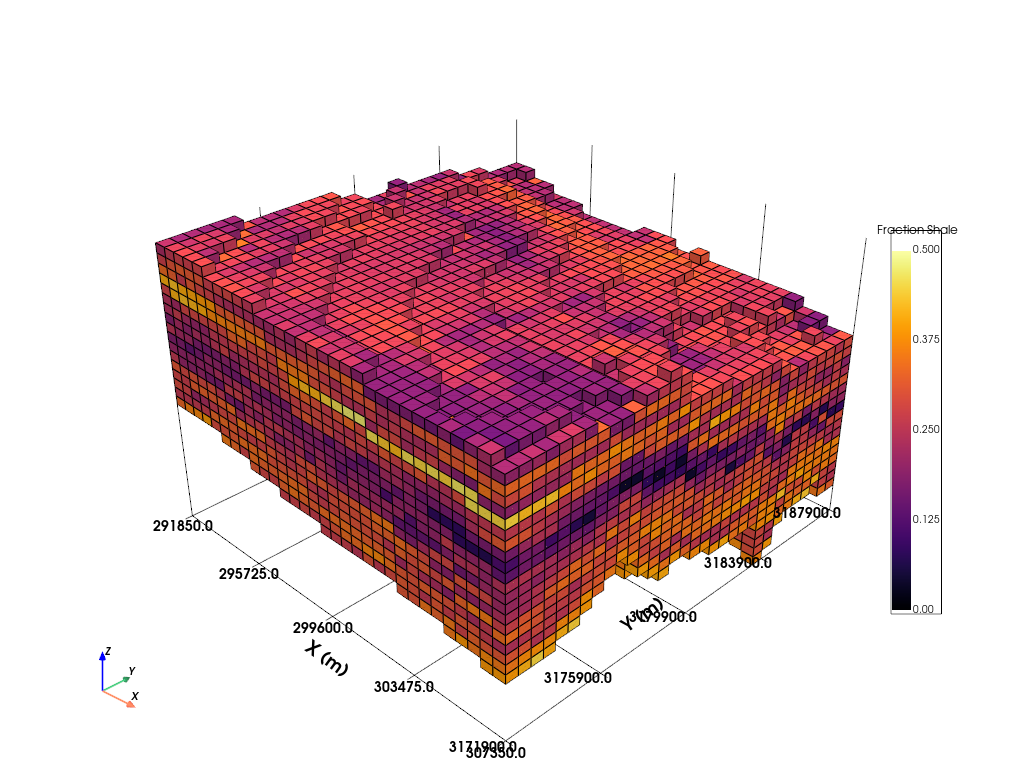

In [57]:
from pyvista import Axes
pv.global_theme.colorbar_horizontal.position_x = -2.0
pv.global_theme.colorbar_horizontal.height = 0.03
pv.global_theme.lighting_params.ambient = 0.4

is_xyz_seq = True; aspect_x_to_z = 1.0; value = 'Vsh'; threshold = 0.001; clim = (0.0,0.5); show_edges = True

if is_xyz_seq is True:
    array = Vsh_strat_grid[l].T
else:
    array = Vsh_strat_grid[l]
# GSLIB -> PyVista (i.e., invert z-dir). 
# E.g., GSLIB z-dir increases downwards whereas pyvista in the other way around
array = Vsh_strat_grid[l]

plotter = pv.Plotter()
grid = pv.ImageData()
nz, ny, nx = array.shape
grid.dimensions = np.array([nx, ny, nsz]) + 1

grid.origin = (xmin, ymin, szmin)  # The bottom left corner of the data set
grid.spacing = (xsiz, ysiz, szsiz)  # These are the cell sizes along each axis

grid.cell_data[value] =array.flatten() # Flatten the array

if threshold is not None:
    grid = grid.threshold(threshold)
if clim is not None:
    plotter.add_mesh(grid, show_edges=show_edges, cmap= cmap, clim = clim)
else:
    plotter.add_mesh(grid, show_edges=show_edges, cmap= cmap)

#plotter.camera_position = [(-74, 32, 51), (0, 0, 88), (0, 1, 0)]
 
plotter.camera_position = "xz"
plotter.camera.azimuth = 45
plotter.camera.elevation = 30
plotter.camera.zoom(1.0)
plotter.set_scale(zscale=6.0)
labels = dict(zlabel='Z', xlabel='X', ylabel='Y')
#plotter.view_xy()

plotter.show_bounds()
#plotter.set_bounds([zmin,zmax,ymin,ymax,xmin,xmax])
plotter.show_grid(color='black',xtitle='X (m)',ytitle='Y (m)',ztitle='Z (m)',font_size=8,location='outer',ticks='outside')
plotter.add_axes(**labels)

scalar_bar  = plotter.add_scalar_bar(title="Fraction Shale", vertical=True, title_font_size=12, label_font_size=10, height=0.5, width=0.05, n_labels=5,
                      position_x=0.87,position_y = 0.2)

scalar_bar.SetVerticalTitleSeparation(10)  # Increase this value to move the title up

scalar_bar.SetDrawFrame(True)  # Enable drawing the frame
scalar_bar.GetFrameProperty().SetColor(0, 0, 0)  # Black color for the outline
scalar_bar.GetFrameProperty().SetLineWidth(1.0)  # Set the line width of the outline

plotter.show()

#grid.plot(show_edges=True, show_grid=True)

#### Next Steps

* add in and test real well data and seismic data